# Tutorial 4: Hodgkin and Huxley Model for TC and TRN

In [1]:
%reset -f
import matplotlib.pyplot as plt    # import matplotlib
import numpy as np                 # import numpy
import scipy as sp                 # import scipy
import math                        # import basic math functions
import random                      # import basic random number generator functions
import seaborn as sns
# np.seterr(over='ignore')

# Introduction

The thalamo reticular nucleus neurons-thalamocortical neurons (TRN-TC) circuit is known to contirbute to the origin of spindle like bursts generated in the brain during sleep (and few other pathalogical conditions like absence epilepsy). As highlighted in the previous tutorials, neurons fire using "all or none" phenomenon and there is a refractory period after each action potential during which the neuron cannot fire again. Considering this, the mechanism of spindle like burst generation is particularly interesting at the cellular level. 

Depending on their location and morphology, neurons tend to have different patterns to fire, which can be attributed to the difference in properties of different ion channels as well. However, the mechanisms with which the TRN-TC cells produce is particularly interesting as it produces this rare oscillatory pattern of firing. This can be explained using the reciprocal connections betwene TRN and TC which in turn are connected to the cortex. The TRN cells are inhibitory or GABAergic and the TC cells are excitatory. Both TC and TRN cells express set of Ca2+ channels: T- type calcium channels that trigger low threshold spiking when subjected to depolarised stimulus i.e., these channels get activated in a hyperpolarising range ( have a lower threshold than other voltage gated ion channels) and this leads to hyperpolarisation dependent bursting. Besides this there are other supplementary channels/ receptors in TRN and TC that help keep this strengthen this reciprocal connections: GABA receptors with different properties in each of these cells are one such examples.

In this notebook, we would like explore the the bursting in both TRN and TC and explore the kinetics of the channels and how they affect the bursting pattern using modelling.    

Equation used for TRN:


$$\frac{dV_{TRN}}{dt} = \frac{I}{C_m} -\frac{g_Kn^4(V_m-V_k)}{C_m}-\frac{g_{Na}m^3h(V_m-V_{Na})}{C_m}-\frac{gl(V_m-V_l)}{C_m}-\frac{g_{Ca}m^2h(V_m-V_T)}{C_m} $$



Equation used for TC:

$$\frac{dV_{TC}}{dt} = \frac{I}{C_m} -\frac{g_Kn^4(V_m-V_k)}{C_m}-\frac{g_{Na}m^3h(V_m-V_{Na})}{C_m}-\frac{gl(V_m-V_l)}{C_m} - \frac{g_{Ca}m^2h(V_m-V_T)}{C_m} - \frac{g_HS_HF_H(V_m-V_H)}{C_m} $$




Na and T type calcium channel in both TRN and TC have two gates: m and h and are given by rate equations as given in the functions in exercise 2. In this tutorial, we explore the interplay between different intrinsic currents of TRN and TC, specifically the T type current in both the cell types in addition to H type current in TC.




**EXERCISE 1**

Initialize the main simulation variables for TRN.


In [2]:
def duration_of_sim (t_start, t_end, dt):
   '''
   input parameters: 
      other parameters: time step for simulation , dt : 0.001 (change the dt value as per choice)
      C_m: capacitance per unit area, important to divie the current by capacitance per unit area to get the

   '''
   T = np.arange(t_start, t_end+dt, dt)
   return T
# capacitance per unit area of neuron (microF/cm^2)
C_m=1 

# # choose an arbitary t range such as one can model multiple AP (in milliseconds)
# t_min=0
# t_max=1000 # ms (changed from 500 to 1000 for more bursts)
# dt = 0.001 # value 0.01 leads to overflow
# T=np.arange(t_min,t_max+dt,dt)


In [3]:
def generatespikes(V_pre,V_th,T,dt):

    spike=[]
    print(np.dtype(spike))
    # spike_train=[]
    spike_train=np.zeros(len(T))
    i=0
    count=0
    while i < len(T):
        if V_pre[i]>=V_th:
            
    #         print(V_TC[i+1], i+1)
            spike= np.append(spike,(i)*dt)
            spike_train[i]=1
            i=i+200
            count+=1
            # print(i)
            # if k==len(T):
            #     StopIteration
        i+=1
        
    return spike_train, spike

**EXERCISE 2**

Define rate functions for each ion channel : refer Austin Soplata 2017, Destexhe et al, 1993; Traub and Miles 1991


In [4]:
#TRN cells Note: TRN and TC cells have the same Na and K channel kinetics according to Austin Soplata 2017 /................

#channel opening rate is given by alpha and closing rate by beta values for all ion channels and is dependent on the membrane potential value 
# at each time point (V[i])

def alpha_n_TRN(V):
    '''
    input variables 
    V: membrane potential at every time point t
    
    output variables:
    alpha_n: the opening rate of the potassium gate as a function of membrane potential (V) at each time point t
    '''
    result = 0.032*(15-V)/(np.exp((15-V)/5)-1)
    return result

def beta_n_TRN(V):
    '''
    input variables 
    
    V: membrane potential at every time point t
    
    output variables:
    beta_n: the closing rate of the potassium gate as a function of membrane potential (V) at each time point t
    '''
    result= 0.5*np.exp((10-V)/40)
    return result

# Na+ rate functions for activation gate
def alpha_m_TRN(V):
    '''
    input variables 
    V: membrane potential at every time point t
    
    output variables:
    alpha_m: the opening rate of the sodium activation gate as a function of membrane potential (V) at each time point t
    '''
    result = 0.32*(13-V)/(np.exp((13-V)/4)-1)
    return result

def beta_m_TRN(V):
    '''
    input variables 
    V: membrane potential at every time point t
    
    output variables:
    beta_m: the closing rate of the sodium activation gate as a function of membrane potential (V) at each time point t
    '''
    result = 0.28*(V-40)/(np.exp((V-40)/5)-1)
    return  result

# Na+ rate functions for inactivation gate
def alpha_h_TRN(V):
    '''
    input variables 
    V: membrane potential at every time point t
    
    output variables:
    alpha_h: the opening rate of the sodium inactivation gate as a function of membrane potential (V) at each time point t
    '''
    result= 0.128*np.exp((17-V)/18)
    return result

def beta_h_TRN(V):
    '''
    input variables 
    V: membrane potential at every time point t
    
    output variables:
    beta_h: the closing rate of the sodium inactivation gate as a function of membrane potential (V) at each time point t
    '''
    result= 4/(1+np.exp((40-V)/5))
    return result
    



In [5]:
# infinity forms for K and Na channels in both TRN and TC

def n_inf(V):
    result= alpha_n_TRN(V)/(alpha_n_TRN(V)+beta_n_TRN(V))
    return result

def tau_n(V):
    result = 1/(alpha_n_TRN(V)+beta_n_TRN(V))
    return result

def m_inf(V):
    result=alpha_m_TRN(V)/(alpha_m_TRN(V)+beta_m_TRN(V))
    return result

def tau_m(V):
    result = 1/(alpha_m_TRN(V)+beta_m_TRN(V))
    return result

def h_inf(V):
    result=alpha_h_TRN(V)/(alpha_h_TRN(V)+beta_h_TRN(V))
    return result

def tau_h(V):
    result = 1/(alpha_h_TRN(V)+beta_h_TRN(V))
    return result

In [6]:

# T type calcium channels in TRN

#channel ACTIVATION is given by m with the decay constant tau and INACTIVATION by h 
# the activation and inactivation depend on membrane potential  ---> all adapted from Destexhe1994 and Soplata17

# ALTER THE half life value of V for different simulations : V+52 or V+80
def m_Ca_inf(V):
    result = 1/(1+np.exp(-(V+52)/7.4))
    return float(result)

def tau_m_Ca(V):
    result= 0.44 + 0.15/(np.exp((V+27)/10) +np.exp(-(V+102)/15))
    return result
    
def h_Ca_inf(V):
    result= 1/(1+np.exp((V+80)/5))
    return result

def tau_h_Ca(V):
    result= 22.7 + 0.27/(np.exp((V+48)/4) + np.exp(-(V+407)/50))
    return float( result)




# for the calcium dependent channels, the ACTIVATION and INACTIVATION is dependent on the 
# calcium concentration which is in turn dependent on I_T current

def m_CAN_inf(Ca_conc,n):
    '''input- Ca_conc- intracellular calcium concentration
                n - the value of power raised to the calcium concentration 
                as done in DEstexhe 1994
        out put- m_can_inf'''
    result=20*(np.power(Ca_conc,n))/(20*(np.power(Ca_conc,n))+0.002)
    return result

def tau_m_CAN(Ca_conc,n):
    result= 1/(20*(np.power(Ca_conc,n))+0.002)
    return result

def m_K_Ca_inf(Ca_conc,n):
    result=48*(np.power(Ca_conc,n))/(48*(np.power(Ca_conc,n))+0.03)
    return result

def tau_m_K_Ca(Ca_conc,n):
    result=1/(48*(np.power(Ca_conc,n))+0.03)
    return result


In [7]:
# T type calcium channels in TC

#channel ACTIVATION is given by m with the decay constant tau and INACTIVATION by h 
# the activation and inactivation depend on either membrane potential 

def m_Ca_TC_inf(V):
    result = 1/(1+np.exp(-(V+57)/6.2))
    return float(result)
    
def h_Ca_TC_inf(V):
    result= 1/(1+np.exp((V+81)/4))
    return result

def tau_Ca_TC_h(V):
    result= (30.8 +  (211.4+np.exp((V+113.2)/5))/(1+np.exp((V+84)/3.2)))/3.73
    return float( result)

# Hyperpolarization activated current --> Destexhe et al, 1993

def H_TC_inf(V):
    result = 1/(1+np.exp((V+69.8)/6.5))
    return result

def tau_H_S(V):
    result = np.exp((V+183.6)/15.24)   # 15 changed to 30 (deno)
    return result


def tau_H_F(V):
    result = np.exp((V+158.6)/11.2)/(1+np.exp((V+75)/5.5))
    return result
    



**EXERCISE 3**

Define outward current contibuted by each ion

In [8]:

'''
   other parameters: time step for simulation , dt : 0.001 (change the dt value as per choice)
   C_m: capacitance per unit area, important to divie the current by capacitance per unit area to get the

'''
# capacitance per unit area of neuron (microF/cm^2)
C_m=1 

# choose an arbitary t range such as one can model multiple AP (in milliseconds)
t_min=0
t_max=500 # ms
dt = 0.001 # value 0.01 leads to overflow
T=np.arange(t_min,t_max+dt,dt)

volt_init=[0 ,-50, -60 ,-70] # alter the initial condition of membrane voltage and observe changes in burst geneartion


# alter input current range: differet range of current input in TRN and TC due to difference in their intrinsic properties
currentlevels= [-1,-2,-4 ,-6, -8, -10, -15] # for TRN
# currentlevels= [-1,-5,-9 ] # for TC

I=np.zeros([len(currentlevels),len(T)])


### generate thalamocortical bursts 

#### a) for one current value, pulse triggered for a particular duration 
Note: you can alter the function input values to change the current duration 

In [18]:
def generateburstsTC(I,T,C_m, dt):
    

        '''
           TC cells: g: represenets the conductance value of each ion channel in TC 
           V_Na_TC: reversal potential of Na ion channels in TC 
           V_K_TC: reversal potential of K ion channels in TC 
           V_T_TC: reversal potential of T type calcium channels in TC 
           V_L_TC: reversal potential of leaky channels in TC 
           V_H: reversal poetential for H type current or hyperpolarising current channel
        '''

        g_Na_TC=90
        g_K_TC=10
        g_T_TC=2
        g_H=0.015 # DEPENDS???
        g_L_TC=0.01 # 0.01 leads to overflow (NOT TRUE ANYMORE)
        # g_KL_TC= 0.0172  # from DEstexhe 1996,[ 0.006 when 2nS is maximal conductance to 0.03 when 8nS is maximal conductance; 5nS --> 0.0172]
        g_KL_TC= 0


        V_Na_TC=50
        V_K_TC=-100
        V_H=-43 #mV
        V_L_TC=-70 #(changed from -70 mV)
        V_T_TC = 120 # used this instead of using the dynamic equation in Austin Sopalata 2017
        V_KL_TC= -100

        # membrane potential at each time point
        V_TC=np.zeros(len(T))
        V_TC[0]=-60 #change between 0 to -60 or -65 to Vleak value i.e, -70 
        

        # current contributed by ion channels in each time point 
        I_K_TC=np.zeros(len(T)) # Potassium
        I_Na_TC=np.zeros(len(T)) # Sodium
        I_L_TC=np.zeros(len(T)) # k Leaky channels
        I_KL_TC= np.zeros(len(T)) # k Leaky channels
        I_H_TC=np.zeros(len(T))
        I_T_TC=np.zeros(len(T))
        I_GABAb= np.zeros(len(T))

        # open probabilities of each channel gates at each time point
        n_TC=np.zeros(len(T))
        m_TC=np.zeros(len(T))
        h_TC=np.zeros(len(T))
        S_H_TC=np.zeros(len(T))
        F_H_TC=np.zeros(len(T))
        
        tau_TC=np.zeros(len(T))      
        
         # state variables for synaptic current from TRN to TC
        g_GABAb= 0.001 #mS/cm^2
        V_GABAb= -95 #mV

        g=np.zeros(len(T))
        r=np.zeros(len(T))

        g[0]=0
        r[0]=0

       
        #state varaible equation (r,g)
        k1= 0.5 #(mM^-1 ms^-1)
        k2=0.0012 #(ms^-1)
        k3=0.18 #(ms^-1)
        k4= 0.034 #(ms^-1)
        
      

        #initial rate values for K and Na rate equations
        n_TC[0]=alpha_n_TRN(V_TC[0])/(alpha_n_TRN(V_TC[0])+beta_n_TRN(V_TC[0]))
        m_TC[0]=alpha_m_TRN(V_TC[0])/(alpha_m_TRN(V_TC[0])+beta_m_TRN(V_TC[0]))
        h_TC[0]=alpha_h_TRN(V_TC[0])/(alpha_h_TRN(V_TC[0])+beta_h_TRN(V_TC[0]))
        alpha_S_TC_0= H_TC_inf(V_TC[0])/tau_H_S(V_TC[0])
        beta_S_TC_0= (1-H_TC_inf(V_TC[0]))/tau_H_S(V_TC[0])
        S_H_TC[0]= alpha_S_TC_0/(alpha_S_TC_0 + beta_S_TC_0)

        alpha_F_TC_0= H_TC_inf(V_TC[0])/tau_H_F(V_TC[0])
        beta_F_TC_0= (1-H_TC_inf(V_TC[0]))/tau_H_F(V_TC[0])
        F_H_TC[0]= alpha_F_TC_0/(alpha_F_TC_0 + beta_F_TC_0)
        

        #initial rate values for 
        m_Ca_TC=np.zeros(len(T))
        h_Ca_TC=np.zeros(len(T))

        m_Ca_TC[0]=m_Ca_TC_inf(0)
        h_Ca_TC[0]=h_Ca_TC_inf(0)
        
    
        for i in range(len(T)-1):

            I_K_TC[i]= g_K_TC*np.power(n_TC[i],4)*(V_TC[i]-V_K_TC)/C_m

            I_Na_TC[i]=g_Na_TC*np.power(m_TC[i],3)*h_TC[i]*(V_TC[i]-V_Na_TC)/C_m

            I_L_TC[i]=g_L_TC*(V_TC[i]-V_L_TC)/C_m

            I_KL_TC[i]=g_KL_TC*(V_TC[i]-V_KL_TC)/C_m

            I_T_TC[i]=g_T_TC*np.power(m_Ca_TC[i],2)*h_Ca_TC[i]*(V_TC[i]-V_T_TC)/C_m

            I_H_TC[i]=g_H*S_H_TC[i]*F_H_TC[i]*(V_TC[i]-V_H)/C_m
            
            # I_GABAb[i]= g_GABAb*(np.power(g[i],4))*(V_TC[i]-V_GABAb)/(np.power(g[i],4)+100)

            # V_TC[i+1]=(I[i]/C_m-I_K_TC[i]-I_Na_TC[i]-I_L_TC[i]-I_T_TC[i]-I_H_TC[i]-I_GABAb[i])*dt+V_TC[i]

            V_TC[i+1]=(I[i]/C_m-I_K_TC[i]-I_L_TC[i]-I_T_TC[i]-I_Na_TC[i]-I_H_TC[i]-I_KL_TC[i])*dt+V_TC[i]              
               
            # r[i+1]= (k1*2*(1+math.tanh(V_TRN[i]/4))*(1-r[i])-k2*r[i])*dt + r[i]  # check how to represent these equations with Jorge
        
            # g[i+1]= (k3*r[i] - k4*g[i])*dt +g[i]
        
            
            tau_TC[i]= tau_n(V_TC[i])+tau_m(V_TC[i])+tau_h(V_TC[i])+tau_Ca_TC_h(V_TC[i])
     
            n_TC[i+1]=-(n_TC[i]-n_inf(V_TC[i]))*dt/tau_n(V_TC[i]) +n_TC[i]

            m_TC[i+1]=-(m_TC[i]-m_inf(V_TC[i]))*dt/tau_m(V_TC[i]) +m_TC[i]

            h_TC[i+1]=-(h_TC[i]-h_inf(V_TC[i]))*dt/tau_h(V_TC[i]) +h_TC[i]

            m_Ca_TC[i+1]= m_Ca_TC_inf(V_TC[i+1])

            h_Ca_TC[i+1]=-(h_Ca_TC[i]-h_Ca_TC_inf(V_TC[i]))*dt/tau_Ca_TC_h(V_TC[i]) +h_Ca_TC[i]

            S_H_TC[i+1]= -(S_H_TC[i]-H_TC_inf(V_TC[i]))*dt/tau_H_S(V_TC[i]) + S_H_TC[i]

            F_H_TC[i+1]= -(F_H_TC[i]-H_TC_inf(V_TC[i]))*dt/tau_H_F(V_TC[i]) + F_H_TC[i]
            
        allvariables_TC = {'Injected current (nA)': I, 'n_K':n_TC, 'I_K': I_K_TC, 'h_Na':h_TC, 'm_Na':m_TC, 'I_Na': I_K_TC,  'I_T (nA)':I_T_TC, 'm_Ca_TC': m_Ca_TC, 'h_Ca_TC':h_Ca_TC,'I_h (nA)':I_H_TC, 'slow state variable': S_H_TC, 'fast state variable':F_H_TC, 'Membrane potential (mV)':V_TC, 'I_GABAb': I_GABAb}
        
         # synaptic current intial values
        g_K_TCnet= g_K_TC*np.power(n_TC[-1],4)
        g_Na_TCnet= g_Na_TC*np.power(m_TC[-1],3)*h_TC[-1]
        g_T_TCnet= g_T_TC*np.power(m_Ca_TC[-1],2)*h_Ca_TC[-1]
        g_h_TCnet= g_H*S_H_TC[-1]*F_H_TC[-1]


        sum_gVion= g_K_TCnet*V_K_TC + g_T_TCnet*V_T_TC + g_h_TCnet*(V_H) + g_Na_TCnet*V_Na_TC + g_L_TC*V_L_TC + g_KL_TC*V_KL_TC
    
        

        sum_gion=  g_K_TCnet + g_Na_TCnet + g_T_TCnet + g_h_TCnet + g_L_TC + g_KL_TC

             
        VTC_ss= sum_gVion/ sum_gion

        print({'V_TCss' : VTC_ss, 'g_K_TCnetV': g_K_TCnet*V_K_TC, 'g_Na_TCnetV': g_Na_TCnet*V_Na_TC, 'g_L_TCV': g_L_TC*V_L_TC,'g_h_TCV': g_h_TCnet*(V_H), 'g_T_TCV': g_T_TCnet*V_T_TC})
        print({'g_K_TCnet': g_K_TCnet, ' g_Na_TCnet':  g_Na_TCnet,' g_T_TCnet':  g_T_TCnet, 'g_h_TCnet': g_h_TCnet, ' g_L_TC ':  g_L_TC })
        print(V_TC[-1])

        return allvariables_TC



#### b) for thalamocortical burst generation for different input current pulse values and different initial condition of membrane potential : currentlevels and volt_init

In [9]:
def generateburstsTC2(I,T,C_m, currentlevels, volt_init):
    

        '''
           TC cells: g: represenets the conductance value of each ion channel in TC 
           V_Na_TC: reversal potential of Na ion channels in TC 
           V_K_TC: reversal potential of K ion channels in TC 
           V_T_TC: reversal potential of T type calcium channels in TC 
           V_L_TC: reversal potential of leaky channels in TC 
           V_H: reversal poetential for H type current or hyperpolarising current channel
        '''

        g_Na_TC=90
        g_K_TC=10
        g_T_TC=2
        g_H=0.025 # DEPENDS???
        g_L_TC=0.005 # 0.01 leads to overflow


        V_Na_TC=50
        V_K_TC=-100
        V_H=-43 #mV
        V_L_TC=-70
        V_T_TC = 120 # used this instead of using the dynamic equation in Austin Sopalata 2017

        # membrane potential at each time point
        V_TC=np.zeros([len(currentlevels),len(T)])
        V_TC[:,0]=volt_init[0] # change the volt_init value here from 0 to -50 or -70 mV

        # current contributed by ion channels in each time point 
        I_K_TC=np.zeros([len(currentlevels),len(T)]) # Potassium
        I_Na_TC=np.zeros([len(currentlevels),len(T)]) # Sodium
        I_L_TC=np.zeros([len(currentlevels),len(T)])  # Leaky channels
        I_H_TC=np.zeros([len(currentlevels),len(T)])
        I_T_TC=np.zeros([len(currentlevels),len(T)])

        # open probabilities of each channel gates at each time point
        n_TC=np.zeros([len(currentlevels),len(T)])
        m_TC=np.zeros([len(currentlevels),len(T)])
        h_TC=np.zeros([len(currentlevels),len(T)])
        S_H_TC=np.zeros([len(currentlevels),len(T)])
        F_H_TC=np.zeros([len(currentlevels),len(T)])

        #initial rate values for K and Na rate equations
        n_TC[:,0]=alpha_n_TRN(V_TC[:,0])/(alpha_n_TRN(V_TC[:,0])+beta_n_TRN(V_TC[:,0]))
        m_TC[:,0]=alpha_m_TRN(V_TC[:,0])/(alpha_m_TRN(V_TC[:,0])+beta_m_TRN(V_TC[:,0]))
        h_TC[:,0]=alpha_h_TRN(V_TC[:,0])/(alpha_h_TRN(V_TC[:,0])+beta_h_TRN(V_TC[:,0]))
        alpha_S_TC_0= H_TC_inf(V_TC[:,0])/tau_H_S(V_TC[:,0])
        beta_S_TC_0= (1-H_TC_inf(V_TC[:,0]))/tau_H_S(V_TC[:,0])
        S_H_TC[:,0]= alpha_S_TC_0/(alpha_S_TC_0 + beta_S_TC_0)

        alpha_F_TC_0= H_TC_inf(V_TC[:,0])/tau_H_F(V_TC[:,0])
        beta_F_TC_0= (1-H_TC_inf(V_TC[:,0]))/tau_H_F(V_TC[:,0])
        F_H_TC[:,0]= alpha_F_TC_0/(alpha_F_TC_0 + beta_F_TC_0)
        

        #initial rate values for 
        m_Ca_TC=np.zeros([len(currentlevels),len(T)])
        h_Ca_TC=np.zeros([len(currentlevels),len(T)])

        m_Ca_TC[:,0]=m_Ca_TC_inf(0)
        h_Ca_TC[:,0]=h_Ca_TC_inf(0)
        
       
        
        for j in range (len(currentlevels)):

            for i in range(len(T)-1):

                I_K_TC[j,i]= g_K_TC*np.power(n_TC[j,i],4)*(V_TC[j,i]-V_K_TC)/C_m

                I_Na_TC[j,i]=g_Na_TC*np.power(m_TC[j,i],3)*h_TC[j,i]*(V_TC[j,i]-V_Na_TC)/C_m

                I_L_TC[j,i]=g_L_TC*(V_TC[j,i]-V_L_TC)/C_m

                I_T_TC[j,i]=g_T_TC*np.power(m_Ca_TC[j,i],2)*h_Ca_TC[j,i]*(V_TC[j,i]-V_T_TC)/C_m

                I_H_TC[j,i]=g_H*S_H_TC[j,i]*F_H_TC[j,i]*(V_TC[j,i]-V_H)
                
                I[j,110000:120000]=currentlevels[j]


                V_TC[j,i+1]=(I[j,i]/C_m-I_K_TC[j,i]-I_Na_TC[j,i]-I_L_TC[j,i]-I_T_TC[j,i]-I_H_TC[j,i])*dt+V_TC[j,i]

                n_TC[j,i+1]=-(n_TC[j,i]-n_inf(V_TC[j,i]))*dt/tau_n(V_TC[j,i]) +n_TC[j,i]

                m_TC[j,i+1]=-(m_TC[j,i]-m_inf(V_TC[j,i]))*dt/tau_m(V_TC[j,i]) +m_TC[j,i]

                h_TC[j,i+1]=-(h_TC[j,i]-h_inf(V_TC[j,i]))*dt/tau_h(V_TC[j,i]) +h_TC[j,i]

                m_Ca_TC[j,i+1]= m_Ca_TC_inf(V_TC[j,i+1])

                h_Ca_TC[j,i+1]=-(h_Ca_TC[j,i]-h_Ca_TC_inf(V_TC[j,i]))*dt/tau_Ca_TC_h(V_TC[j,i]) +h_Ca_TC[j,i]

                S_H_TC[j,i+1]= -(S_H_TC[j,i]-H_TC_inf(V_TC[j,i]))*dt/tau_H_S(V_TC[j,i]) + S_H_TC[j,i]

                F_H_TC[j,i+1]= -(F_H_TC[j,i]-H_TC_inf(V_TC[j,i]))*dt/tau_H_F(V_TC[j,i]) + F_H_TC[j,i]

        allvariables_TC = {'I': I, 'n_TC':n_TC, 'h_TC':h_TC, 'm_TC':m_TC, 'I_T_TC':I_T_TC, 'm_Ca_TC': m_Ca_TC, 'h_Ca_TC':h_Ca_TC, 'V_TC':V_TC}
        
        return allvariables_TC



In [19]:


# I_TCinput[100000:120000]=-3.5
# I_TCinput[300000:320000]=-3.5
# I_TCinput[700000:720000]=-3.5
T=  duration_of_sim (0, 1000, dt=0.01)
I_TCinput= 0*np.ones(len(T))
I_TCinput[10000:12000]=-2
allvariables_TC_60_l= generateburstsTC(I_TCinput,T,C_m=1, dt=0.01)

# note down the steady state

# allvariables_TC2=generateburstsTC2(I,T,C_m, currentlevels, volt_init)

{'V_TCss': -54.03713027499239, 'g_K_TCnetV': -6.508419966982284e-22, 'g_Na_TCnetV': 3.551315067165285e-19, 'g_L_TCV': -0.7000000000000001, 'g_h_TCV': -0.011898986237651404, 'g_T_TCV': 0.1079593732061889}
{'g_K_TCnet': 6.508419966982285e-24, ' g_Na_TCnet': 7.10263013433057e-21, ' g_T_TCnet': 0.0008996614433849075, 'g_h_TCnet': 0.00027672061017793964, ' g_L_TC ': 0.01}
-54.03855240289403


In [27]:
V_TC= allvariables_TC_60_l['Membrane potential (mV)']
print(V_TC[-1])

-36.31598370616195


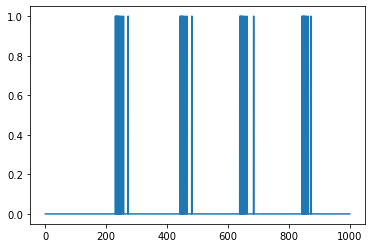

In [12]:
V_TC= allvariables_TC['Membrane potential (mV)']
# print(V_TC[523000])
def generatespikes(V_pre,V_th,duration,timestep):

    spike=np.zeros(len(T))
    spike_train=np.zeros(len(T))

    for i in range(len(T)-1):
        if V_TC[i+1]>=V_th:
    #         print(V_TC[i+1], i+1)
            spike[i+1]=(i+1)*dt
            spike_train[i+1]=1
    
    return spike_train, spike

# print(spike[10])  
spike_train, spike_time= generatespikes(V_pre=V_TC, V_th=25, duration =T, timestep=dt)
plt.plot(T, spike_train)
plt.show()

In [13]:
random.seed(0)
# t_max = 1000   # msecond
# dt = 0.001      
# e_ex = 0         # volt
# tau_syn = 2    # msecond 
# gbar_maxAMPA = 0.08
# gbar_max=0.00015 #0.008, 0.004, 0.002, 0.001, 0.0004

def pre_spiketrain_excitatory_coductance (T, timestep, pre_spike_train,tau_syn, ar, g_AMPA):
    """ Simulate nonplastic postsynaptic neuron
  
    Arguments:
    T --  Duration
    pre_spike_train -- presynaptic spike train matrix, same length as T
    tau_syn -- decay constant of the synaptic conductance
  
    Returns:
    g_ex -- excitatory conductance
    """
    # insert your code here
    g_ex=np.zeros(len(T))
   
    g_ex[0]=0

    gbar_max= g_AMPA/ar # 533 is an arbitary number ar
    
    for i in range(len(T)-1):
        if pre_spike_train[i+1]==1:
            
            g_ex[i+1]=g_ex[i]+gbar_max
                
        else:     
            g_ex[i+1]=-g_ex[i]*timestep/tau_syn+g_ex[i]
#         g_ex_sum[i]=np.sum(g_ex[j,i],axis=0)
                
#             print(v[i],g_ex[j,i],pre_spike_train[j,i])
    return g_ex
  

In [14]:
g_ex_AMPA = pre_spiketrain_excitatory_coductance (T, dt, spike_train, 2, 533.33,0.08)

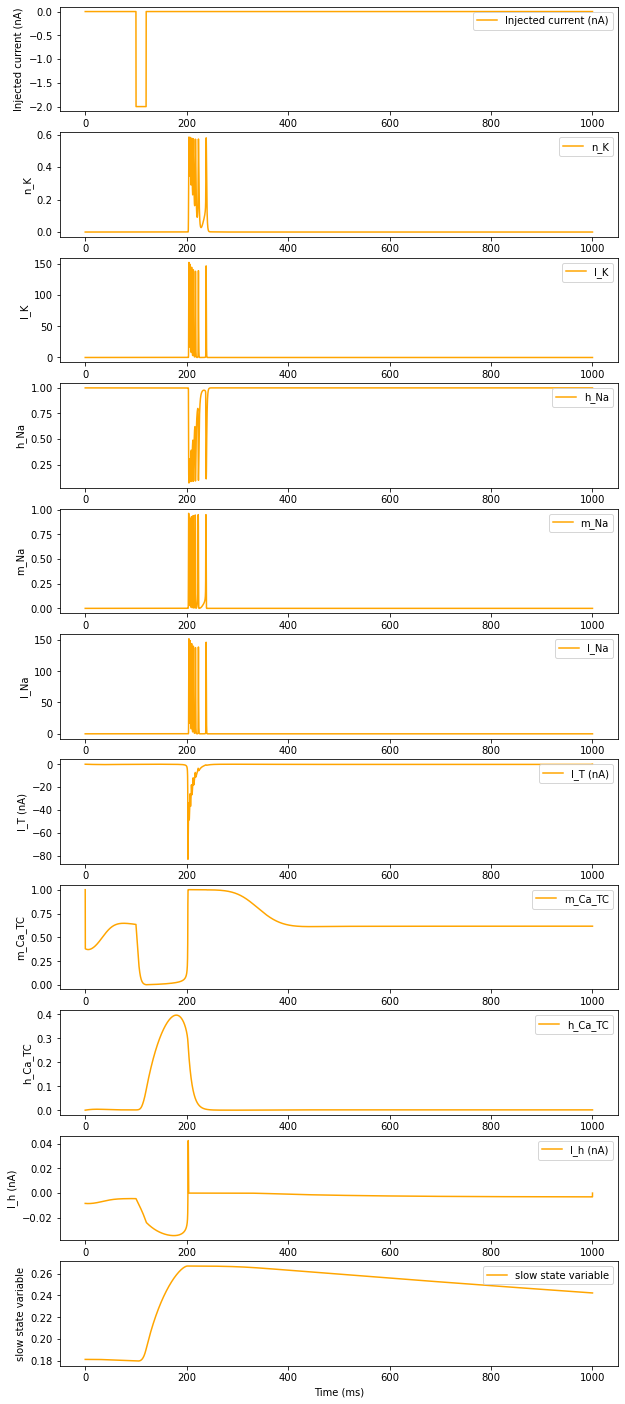

In [20]:
fig, ax = plt.subplots(11,1,figsize = (10,25))
# allvariables = {'I': I, 'n':n_TRN, 'h':h_TRN, 'm':m_TRN, 'I_T':I_T_TRN, 'V':V_TRN}
# allvariables = {'Injected current (nA)': I, 'n_K':n_TC, 'h_Na':h_TC, 'm_Na':m_TC, 'I_T (nA)':I_T_TC, 'm_Ca_TC': m_Ca_TC, 'h_Ca_TC':h_Ca_TC,'I_h (nA)':I_H_TC, 'slow state variable': S_H_TC, 'fast state variable':F_H_TC, 'Membrane potential (mV)':V_TC}
for index, ax in enumerate(ax):
    
        ax.plot(T, allvariables_TC_60_l[list (allvariables_TC_60_l)[index]], label=list (allvariables_TC_60_l)[index], c='orange')
        ax.legend()
        # ax.gca().spines['top'].set_visible(False)
        # ax.gca().spines['right'].set_visible(False)
#         ax.set_xlim(0,100)
        ax.set_ylabel(list (allvariables_TC_60_l)[index])
ax.set_xlabel('Time (ms)')
# ax.set_title('all parameters in TC')
plt.savefig('TC bursts Hodgkin Huxley v1 .pdf', bbox_inches = 'tight')

Text(0.5, 0, 'Time(ms)')

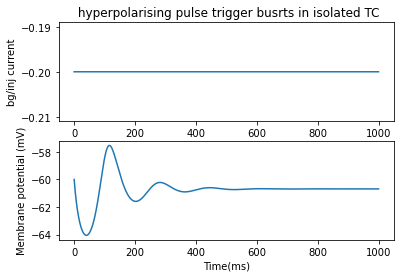

In [58]:
plt.subplots()
plt.subplot(2,1,1)
plt.plot(T, allvariables_TC_60_l[list (allvariables_TC_60_l)[0]])
plt.ylabel('bg/inj current')
plt.xlabel('Time(ms)')
plt.title(' hyperpolarising pulse trigger busrts in isolated TC')
plt.subplot(2,1,2)
plt.plot(T, allvariables_TC_60_l[list (allvariables_TC_60_l)[10]])
# plt.ylim(-70, -60)
plt.ylabel('Membrane potential (mV)')
plt.xlabel('Time(ms)')


Text(0.5, 0, 'Time (ms)')

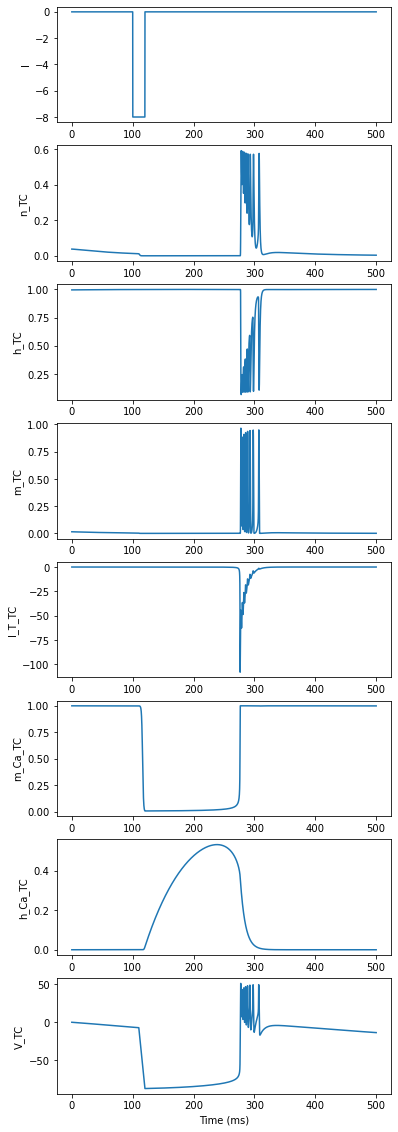

In [47]:

fig, ay = plt.subplots(8,1,figsize = (6,20))
    
for index, ay in enumerate(ay):

        ay.plot(T, allvariables_TC2[list (allvariables_TC2)[index]][4] )
#         ay.plot(T, allvariables_TC[list (allvariables_TC)[index]] )
#         ay.legend()
#         ax.set_xlim(500,50000)
        ay.set_ylabel(list (allvariables_TC2)[index])
ay.set_xlabel('Time (ms)')
# plt.savefig('burtsing in TC with I_h and different I_inj.pdf', bbox_inches = 'tight')

Plot TC bursts for different initial membrane potential values : observe how this changes the burst generation

### generate Thalamoreticular nucleus neurons bursts

#### a) For one current value, pulse triggered for a particular duration 
Note: you can alter the function input values to change the current duration 

In [114]:
def AMPA(method, tau_AMPA, V_pre, V_post, g_AMPA=0,s_AMPA=0):
        
    if method== 'soplata':
    # State variable for synaptic currents 
    
    
        V_AMPA=0 #mV, reveral potential of AMPA
        I=g_AMPA*s_AMPA*(V_post-V_AMPA)
        s_AMPAnew= ((5*(1+math.tanh(V_pre/4))*(1-s_AMPA) - s_AMPA/tau_AMPA)) * dt + s_AMPA
    
        return I,s_AMPAnew
        
    if method == 'spiketrain':
        spike_train=generatespikes(V_pre,V_th, duration = T, timestep=dt)

        g_exAMPA= pre_spiketrain_excitatory_coductance(T=T, timetsep=dt, pre_spike_train= spike_train, tau_syn=tau_AMPA, ar=533.3, g_AMPA=0)
        I=g_exAMPA(V_post-V_AMPA)
        
        return I


# def GABA_A(method, tau_GABAa, V_pre, V_post, g_GABAa=0, s_GABAa=0):


# def synapse(receptor, method,V_pre,V_post, s_AMPA =0, s_GABA_A= 0, s_GABA_B=0, g_ex_AMPA=0, g_ex_GABA_A=0, g_ex_GABA_B=0, dt = dt):
def synapse(receptor, dt,T):
    if receptor == 'AMPA':

        I_AMPA, s_AMPA= AMPA(method='soplata', tau_AMPA= 2, g_AMPA=0.08, s_AMPA=s_AMPA[i])

        
            
    if receptor == 'GABA_A': 
        I_GABA_A, s_GABA_A, k, r = GABA_A()

    if receptor == 'GABA_B':

    return I, s_AMPA=0, s_GABA_A=0, s_GABA_B=0, k=0, r=0



# s_AMPA=np.zeros(len(T))
# s_AMPA[0]=0   
# I_AMPA=np.zeros(len(T))
# for i in range(len(T)):
#     I_AMPA[i+1], s_AMPA[i+1]=synapse('AMPA',s_AMPA[i],V_TC[i],V_TRN[i], dt, 'soplata')
    

IndentationError: expected an indented block (<ipython-input-114-0a20207b0986>, line 4)

In [32]:
# V_TC = allvariables_TC['Membrane potential (mV)']
def generateburstsTRN(I,T,C_m,dt):
        
    
        allvariables_TRN={}
    
        g_Na_TRN=200   # Na+ channels (200)
        g_K_TRN=20  # K+ channels ( 15,20,25)
        g_L_TRN= 0.09 #0.3   # leaky channels : 4 regimes --> change values: 0.005, 0.0005  (change to 0.015)
        g_T_TRN=3 # the T type calcium channel

        # Potassium based leak current 
        g_KLeak_TRN=0.0172
        V_KLeak=-100

        
        g_CAN= 0.25 #mS/cm^2
        V_CAN=-20 #mV
        
        g_K_Ca= 10 #mS/cm^2
        V_K_Ca=-95 #mV

        Ca_conc=np.zeros(len(T))
        Ca_conc[0]=0.002 #mM of calcium   ---> CHECK THIS INITIAL CONC.

        
        # Initiatlise ionic reversal potential (in mV)
        V_Na_TRN=50 # Na+ channels
        V_K_TRN=-100 # K+ channels
        V_L_TRN=-77 # leaky channels CHANGE TO -77 9/3
        V_T_TRN=120
        
        V_TRN=np.zeros(len(T))
        V_TRN[0]= -60 ## switch V_init to 0 from -85 (1 March 2022), switched on 2 March
       

        # current contributed by ion channels in each time point 
        I_K_TRN=np.zeros(len(T)) # Potassium
        I_Na_TRN=np.zeros(len(T)) # Sodium
        I_L_TRN=np.zeros(len(T))  # Leaky channels
        I_KL_TRN= np.zeros(len(T))  # K+ leaky channels : added on 1 March 2022
        I_T_TRN=np.zeros(len(T))
        I_K_Ca=np.zeros(len(T))
        I_CAN=np.zeros(len(T))
        I_AMPA=np.zeros(len(T))
        I_AMPA2=np.zeros(len(T))
        I_GABAa=np.zeros(len(T))
        
        
        n_TRN=np.zeros(len(T))
        m_TRN=np.zeros(len(T))
        h_TRN=np.zeros(len(T))

        #initial rate values for K and Na rate equations
        n_TRN[0]=alpha_n_TRN(V_TRN[0])/(alpha_n_TRN(V_TRN[0])+beta_n_TRN(V_TRN[0]))
        m_TRN[0]=alpha_m_TRN(V_TRN[0])/(alpha_m_TRN(V_TRN[0])+beta_m_TRN(V_TRN[0]))
        h_TRN[0]=alpha_h_TRN(V_TRN[0])/(alpha_h_TRN(V_TRN[0])+beta_h_TRN(V_TRN[0]))

        #initial rate values for 
        m_Ca=np.zeros(len(T))
        h_Ca=np.zeros(len(T))
        m_Ca[0]=m_Ca_inf(0)
        h_Ca[0]=h_Ca_inf(0)
        
        m_CAN=np.zeros(len(T))
        m_K_Ca=np.zeros(len(T))
        m_K_Ca[0]=m_K_Ca_inf(0,2)
        m_CAN[0]=m_CAN_inf(0,2)
        
        # State variable for synaptic currents 
        g_AMPA=0.08 #mS/cm^2
        V_AMPA=0 #mV, reveral potential of AMPA
        tau_AMPA=2 #ms

        g_GABAa=0.069 #mS/cm^2
        V_GABAa=-80 #mV, reveral potential of AMPA
        tau_GABAa=5 #ms

        #Current from TC to TRN --> AMPA
        # synaptic currents in TRN --> recurrent GABA_A
        s_AMPA=np.zeros(len(T))
        s_GABAa=np.zeros(len(T))
        s_AMPA[0]=0 #find out the initial value, assuming that this denotes the initial concentration of NT, this can be taken as 0
        s_GABAa[0]=0
        
        k=np.zeros(len(T))

        # sum_giVi_TRN1= g_K_TRN*np.power(n_TRN[0],4)*V_K_TRN + g_Na_TRN*np.power(m_TRN[0],3)*h_TRN[0]*V_Na_TRN + g_L_TRN*V_L_TRN + g_T_TRN*np.power(m_Ca[0],2)*h_Ca[0]*V_T_TRN
        # sum_giVi_TRN2= sum_giVi_TRN1 + g_KLeak_TRN*V_KLeak
        # sum_giVi_TRN3 = sum_giVi_TRN1 + g_K_Ca*np.power(m_K_Ca[0],2)*V_K_Ca + g_CAN*np.power(m_CAN[0],2)*V_CAN
        # sum_giVi_TRN4= sum_giVi_TRN3 + g_KLeak_TRN*V_KLeak

        # sum_gi_TRN1= g_K_TRN*np.power(n_TRN[0],4) + g_Na_TRN*np.power(m_TRN[0],3)*h_TRN[0] + g_L_TRN + g_T_TRN*np.power(m_Ca[0],2)*h_Ca[0]
        # sum_gi_TRN2= sum_gi_TRN1 + g_KLeak_TRN
        # sum_gi_TRN3= sum_gi_TRN1 + g_K_Ca*np.power(m_K_Ca[0],2) + g_CAN*np.power(m_CAN[0],2)
        # sum_gi_TRN4= sum_gi_TRN3 +  g_KLeak_TRN


        # V_TRNss1= sum_giVi_TRN1/ sum_gi_TRN1
        # V_TRNss2= sum_giVi_TRN2/ sum_gi_TRN2
        # V_TRNss3= sum_giVi_TRN3/ sum_gi_TRN3
        # V_TRNss4 =sum_giVi_TRN4/ sum_gi_TRN4

        
        for i in range(len(T)-1):

            I_K_TRN[i]= g_K_TRN*np.power(n_TRN[i],4)*(V_TRN[i]-V_K_TRN)/C_m

            I_Na_TRN[i]=g_Na_TRN*np.power(m_TRN[i],3)*h_TRN[i]*(V_TRN[i]-V_Na_TRN)/C_m

            I_L_TRN[i]=g_L_TRN*(V_TRN[i]-V_L_TRN)/C_m

        #     I_KL_TRN[i]=g_KLeak_TRN*(V_TRN[i]-V_KLeak)/C_m

            I_T_TRN[i]=g_T_TRN*np.power(m_Ca[i],2)*h_Ca[i]*(V_TRN[i]-V_T_TRN)/C_m
 
            # I_CAN[i]=g_CAN*np.power(m_CAN[i],2)*(V_TRN[i]-V_CAN)/C_m
    
            # I_K_Ca[i]=g_K_Ca*np.power(m_K_Ca[i],2)*(V_TRN[i]-V_K_Ca)/C_m
        
            V_TRN[i+1]=(I[i]/C_m-I_L_TRN[i]-I_Na_TRN[i]-I_K_TRN[i]-I_T_TRN[i])*dt+V_TRN[i]
    
            
            n_TRN[i+1]=-(n_TRN[i]-n_inf(V_TRN[i]))*dt/tau_n(V_TRN[i]) +n_TRN[i]

            m_TRN[i+1]=-(m_TRN[i]-m_inf(V_TRN[i]))*dt/tau_m(V_TRN[i]) +m_TRN[i]

            h_TRN[i+1]=-(h_TRN[i]-h_inf(V_TRN[i]))*dt/tau_h(V_TRN[i]) +h_TRN[i]

            m_Ca[i+1]=-(m_Ca[i]-m_Ca_inf(V_TRN[i]))*dt/tau_m_Ca(V_TRN[i]) +m_Ca[i]

            h_Ca[i+1]=-(h_Ca[i]-h_Ca_inf(V_TRN[i]))*dt/tau_h_Ca(V_TRN[i]) +h_Ca[i]
            
    
            # m_K_Ca[i+1]=-(m_K_Ca[i]-m_K_Ca_inf(Ca_conc[i],2))*dt/tau_m_K_Ca(Ca_conc[i],2) +m_K_Ca[i]

            # m_CAN[i+1]= -(m_CAN[i]-m_CAN_inf(Ca_conc[i],2))*dt/tau_m_CAN(Ca_conc[i],2) +m_CAN[i]
    
            # Ca_conc[i+1]=(max(-10*I_T_TRN[i]/2.96489, 0) + (0.00024-Ca_conc[i])/5)*dt + Ca_conc[i]
         
        sum_giVi_TRN1= g_K_TRN*np.power(n_TRN[-1],4)*V_K_TRN + g_Na_TRN*np.power(m_TRN[-1],3)*h_TRN[-1]*V_Na_TRN + g_L_TRN*V_L_TRN + g_T_TRN*np.power(m_Ca[-1],2)*h_Ca[-1]*V_T_TRN
        sum_giVi_TRN2= sum_giVi_TRN1 + g_KLeak_TRN*V_KLeak
        sum_giVi_TRN3 = sum_giVi_TRN1 + g_K_Ca*np.power(m_K_Ca[-1],2)*V_K_Ca + g_CAN*np.power(m_CAN[-1],2)*V_CAN
        sum_giVi_TRN4= sum_giVi_TRN3 + g_KLeak_TRN*V_KLeak

        sum_gi_TRN1= g_K_TRN*np.power(n_TRN[-1],4) + g_Na_TRN*np.power(m_TRN[-1],3)*h_TRN[-1] + g_L_TRN + g_T_TRN*np.power(m_Ca[-1],2)*h_Ca[-1]
        sum_gi_TRN2= sum_gi_TRN1 + g_KLeak_TRN
        sum_gi_TRN3= sum_gi_TRN1 + g_K_Ca*np.power(m_K_Ca[-1],2) + g_CAN*np.power(m_CAN[-1],2)
        sum_gi_TRN4= sum_gi_TRN3 +  g_KLeak_TRN


        V_TRNss1= sum_giVi_TRN1/ sum_gi_TRN1
        V_TRNss2= sum_giVi_TRN2/ sum_gi_TRN2
        V_TRNss3= sum_giVi_TRN3/ sum_gi_TRN3
        V_TRNss4 =sum_giVi_TRN4/ sum_gi_TRN4

        print({'V_TRNss1': V_TRNss1, 'V_TRNssKLeak': V_TRNss2, 'V_TRNssCANKCa': V_TRNss3, 'V_TRNssAll': V_TRNss4 })
        
        allvariables_TRN = {'Injected current (nA)': I, 'activation gate K+, n':n_TRN, 'inactivation gate Na+,h':h_TRN, 'activation gate Na+, m':m_TRN, 'I_T (nA)':I_T_TRN, 'm_Ca': m_Ca, 'h_Ca':h_Ca, 'Membrane potential (mV)':V_TRN, 'I_CAN':I_CAN, 'I_KCa':I_K_Ca, 'I_KLeak':I_KL_TRN} 
#         allvariables= {'Injected current (nA)': I, 'I_T (nA)':I_T_TRN, 'm_Ca': m_Ca, 'h_Ca':h_Ca, 'Membrane potential (mV)':V_TRN }
#  allvariables_TRN = {'Injected current (nA)': I, 'activation gate K+, n':n_TRN, 'inactivation gate Na+,h':h_TRN, 'activation gate Na+, m':m_TRN, 'I_T (nA)':I_T_TRN, 'm_Ca': m_Ca, 'h_Ca':h_Ca, 'Membrane potential (mV)':V_TRN, 'I_AMPAmethod1':I_AMPA, 'gnetAMPA': gnetAMPA, 'g_AMPA': g_AMPA, 's_AMPA':s_AMPA, 'k':k} 
        return allvariables_TRN



In [17]:
#METHOD 2: with g_ex (spike trains from the presynaptic neuron or TC here)

def generateburstsTRNmethod2(I,T,C_m,g_ex):
        
    
        allvariables_TRN={}
    
        g_Na_TRN=200   # Na+ channels (200)
        g_K_TRN=20  # K+ channels ( 15,20,25)
        g_L_TRN= 0.3 #0.3   # leaky channels
        g_T_TRN=3 # the T type calcium channel
        
        g_CAN= 0.25 #mS/cm^2
        V_CAN=-20 #mV
        
        g_K_Ca= 10 #mS/cm^2
        V_K_Ca=-95 #mV

        Ca_conc=np.zeros(len(T))
        Ca_conc[0]=0.002 #mM of calcium   ---> CHECK THIS INITIAL CONC.

        
        # Initiatlise ionic reversal potential (in mV)
        V_Na_TRN=50 # Na+ channels
        V_K_TRN=-100 # K+ channels
        V_L_TRN=-90  # leaky channels
        V_T_TRN=120
    
        V_TRN2=np.zeros(len(T))
        V_TRN2[0]=-85

        # current contributed by ion channels in each time point 
        I_K_TRN=np.zeros(len(T)) # Potassium
        I_Na_TRN=np.zeros(len(T)) # Sodium
        I_L_TRN=np.zeros(len(T))  # Leaky channels
        I_T_TRN=np.zeros(len(T))
        I_K_Ca=np.zeros(len(T))
        I_CAN=np.zeros(len(T))
        I_AMPA=np.zeros(len(T))
        I_AMPA2=np.zeros(len(T))
        I_GABAa=np.zeros(len(T))
        
        
        n_TRN=np.zeros(len(T))
        m_TRN=np.zeros(len(T))
        h_TRN=np.zeros(len(T))

        #initial rate values for K and Na rate equations
        n_TRN[0]=alpha_n_TRN(V_TRN[0])/(alpha_n_TRN(V_TRN[0])+beta_n_TRN(V_TRN[0]))
        m_TRN[0]=alpha_m_TRN(V_TRN[0])/(alpha_m_TRN(V_TRN[0])+beta_m_TRN(V_TRN[0]))
        h_TRN[0]=alpha_h_TRN(V_TRN[0])/(alpha_h_TRN(V_TRN[0])+beta_h_TRN(V_TRN[0]))

        #initial rate values for 
        m_Ca=np.zeros(len(T))
        h_Ca=np.zeros(len(T))
        m_Ca[0]=m_Ca_inf(0)
        h_Ca[0]=h_Ca_inf(0)
        
        m_CAN=np.zeros(len(T))
        m_K_Ca=np.zeros(len(T))
        m_K_Ca[0]=m_K_Ca_inf(0)
        m_CAN[0]=m_CAN_inf(0)
        
        # State variable for synaptic currents 
        g_AMPA=0.08 #mS/cm^2
        V_AMPA=0 #mV, reveral potential of AMPA
        tau_AMPA=2 #ms

        g_GABAa=0.069 #mS/cm^2
        V_GABAa=-80 #mV, reveral potential of AMPA
        tau_GABAa=5 #ms

        #Current from TC to TRN --> AMPA
        # synaptic currents in TRN --> recurrent GABA_A
        s_AMPA=np.zeros(len(T))
        s_GABAa=np.zeros(len(T))
        s_AMPA[0]=0 #find out the initial value, assuming that this denotes the initial concentration of NT, this can be taken as 0
        s_GABAa[0]=0

        
        for i in range(len(T)-1):

            I_K_TRN[i]= g_K_TRN*np.power(n_TRN[i],4)*(V_TRN2[i]-V_K_TRN)/C_m

            I_Na_TRN[i]=g_Na_TRN*np.power(m_TRN[i],3)*h_TRN[i]*(V_TRN2[i]-V_Na_TRN)/C_m

            I_L_TRN[i]=g_L_TRN*(V_TRN2[i]-V_L_TRN)/C_m

            I_T_TRN[i]=g_T_TRN*np.power(m_Ca[i],2)*h_Ca[i]*(V_TRN2[i]-V_T_TRN)/C_m
 
            I_CAN[i]=g_CAN*np.power(m_CAN[i],2)*(V_TRN2[i]-V_CAN)/C_m
    
            I_K_Ca[i]=g_K_Ca*np.power(m_K_Ca[i],2)*(V_TRN2[i]-V_K_Ca)/C_m
            
            I_AMPA2[i]=g_ex[i]*((V_TRN2[i]-V_AMPA))

#             I_GABAa[i]=g_GABAa*s_GABAa[i]*(V_TRN[i]-V_GABAa)
    
#             V_TRN[i+1]=(I[i]/C_m-I_L_TRN[i]-I_Na_TRN[i]-I_K_TRN[i]-I_T_TRN[i]- I_AMPA[i]-I_GABAa[i])*dt+V_TRN[i]
        
          
        
            V_TRN2[i+1]=(I[i]/C_m-I_L_TRN[i]-I_Na_TRN[i]-I_K_TRN[i]-I_T_TRN[i]- I_AMPA2[i])*dt+V_TRN2[i]
        
                   
            n_TRN[i+1]=-(n_TRN[i]-n_inf(V_TRN2[i]))*dt/tau_n(V_TRN2[i]) +n_TRN[i]

            m_TRN[i+1]=-(m_TRN[i]-m_inf(V_TRN2[i]))*dt/tau_m(V_TRN2[i]) +m_TRN[i]

            h_TRN[i+1]=-(h_TRN[i]-h_inf(V_TRN2[i]))*dt/tau_h(V_TRN2[i]) +h_TRN[i]

            m_Ca[i+1]=-(m_Ca[i]-m_Ca_inf(V_TRN2[i]))*dt/tau_m_Ca(V_TRN2[i]) +m_Ca[i]

            h_Ca[i+1]=-(h_Ca[i]-h_Ca_inf(V_TRN2[i]))*dt/tau_h_Ca(V_TRN2[i]) +h_Ca[i]
            
    
            m_K_Ca[i+1]=-(m_K_Ca[i]-m_K_Ca_inf(Ca_conc[i]))*dt/tau_m_K_Ca(Ca_conc[i]) +m_K_Ca[i]
    
            Ca_conc[i+1]=(max(-10*I_T_TRN[i]/2.96489, 0) + (0.00024-Ca_conc[i])/5)*dt + Ca_conc[i]
         

        allvariables_TRN = {'Injected current (nA)': I, 'activation gate K+, n':n_TRN, 'inactivation gate Na+,h':h_TRN, 'activation gate Na+, m':m_TRN, 'I_T (nA)':I_T_TRN, 'm_Ca': m_Ca, 'h_Ca':h_Ca, 'mV with spiketrain':V_TRN2, 'I_AMPAmethod2':I_AMPA2} 
#         allvariables= {'Injected current (nA)': I, 'I_T (nA)':I_T_TRN, 'm_Ca': m_Ca, 'h_Ca':h_Ca, 'Membrane potential (mV)':V_TRN }
        return allvariables_TRN


#### b)  for different input current pulse values and different initial condition of membrane potential : currentlevels and volt_init

In [41]:
def generateburstsTRN2(I,T,C_m, currentlevels, volt_init):
        '''
        Inputs: I - The injected current pulse to trigger the TRN circuit (nA), 
        C_m - the specific capacitance of the membrane (microF/cm2)
        currentlevels- The different ampplitudes of injection current for simulation
        volt_init - different initial values of the voltage  

        the function computes the evolution of membrane potential along with the gating variables of each
        of the currents mentioned below for all possible amplitude of external current pulse 
        and return a dictionary with all the variables
        '''     
        ''' TRN cells: g: represents the conductance value of each ion channel in TRN  '''

        g_Na_TRN=200   # Na+ channels 
        g_K_TRN=20  # K+ channels
        g_L_TRN=0.3   # leaky channels, earlier was 0.3
        g_T_TRN=3 # the T type calcium channel
        # Initiatlise ionic reversal potential (in mV)
        V_Na_TRN=50 # Na+ channels
        V_K_TRN=-100 # K+ channels
        V_L_TRN=-90  # leaky channels
        V_T_TRN=120

        V_TRN=np.zeros([len(currentlevels),len(T)])
        V_TRN[:,0]=volt_init[0] # initial value of membrane potential
        '''
        HH based model for TRN cells, parameters: I_Na_TRN, I_K_TRN, I_L_TRN and I_T_TRN the current value for sodium, 
        potassium, low threshold calcium channels or T type channels and leaky channels
        '''
        # current contributed by ion channels in each time point 
        I_K_TRN=np.zeros([len(currentlevels),len(T)]) # Potassium
        I_Na_TRN=np.zeros([len(currentlevels),len(T)]) # Sodium
        I_L_TRN=np.zeros([len(currentlevels),len(T)])  # Leaky channels
        I_T_TRN=np.zeros([len(currentlevels),len(T)])
        n_TRN=np.zeros([len(currentlevels),len(T)])
        m_TRN=np.zeros([len(currentlevels),len(T)])
        h_TRN=np.zeros([len(currentlevels),len(T)])

        #initial rate values for K and Na rate equations
        n_TRN[:,0]=alpha_n_TRN(V_TRN[:,0])/(alpha_n_TRN(V_TRN[:,0])+beta_n_TRN(V_TRN[:,0]))
        m_TRN[:,0]=alpha_m_TRN(V_TRN[:,0])/(alpha_m_TRN(V_TRN[:,0])+beta_m_TRN(V_TRN[:,0]))
        h_TRN[:,0]=alpha_h_TRN(V_TRN[:,0])/(alpha_h_TRN(V_TRN[:,0])+beta_h_TRN(V_TRN[:,0]))

        #initial rate values for 
        m_Ca=np.zeros([len(currentlevels),len(T)])
        h_Ca=np.zeros([len(currentlevels),len(T)])
        m_Ca[:,0]=m_Ca_inf(0)
        h_Ca[:,0]=h_Ca_inf(0)
         
        for j in range (len(currentlevels)):
            
            for i in range(len(T)-1):
                 
                I_K_TRN[j,i]= g_K_TRN*np.power(n_TRN[j,i],4)*(V_TRN[j,i]-V_K_TRN)/C_m

                I_Na_TRN[j,i]=g_Na_TRN*np.power(m_TRN[j,i],3)*h_TRN[j,i]*(V_TRN[j,i]-V_Na_TRN)/C_m

                I_L_TRN[j,i]=g_L_TRN*(V_TRN[j,i]-V_L_TRN)/C_m

                I_T_TRN[j,i]=g_T_TRN*np.power(m_Ca[j,i],2)*h_Ca[j,i]*(V_TRN[j,i]-V_T_TRN)/C_m
                
                I[j,100000:110000]=currentlevels[j] 

                V_TRN[j,i+1]=(I[j,i]/C_m-I_L_TRN[j,i]-I_Na_TRN[j,i]-I_K_TRN[j,i]-I_T_TRN[j,i])*dt+V_TRN[j,i]

                n_TRN[j,i+1]=(alpha_n_TRN(V_TRN[j,i])*(1-n_TRN[j,i])-beta_n_TRN(V_TRN[j,i])*n_TRN[j,i])*dt+n_TRN[j,i]

                m_TRN[j,i+1]=(alpha_m_TRN(V_TRN[j,i])*(1-m_TRN[j,i])-beta_m_TRN(V_TRN[j,i])*m_TRN[j,i])*dt+m_TRN[j,i]

                h_TRN[j,i+1]=(alpha_h_TRN(V_TRN[j,i])*(1-h_TRN[j,i])-beta_h_TRN(V_TRN[j,i])*h_TRN[j,i])*dt+h_TRN[j,i]

                m_Ca[j,i+1]=-(m_Ca[j,i]-m_Ca_inf(V_TRN[j,i]))*dt/tau_m_Ca(V_TRN[j,i]) +m_Ca[j,i]

                h_Ca[j,i+1]=-(h_Ca[j,i]-h_Ca_inf(V_TRN[j,i]))*dt/tau_h_Ca(V_TRN[j,i]) +h_Ca[j,i]
                        

        allvariables_TRN = {'I': I, 'n':n_TRN, 'h':h_TRN, 'm':m_TRN, 'I_T':I_T_TRN, 'm_Ca': m_Ca, 'h_Ca':h_Ca, 'V':V_TRN }
        
        return allvariables_TRN





In [33]:

T= duration_of_sim(0, 1000, dt=0.01)

I_TRNinput= 0.20*np.ones(len(T))
# I_TRNinput[100000:120000]= -1.5
# I_TRNinput[140001:160000]= 1.5
# I_TRNinput[320001:340000]= -0.5
# # I_TRNinput[700000:720000]=-3.5
# I_TRNinput[720001:740000]=-0.5
allvariables_TRN=generateburstsTRN(I_TRNinput,T,C_m, dt=0.01)
# allvariables2_TRN=generateburstsTRNmethod2(I,T,C_m,g_ex)

{'V_TRNss1': -75.08466025651045, 'V_TRNssKLeak': -79.04958895007181, 'V_TRNssCANKCa': -75.08466025651045, 'V_TRNssAll': -79.04958895007181}


No handles with labels found to put in legend.


Text(0.5, 0, 'Time(ms)')

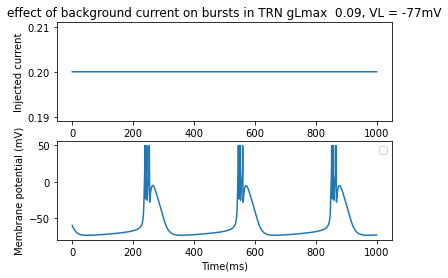

In [34]:
plt.subplots()
plt.subplot(2,1,1)
plt.plot(T, allvariables_TRN[list (allvariables_TRN)[0]])
plt.ylabel('Injected current')
plt.xlabel('Time(ms)')
plt.title('effect of background current on bursts in TRN gLmax  0.09, VL = -77mV')
plt.subplot(2,1,2)
plt.plot(T, allvariables_TRN[list (allvariables_TRN)[7]])
#  label = 'RMP = -50 mV'
plt.legend()
plt.ylabel('Membrane potential (mV)')
plt.xlabel('Time(ms)')
# plt.savefig('to remove oscillations - Vinit =-50 constant 0 in TRN -gLmax - 0.02, -77mV .png', bbox_
# inches = 'tight')

<ipython-input-19-e5d3fb210d53>:15: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig('conductance value from Soplata (gnetAMPA and s_AMPA) and spike train methods (g_ex)modified g_bar=0.00015 and same tau_AMPA .pdf', bbox_inches = 'tight')
<ipython-input-19-e5d3fb210d53>:15: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig('conductance value from Soplata (gnetAMPA and s_AMPA) and spike train methods (g_ex)modified g_bar=0.00015 and same tau_AMPA .pdf', bbox_inches = 'tight')
C:\Users\mahal\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


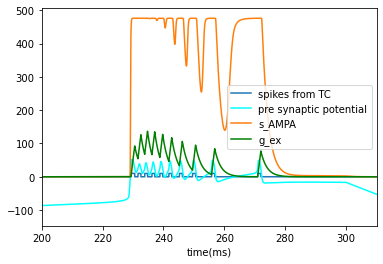

In [19]:
gnetAMPA=allvariables_TRN['gnetAMPA']
g_AMPA=allvariables_TRN['g_AMPA']
s_AMPA=allvariables_TRN['s_AMPA']
k = allvariables_TRN['k']
# plt.plot(T,k,label='term')
plt.plot(T,spike_train*10,label='spikes from TC')
plt.plot(T,V_TC, label ='pre synaptic potential', color='cyan')
plt.plot
plt.xlim(200,310)
# plt.plot(T,g_AMPA, label='g_AMPA')
plt.plot(T,s_AMPA*500, label='s_AMPA')
plt.plot(T,g_ex*500, label='g_ex', color='green')
plt.xlabel('time(ms)')
plt.legend()
# plt.savefig('conductance value from Soplata (gnetAMPA and s_AMPA) and spike train methods (g_ex)modified g_bar=0.00015 and same tau_AMPA .pdf', bbox_inches = 'tight')

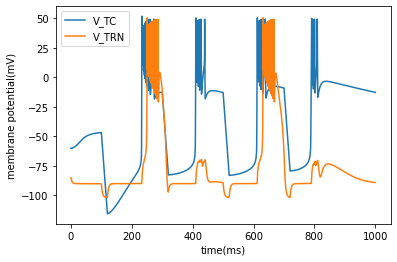

In [73]:
plt.plot(T,V_TC, label='V_TC')
V_TRN= allvariables_TRN['Membrane potential (mV)']
plt.plot(T,V_TRN, label='V_TRN')
plt.xlabel('time(ms)')
plt.ylabel('membrane potential(mV)')
plt.legend()
plt.savefig('Connect TC to TRN with AMPA using Soplata.pdf', bbox_inches = 'tight')

In [23]:
allvariables_TRN[list (allvariables_TRN)[1]]

array([7.33545026e-07, 7.33545026e-07, 7.33544958e-07, ...,
       6.29096817e-06, 6.29096817e-06, 6.29096817e-06])

Text(0.5, 0, 'Time (ms)')

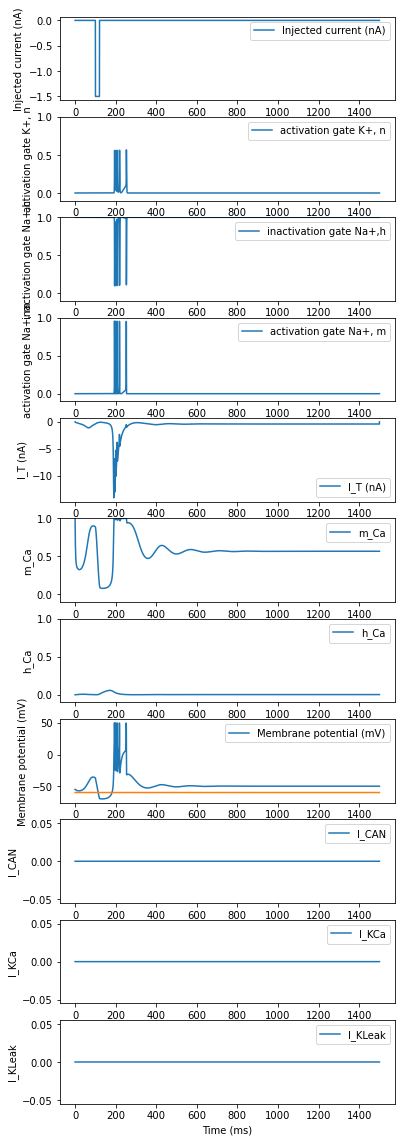

In [10]:

fig, ax = plt.subplots(11,1,figsize = (6,20))


for index, ax in enumerate(ax):
        
        ax.plot(T, allvariables_TRN[list (allvariables_TRN)[index]], label=list (allvariables_TRN)[index])
#         ax.plot(T, allvariables_TRN[list (allvariables_TRN)[index]], label='with all currents')
        ax.legend()
        if index== 1: 
                ax.set_ylim(-0.1,1)
        if index ==2:
                 ax.set_ylim(-0.1,1)
        if index == 3:
                 ax.set_ylim(-0.1,1)
        if index == 5:
                 ax.set_ylim(-0.1,1)
        if index == 6:
                 ax.set_ylim(-0.1,1)
        if index == 7:
                 line=-60*np.ones(len(T))
                 ax.plot(T,line) 
        ax.set_ylabel(list (allvariables_TRN)[index])

    
ax.set_xlabel('Time (ms)')
# plt.savefig('Troubleshoot - burtsing in siolated TRN - gL = 0.0002 , VTRN_init:-85 +  input, ICAN, IKCa .pdf', bbox_inches = 'tight')
# ax.set_title('all parameters in TRN')

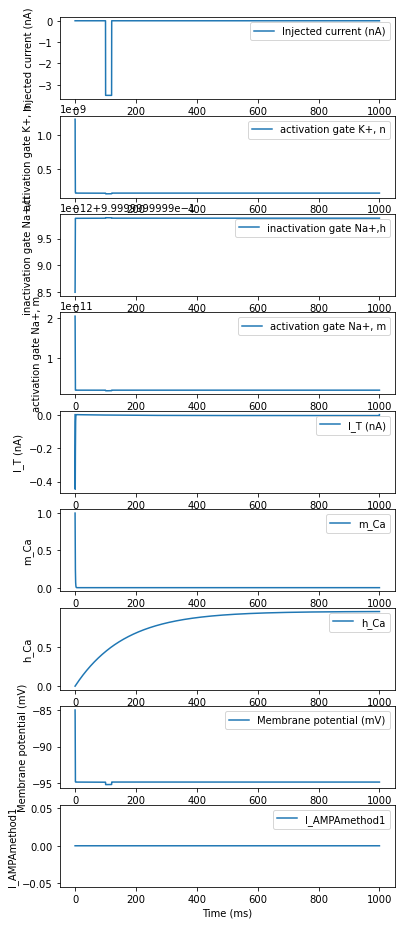

In [97]:
fig, ax = plt.subplots(9,1,figsize = (6,16))
# allvariables = {'I': I, 'n':n_TRN, 'h':h_TRN, 'm':m_TRN, 'I_T':I_T_TRN, 'V':V_TRN}

for index, ax in enumerate(ax):
    
        ax.plot(T, allvariables_TRN_ICAN[list (allvariables_TRN_ICAN)[index]], label=list (allvariables_TRN_ICAN)[index])
        ax.legend()
#         ax.set_xlim(0,100)
        ax.set_ylabel(list (allvariables_TRN_ICAN)[index])
ax.set_xlabel('Time (ms)')
# ax.set_title('TRN with ampa current using soplata method')
plt.savefig('burtsing in isolated TRN with I_K_Ca withOUT I_CAN for VTRN_init=-85, .pdf', bbox_inches = 'tight')
        
# for key, value in allvariables.items():

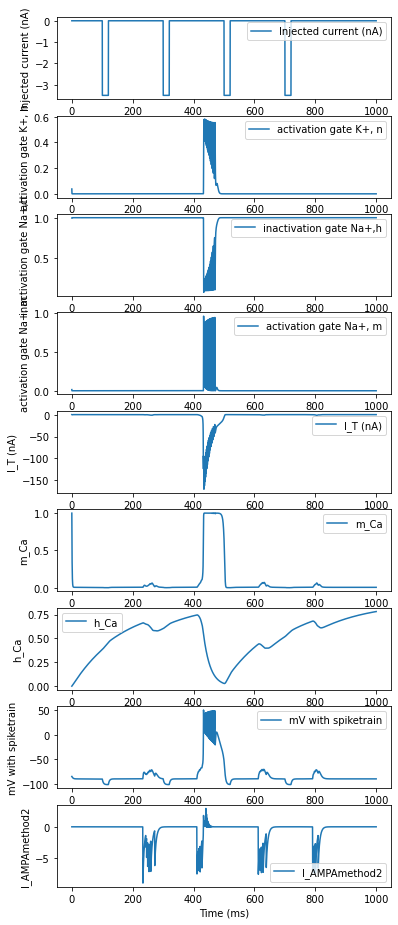

In [66]:
fig, ax = plt.subplots(9,1,figsize = (6,16))
# allvariables = {'I': I, 'n':n_TRN, 'h':h_TRN, 'm':m_TRN, 'I_T':I_T_TRN, 'V':V_TRN}

for index, ax in enumerate(ax):
    
        ax.plot(T, allvariables2_TRN[list (allvariables2_TRN)[index]], label=list (allvariables2_TRN)[index])
        ax.legend()
#         ax.set_xlim(0,100)
        ax.set_ylabel(list (allvariables2_TRN)[index])
ax.set_xlabel('Time (ms)')
# ax.set_title(' TRN with ampa current using g_ex')
plt.savefig('multiple burtsing in TRN with for VTRN_init=-85, g or exp method modified gbar=0.00015.pdf', bbox_inches = 'tight')       
# for key, value in allvariables.items():


In [29]:
# plotting m_inf and h_inf 

V_check=np.linspace(-200,100,40)
m_Ca=np.zeros(len(V_check))
h_Ca=np.zeros(len(V_check))
tau__m=np.zeros(len(V_check))
tau__h=np.zeros(len(V_check))
alpha_n_TRN_check=np.zeros(len(V_check))
alpha_m_TRN_check=np.zeros(len(V_check))
alpha_h_TRN_check=np.zeros(len(V_check))
beta_n_TRN_check=np.zeros(len(V_check))
beta_m_TRN_check=np.zeros(len(V_check))
beta_h_TRN_check=np.zeros(len(V_check))
n_inf=np.zeros(len(V_check))
m_inf=np.zeros(len(V_check))
h_inf=np.zeros(len(V_check))


m_Ca_TC=np.zeros(len(V_check))
h_Ca_TC=np.zeros(len(V_check))




for j in range(len(V_check)):
    
    m_Ca[j]=m_Ca_inf(V_check[j])
    h_Ca[j]=h_Ca_inf(V_check[j])
    tau__h[j]=tau_h(V_check[j])
    tau__m[j]=tau_m(V_check[j])
    alpha_n_TRN_check[j]=alpha_n_TRN(V_check[j])
    alpha_m_TRN_check[j]=alpha_m_TRN(V_check[j])
    alpha_h_TRN_check[j]=alpha_h_TRN(V_check[j])
    beta_n_TRN_check[j]=beta_n_TRN(V_check[j])
    beta_m_TRN_check[j]=beta_m_TRN(V_check[j])
    beta_h_TRN_check[j]=beta_h_TRN(V_check[j])
    n_inf[j]=alpha_n_TRN(V_check[j])/(alpha_n_TRN(V_check[j])+beta_n_TRN(V_check[j]))
    m_inf[j]=alpha_m_TRN(V_check[j])/(alpha_m_TRN(V_check[j])+beta_m_TRN(V_check[j]))
    h_inf[j]=alpha_h_TRN(V_check[j])/(alpha_h_TRN(V_check[j])+beta_h_TRN(V_check[j]))
    
    m_Ca_TC[j]=m_Ca_TC_inf(V_check[j])
    h_Ca_TC[j]=h_Ca_TC_inf(V_check[j])


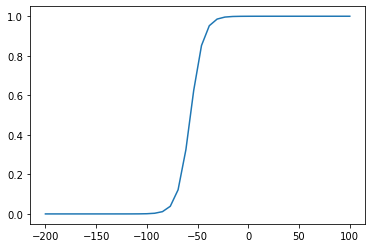

In [27]:
plt.plot(V_check, m_Ca_TC)

No handles with labels found to put in legend.


Text(0.5, 0, 'Membrane potential')

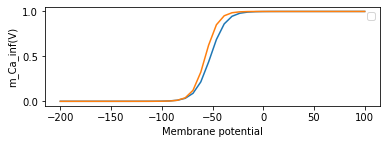

In [33]:
plt.subplot(2,1,1)
plt.plot(V_check,m_Ca)
plt.plot(V_check, m_Ca_TC)
# plt.plot(V_check,m_Ca2,label="V+52")
plt.legend()
# plt.ylim(0, 1)
plt.ylabel("m_Ca_inf(V)")
plt.xlabel("Membrane potential")
# plt.title("m and h infinities of T channel in TC")
# plt.subplot(2,1,2)
# plt.plot(V_check,h_Ca_TC, label="h")
# plt.legend()
# # plt.ylim(0, 1)
# plt.ylabel("h_Ca_inf(V)")
# plt.savefig('m_Ca_inf for V+52 and 80.pdf', bbox_inches = 'tight')


In [ ]:
plt.subplot(2,1,1)
plt.plot(V_check,m_Ca,label="m")
plt.legend()
# plt.ylim(0, 1)
plt.ylabel("m_Ca_inf(V)")
plt.subplot(2,1,2)
plt.plot(V_check,h_Ca, label="h")
plt.legend()
# plt.ylim(0, 1)
plt.ylabel("h_Ca_inf(V)")
plt.xlabel("Membrane potential")
plt.title('T channel activation and inactivation gates infinity values')

In [ ]:
plt.subplot(3,1,1)
plt.plot(V_check,alpha_n_TRN_check,label="alpha_n")
plt.legend()

plt.subplot(3,1,2)
plt.plot(V_check,alpha_m_TRN_check, label="alpha_m")
plt.legend()
# plt.ylim(0, 1)

plt.subplot(3,1,3)
plt.plot(V_check,alpha_h_TRN_check, label="alpha_h")
plt.legend()
# plt.ylim(0, 1)

plt.xlabel("Membrane potential")
plt.title('TRN open probabilities of sodium and potassium gates')

In [ ]:
plt.subplot(3,1,1)
plt.plot(V_check,beta_n_TRN_check,label="beta_n")
plt.legend()

plt.subplot(3,1,2)
plt.plot(V_check,beta_m_TRN_check, label="beta_m")
plt.legend()
# plt.ylim(0, 1)

plt.subplot(3,1,3)
plt.plot(V_check,beta_h_TRN_check, label="beta_h")
plt.legend()
# plt.ylim(0, 1)

plt.xlabel("Membrane potential")
plt.title('TRN closed probabilities of sodium and potassium gates')


In [ ]:
plt.subplot(3,1,1)
plt.plot(V_check,n_inf,label="n")
plt.legend()
# plt.ylim(0, 1)
plt.ylabel("n_inf(V)")
plt.subplot(3,1,2)
plt.plot(V_check,m_inf, label="m")
plt.legend()
# plt.ylim(0, 1)
plt.ylabel("m_inf(V)")
plt.subplot(3,1,3)
plt.plot(V_check,h_inf, label="h")
plt.legend()
# plt.ylim(0, 1)
plt.ylabel("h_inf(V)")
plt.xlabel("Membrane potential")
plt.title('')

In [ ]:
plt.subplot(2,1,1)
plt.plot(V_check,tau__m, label="tau_m")
plt.legend()
plt.subplot(2,1,2)
plt.plot(V_check,tau__h, label="tau_h")
plt.legend()
plt.xlabel("Membrane potential")


### Connect TRN and TC-- reciprocal synaptic connections


In [ ]:
def allconductance(method):

    if method=='soplata17':
        g_TC={}
        g_TC={'g_Na_TC': 90, 'g_K_TC':10, 'g_T_TC': 2, 'g_h_TC': 0.025, 'g_leak_TC': 0.001, 'g_KLeak_TC' : 0.0172, 'g_GABA_A_TC': 0.069 }

        g_TRN={}
        g_TRN= {'g_Na_TRN': 200, 'g_K_TRN':20, 'g_T_TRN': 3, 'g_leak_TRN': 0.05, 'g_KLeak_TRN' : 0.0172, 'g_GABA_A_TRN': 0.069}
        gvalues = np.append(g_TRN, g_TC)
        g_TC= gvalues[]

    if method=='soplata17 modified gLeak-TRN':
        g_TC={}
        g_TC={'g_Na_TC': 90, 'g_K_TC':10, 'g_T_TC': 2, 'g_h_TC': 0.025, 'g_leak_TC': 0.001, 'g_KLeak_TC' : 0.0172, 'g_GABA_A_TC': 0.069 }

        g_TRN={}
        g_TRN= {'g_Na_TRN': 200, 'g_K_TRN':20, 'g_T_TRN': 3, 'g_leak_TRN': 0.3, 'g_KLeak_TRN' : 0.0172, 'g_GABA_A_TRN': 0.069}
        gvalues = np.append(g_TRN, g_TC)
        g_TC= gvalues[]

    if method=='Destexhe93'


In [9]:
def connect_TRN_TC(I_TC, I_TRN, T, C_m, dt):

    ### TC defining and initialising values

    g_Na_TC=90  #90, destexhe93--> 30
    g_K_TC=10
    g_T_TC=2 #destexhe93--> 1.75   [ 0.50, 0.75, 1, 1.5, 2]
    g_H=0.015#use 0 to remove influence of Ih current,otherwise use 0.015 # DEPENDS??? changed from 0.025 on 8/3/2022 (switch between 0.001 and 0.015) (destexhe93 --> 0.12)
    g_L_TC=0.01 # 0.01 leads to overflow/ changed from 0.001 to 0.01 on 8 March 2022 (Destexhe93-- 0.05)
    # g_KL_TC= 0.0172 #(for a maximal conductance of 5 nS)
    g_KL_TC= 0



    V_Na_TC=50
    V_K_TC=-100
    V_H=-43 #mV
    V_L_TC=-70 #Destxhe93 = -86
    V_T_TC = 120 # used this instead of using the dynamic equation in Austin Sopalata 2017
    V_KL_TC= -100


    # membrane potential at each time point
    V_TC=np.zeros(len(T))
    V_TC[0]=-60   # changed from -60 to -55 on 8/3/2022 as the steady state value in isolated TRN is around -54
    

    # current contributed by ion channels in each time point 
    I_K_TC=np.zeros(len(T)) # Potassium
    I_Na_TC=np.zeros(len(T)) # Sodium
    I_L_TC=np.zeros(len(T))  # Leaky channels
    I_H_TC=np.zeros(len(T))
    I_T_TC=np.zeros(len(T))
    I_KL_TC= np.zeros(len(T))
    I_GABAb= np.zeros(len(T))
    I_GABAa=np.zeros(len(T))
    I_tot_TC= np.zeros(len(T))
    I_syn_TC=np.zeros(len(T))
    I_tot_TC_wsyn= np.zeros(len(T))

    # open probabilities of each channel gates at each time point
    n_TC=np.zeros(len(T))
    m_TC=np.zeros(len(T))
    h_TC=np.zeros(len(T))
    S_H_TC=np.zeros(len(T))
    F_H_TC=np.zeros(len(T))
    
    tau_TC=np.zeros(len(T))
       
    
    # state variables for synaptic current from TRN to TC
    g_GABAb= 0.01          #  0.001 mS/cm^2 ---.  ''' increase GABAb to see if that allows bursting in TC without an external pulse ''' (Destexhe93 - 4 nS, or 0.013 mS/cm2)
    V_GABAb= -95 #mV

    g=np.zeros(len(T))
    r=np.zeros(len(T))

    g[0]=0
    r[0]=0

    
    #state varaible equation (r,g)
    k1= 0.5 #(mM^-1 ms^-1)
    k2=0.0012 #(ms^-1)
    k3=0.18 #(ms^-1)
    k4= 0.034 #(ms^-1)
    
    
    #TRN cells Note: TRN and TC cells have the same Na and K channel kinetics according to Austin Soplata 2017 /................

    #initial rate values for K and Na rate equations
    n_TC[0]=alpha_n_TRN(V_TC[0])/(alpha_n_TRN(V_TC[0])+beta_n_TRN(V_TC[0]))
    m_TC[0]=alpha_m_TRN(V_TC[0])/(alpha_m_TRN(V_TC[0])+beta_m_TRN(V_TC[0]))
    h_TC[0]=alpha_h_TRN(V_TC[0])/(alpha_h_TRN(V_TC[0])+beta_h_TRN(V_TC[0]))
    alpha_S_TC_0= H_TC_inf(V_TC[0])/tau_H_S(V_TC[0])
    beta_S_TC_0= (1-H_TC_inf(V_TC[0]))/tau_H_S(V_TC[0])
    S_H_TC[0]= alpha_S_TC_0/(alpha_S_TC_0 + beta_S_TC_0)

    alpha_F_TC_0= H_TC_inf(V_TC[0])/tau_H_F(V_TC[0])
    beta_F_TC_0= (1-H_TC_inf(V_TC[0]))/tau_H_F(V_TC[0])
    F_H_TC[0]= alpha_F_TC_0/(alpha_F_TC_0 + beta_F_TC_0)
    

    #initial rate values for 
    m_Ca_TC=np.zeros(len(T))
    h_Ca_TC=np.zeros(len(T))

    m_Ca_TC[0]=m_Ca_TC_inf(0)
    h_Ca_TC[0]=h_Ca_TC_inf(0)



    ### TRN defining and initialising values:

    g_Na_TRN=200   # Na+ channels (200- destexhe93- 100)
    g_K_TRN=20  # K+ channels ( 15,20,25)
    g_L_TRN= 0.1#0.3   # leaky channels (destexhe93- 0.05)
    g_T_TRN=3 # the T type calcium channel (destexhe93- 1.75)
    
    g_CAN= 0.25 #mS/cm^2
    V_CAN=-20 #mV
    
    g_K_Ca= 10 #mS/cm^2
    V_K_Ca=-95 #mV

    Ca_conc=np.zeros(len(T))
    Ca_conc[0]=0.002 #mM of calcium   ---> CHECK THIS INITIAL CONC.

    
    # Initiatlise ionic reversal potential (in mV)
    V_Na_TRN=50 # Na+ channels
    V_K_TRN=-100 # K+ channels
    V_L_TRN=-77  # leaky channels, implementing Bazhenov 2002 value =-77 from -90 on 8/3/2022 (destexhe93: -80)
    V_T_TRN=120
    
    V_TRN=np.zeros(len(T))
    V_TRN[0]=-60
    

    # current contributed by ion channels in each time point 
    I_K_TRN=np.zeros(len(T)) # Potassium
    I_Na_TRN=np.zeros(len(T)) # Sodium
    I_L_TRN=np.zeros(len(T))  # Leaky channels
    I_T_TRN=np.zeros(len(T))
    I_K_Ca=np.zeros(len(T))
    I_CAN=np.zeros(len(T))
    I_AMPA=np.zeros(len(T))
    I_tot_TRN_wsyn=np.zeros(len(T))
    

    # I_GABAa=np.zeros(len(T))
    
    
    n_TRN=np.zeros(len(T))
    m_TRN=np.zeros(len(T))
    h_TRN=np.zeros(len(T))

    #initial rate values for K and Na rate equations
    n_TRN[0]=alpha_n_TRN(V_TRN[0])/(alpha_n_TRN(V_TRN[0])+beta_n_TRN(V_TRN[0]))
    m_TRN[0]=alpha_m_TRN(V_TRN[0])/(alpha_m_TRN(V_TRN[0])+beta_m_TRN(V_TRN[0]))
    h_TRN[0]=alpha_h_TRN(V_TRN[0])/(alpha_h_TRN(V_TRN[0])+beta_h_TRN(V_TRN[0]))

    #initial rate values for 
    m_Ca=np.zeros(len(T))
    h_Ca=np.zeros(len(T))
    m_Ca[0]=m_Ca_inf(0)
    h_Ca[0]=h_Ca_inf(0)
    
    m_CAN=np.zeros(len(T))
    m_K_Ca=np.zeros(len(T))
    m_K_Ca[0]=m_K_Ca_inf(0,2)
    m_CAN[0]=m_CAN_inf(0,2)
    
    # State variable for synaptic currents 
    g_AMPA=0.4 #mS/cm^2  ((destexhe93- 0.02, or 1nS)
    V_AMPA=0 #mV, reveral potential of AMPA
    tau_AMPA=2 #ms

    g_GABAa=0.069 #mS/cm^2 (from 0.069)
    V_GABAa=-80 #mV, reveral potential of AMPA
    tau_GABAa=5 #ms

    #Current from TC to TRN --> AMPA
    # synaptic currents in TRN --> recurrent GABA_A
    s_AMPA=np.zeros(len(T))
    s_GABAa=np.zeros(len(T))
    s_AMPA[0]=0 #find out the initial value, assuming that this denotes the initial concentration of NT, this can be taken as 0
    s_GABAa[0]=0
    
    k=np.zeros(len(T))


    #### loop connecting TC and TRN

    for i in range(len(T)-1):

        #### TRN values

        I_K_TRN[i]= g_K_TRN*np.power(n_TRN[i],4)*(V_TRN[i]-V_K_TRN)/C_m    ### use I_K_TRN[:,i] for simulating multiple TRN cells and use a mtrix for injecting currents as well (31.03.2022) 

        I_Na_TRN[i]=g_Na_TRN*np.power(m_TRN[i],3)*h_TRN[i]*(V_TRN[i]-V_Na_TRN)/C_m

        I_L_TRN[i]=g_L_TRN*(V_TRN[i]-V_L_TRN)/C_m

        

        I_T_TRN[i]=g_T_TRN*np.power(m_Ca[i],2)*h_Ca[i]*(V_TRN[i]-V_T_TRN)/C_m

        I_CAN[i]=g_CAN*np.power(m_CAN[i],2)*(V_TRN[i]-V_CAN)/C_m

        I_K_Ca[i]=g_K_Ca*np.power(m_K_Ca[i],2)*(V_TRN[i]-V_K_Ca)/C_m
        
        I_AMPA[i]=g_AMPA*s_AMPA[i]*(V_TRN[i]-V_AMPA)/C_m

        I_tot_TRN_wsyn[i+1]=I_L_TRN[i]+I_Na_TRN[i]+I_K_TRN[i]+I_T_TRN[i]

        V_TRN[i+1]=(I_TRN[i]/C_m-I_L_TRN[i]-I_Na_TRN[i]-I_K_TRN[i]-I_T_TRN[i]- I_AMPA[i])*dt+V_TRN[i]

        k[i+1]= 5*(1+math.tanh(V_TC[i]/4))

        s_AMPA[i+1]= ((5*(1+math.tanh(V_TC[i]/4))*(1-s_AMPA[i]) - s_AMPA[i]/tau_AMPA)) * dt + s_AMPA[i]


        
        n_TRN[i+1]=-(n_TRN[i]-n_inf(V_TRN[i]))*dt/tau_n(V_TRN[i]) +n_TRN[i]

        m_TRN[i+1]=-(m_TRN[i]-m_inf(V_TRN[i]))*dt/tau_m(V_TRN[i]) +m_TRN[i]

        h_TRN[i+1]=-(h_TRN[i]-h_inf(V_TRN[i]))*dt/tau_h(V_TRN[i]) +h_TRN[i]

        m_Ca[i+1]=-(m_Ca[i]-m_Ca_inf(V_TRN[i]))*dt/tau_m_Ca(V_TRN[i]) +m_Ca[i]

        h_Ca[i+1]=-(h_Ca[i]-h_Ca_inf(V_TRN[i]))*dt/tau_h_Ca(V_TRN[i]) +h_Ca[i]
        

        # m_K_Ca[i+1]=-(m_K_Ca[i]-m_K_Ca_inf(Ca_conc[i],2))*dt/tau_m_K_Ca(Ca_conc[i],2) +m_K_Ca[i]
        # m_CAN[i+1]=-(m_CAN[i]-m_CAN_inf(Ca_conc[i],2))*dt/tau_m_CAN(Ca_conc[i],2) +m_CAN[i]
      

        Ca_conc[i+1]=(max(-10*I_T_TRN[i]/2.96489, 0) + (0.00024-Ca_conc[i])/5)*dt + Ca_conc[i]


        ### TC values

        I_K_TC[i]= g_K_TC*np.power(n_TC[i],4)*(V_TC[i]-V_K_TC)/C_m

        I_Na_TC[i]=g_Na_TC*np.power(m_TC[i],3)*h_TC[i]*(V_TC[i]-V_Na_TC)/C_m

        I_L_TC[i]=g_L_TC*(V_TC[i]-V_L_TC)/C_m

        I_KL_TC[i]=g_KL_TC*(V_TC[i]-V_KL_TC)/C_m

        I_T_TC[i]=g_T_TC*np.power(m_Ca_TC[i],2)*h_Ca_TC[i]*(V_TC[i]-V_T_TC)/C_m

        I_H_TC[i]=g_H*S_H_TC[i]*F_H_TC[i]*(V_TC[i]-V_H)/C_m
        
        I_GABAb[i]= g_GABAb*((np.power(g[i],4))/(np.power(g[i],4)+100))*(V_TC[i]-V_GABAb)/C_m

        I_GABAa[i]= g_GABAa*s_GABAa[i]*(V_TC[i]-V_GABAa)/C_m


        # V_TC[i+1]=(-I_K_TC[i]-I_Na_TC[i]-I_L_TC[i]-I_T_TC[i]-I_H_TC[i]-I_GABAb[i] - I_GABAa[i])*dt+V_TC[i]  
        I_tot_TC[i+1]= I_K_TC[i]+I_Na_TC[i]+I_L_TC[i]+I_T_TC[i]+I_H_TC[i]+I_GABAb[i] + I_GABAa[i]

        I_tot_TC_wsyn[i+1]= I_K_TC[i]+I_Na_TC[i]+I_L_TC[i]+I_T_TC[i]+I_H_TC[i] 

        I_syn_TC[i+1]= I_GABAb[i] + I_GABAa[i]

        V_TC[i+1]=(I_TC[i]/C_m-I_K_TC[i]-I_Na_TC[i]-I_L_TC[i]-I_T_TC[i]-I_H_TC[i]-I_GABAb[i] - I_GABAa[i] -I_KL_TC[i])*dt+V_TC[i]           
                 
        r[i+1]= (k1*2*(1+math.tanh(V_TRN[i]/4))*(1-r[i])-k2*r[i])*dt + r[i]  # check how to represent these equations with Jorge
        
        g[i+1]= (k3*r[i] - k4*g[i])*dt +g[i]

        s_GABAa[i+1]= ((5*(1+math.tanh(V_TRN[i]/4))*(1-s_GABAa[i]) - s_GABAa[i]/tau_GABAa)) * dt + s_GABAa[i]
        
        # tau_TC[i]= tau_n(V_TC[i])+tau_m(V_TC[i])+tau_h(V_TC[i])+tau_Ca_TC_h(V_TC[i])
     
        n_TC[i+1]=-(n_TC[i]-n_inf(V_TC[i]))*dt/tau_n(V_TC[i]) +n_TC[i]

        m_TC[i+1]=-(m_TC[i]-m_inf(V_TC[i]))*dt/tau_m(V_TC[i]) +m_TC[i]

        h_TC[i+1]=-(h_TC[i]-h_inf(V_TC[i]))*dt/tau_h(V_TC[i]) +h_TC[i]

        m_Ca_TC[i+1]= m_Ca_TC_inf(V_TC[i+1])

        h_Ca_TC[i+1]=-(h_Ca_TC[i]-h_Ca_TC_inf(V_TC[i]))*dt/tau_Ca_TC_h(V_TC[i]) +h_Ca_TC[i]

        S_H_TC[i+1]= -(S_H_TC[i]-H_TC_inf(V_TC[i]))*dt/tau_H_S(V_TC[i]) + S_H_TC[i]

        F_H_TC[i+1]= -(F_H_TC[i]-H_TC_inf(V_TC[i]))*dt/tau_H_F(V_TC[i]) + F_H_TC[i]

        
    I_syn_TRN= I_AMPA   


    
    
    gnetAMPA=g_AMPA*s_AMPA
    allvariables_TRN = {'Injected current (nA)': I_TRN, 'activation gate K+, n':n_TRN, 'inactivation gate Na+,h':h_TRN, 'activation gate Na+, m':m_TRN, 'I_T (nA)':I_T_TRN, 'm_Ca': m_Ca, 'h_Ca':h_Ca, 'Membrane potential (mV)':V_TRN, 'I_AMPAmethod1':I_AMPA, 's_AMPA':s_AMPA, 'I_syn_TRN':I_syn_TRN, 'I_tot_TRN_wsyn':I_tot_TRN_wsyn } 
    allvariables_TC = {'Injected current (nA)': I_TC, 'n_K':n_TC, 'h_Na':h_TC, 'm_Na':m_TC, 'I_T (nA)':I_T_TC, 'm_Ca_TC': m_Ca_TC, 'h_Ca_TC':h_Ca_TC, 'Membrane potential (mV)':V_TC, 'I_GABAb': I_GABAb, 'I_GABAa':I_GABAa, 'I_h (nA)':I_H_TC, 'varaiable_GABAb': g, 'state_variable_GABAb': r,'s_GABAa':s_GABAa, 'I_total_TC':I_tot_TC, 'I_tot_TC_wsyn':I_tot_TC_wsyn, 'I_syn_TC':I_syn_TC }

    # 'slow state variable': S_H_TC, 'fast state variable':F_H_TC, 
    #'gnetAMPA': gnetAMPA, 'g_AMPA': g_AMPA
         
    return allvariables_TRN, allvariables_TC
        


    



In [10]:
T= duration_of_sim(0,4000,0.01)
I_TRNinput= 0*np.ones(len(T))
# I_TCinput= 2*np.ones(len(T)) # 26/02/22 give a constant background current of 2 nA or -2nA and check what happens
I_TCinput= 0*np.ones(len(T)) 
# I_TRNinput[15000:17000]=6
I_TCinput[15000:17000]=-1.5



In [11]:
TRN_variables, TC_variables = connect_TRN_TC(I_TC=I_TCinput, I_TRN= I_TRNinput, T=T, C_m=1, dt=0.01)

In [12]:
s_GABAa=TC_variables['s_GABAa']
g=TC_variables['varaiable_GABAb']

s_AMPA=TRN_variables['s_AMPA']

gabaB=((np.power(g,4))/(np.power(g,4)+100))

I_syn_TC= TC_variables['I_syn_TC'] 
I_syn_TRN= TRN_variables['I_syn_TRN'] 

I_tot_synaptic = I_syn_TC + I_syn_TRN

print(len(I_tot_synaptic))


400001


Text(0.5, 0, 'time(ms)')

<Figure size 432x288 with 0 Axes>

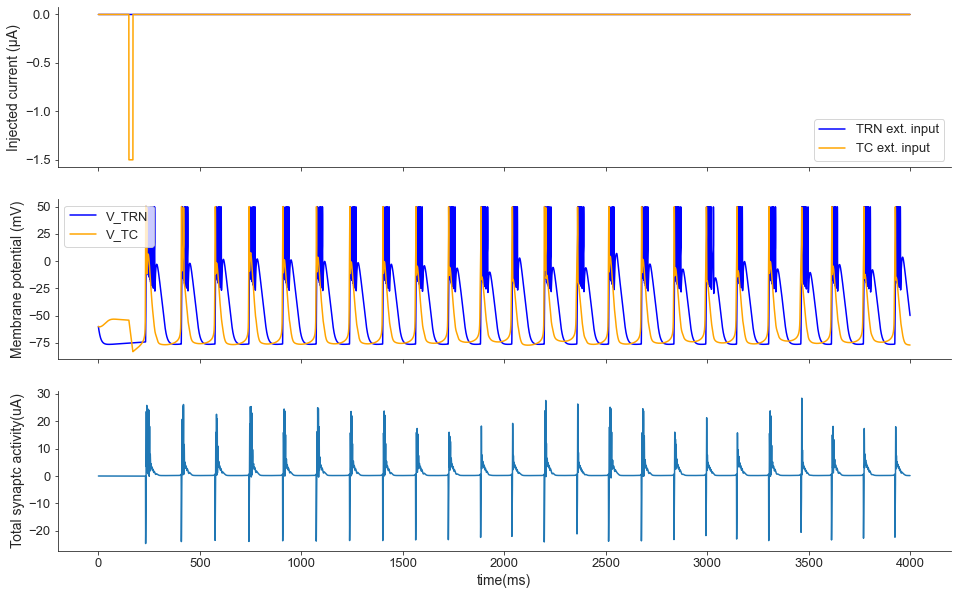

In [13]:
import seaborn as sns
V_TC= TC_variables['Membrane potential (mV)']
V_trn= TRN_variables['Membrane potential (mV)']
I_GABAa= TC_variables['I_GABAa'] 
I_GABAb= TC_variables['I_GABAb'] 
I_AMPA= TRN_variables['I_AMPAmethod1']
I_h=TC_variables['I_h (nA)']

# slow_h= TC_variables['S_H_TC']
# fast_h=TC_variables['F_H_TC']
sns.set_style('ticks') # darkgrid, white grid, dark, white and ticks
sns.despine()  #does not seem to work
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('font', size=12)          # controls default text sizes
sns.color_palette('deep')[0]


plt.subplots(3,1, figsize=(16,10))
plt.subplot(3,1,1)
plt.plot(T, I_TRNinput, label= 'TRN ext. input',c='blue')
plt.legend()
# plt.xlim(0,800)
plt.plot(T, I_TCinput, label= 'TC ext. input',c='orange' )
plt.legend()
# plt.xlim(0,800)
plt.ylabel('Injected current (μA)')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xticks(color='w')
# plt.title(' timely revival of bursts to mimic sppindles - input 155ms for 20 ms and 6s for 20 ms ')
plt.subplot(3,1,2)

plt.plot(T,V_trn, label= 'V_TRN', c='blue')
plt.plot(T, V_TC, label= 'V_TC', c='orange')

plt.ylabel('Membrane potential (mV)')
plt.legend()
# plt.xlim(0,800)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xticks(color='w')

plt.subplot(3,1,3)
plt.plot(T, I_tot_synaptic)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.ylabel('Total synaptc activity(uA)')
plt.xlabel('time(ms)')



# # plt.plot(T,I_GABAa, label= 'I_GABAa', c='red')
# plt.plot(T,s_GABAa, label= 'I_GABAa', c='red')

# plt.ylabel('I_GABAa')
# plt.legend()
# plt.xlim(0,800)
# plt.ylim(-0.5,0.5)
# plt.gca().spines['top'].set_visible(False)
# plt.gca().spines['right'].set_visible(False)
# plt.xticks(color='w')

# plt.subplot(6,1,4)
# plt.plot(T,gabaB, label= 'I_GABAb', c='red')
# plt.legend()
# plt.ylabel('I_GABAb')
# plt.gca().spines['top'].set_visible(False)
# plt.gca().spines['right'].set_visible(False)
# plt.xticks(color='w')

# plt.subplot(6,1,5)
# plt.plot(T,I_h,label='h current', c='orange')
# plt.legend()

# plt.ylabel('I_h')
# plt.gca().spines['top'].set_visible(False)
# plt.gca().spines['right'].set_visible(False)
# plt.xticks(color='w')

# plt.subplot(6,1,6)
# plt.plot(T,s_AMPA, label= 'I_AMPA', c='green')
# plt.legend()
# plt.gca().spines['top'].set_visible(False)
# plt.gca().spines['right'].set_visible(False)
# plt.ylabel('I_AMPA')
# plt.xlabel('time(ms)')

# plt.savefig('TC initiation - two cell circuit spindle characterisation .pdf')

In [14]:
from scipy.fftpack import fftfreq
from numpy.fft import fft, ifft

from scipy import fftpack





## characterise spindle (synaptic activity) using FFT 
trace1= I_tot_synaptic


##fake signal
# f = 10  # Frequency, in cycles per second, or Hertz
# f_s = 100  # Sampling rate, or number of measurements per second
# t = np.linspace(0, 2, 2 * f_s, endpoint=False)
# x = np.sin(f * 2 * np.pi * t)

# fig, ax = plt.subplots()
# ax.plot(t, x)
# ax.set_xlabel('Time [s]')
# ax.set_ylabel('Signal amplitude');
f_s=10**5
x= I_tot_synaptic
x =x-np.mean(x)
X = fftpack.fft(x)
freqs = fftpack.fftfreq(len(x)) * f_s




# fourrier_transform = fft(trace1)
# freq = fftfreq(len(trace1), d=1./len(trace1))
# # freq = fftfreq(len(trace1), d=1./(10**-5))
# plt.plot(freq, fourrier_transform)

# plt.xlim(-100,100)


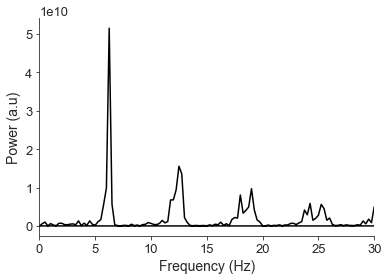

In [15]:


plt.plot(freqs, np.abs(X**2), color='black')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power (a.u)')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xlim(0,30)

plt.savefig('TC initiation - two cell circuit freq spindle characterisation-FFT.pdf')

In [ ]:
from scipy.fftpack import fftfreq
from numpy.fft import fft, ifft

from scipy import fftpack





## characterise spindle (synaptic activity) using FFT 
trace1= I_tot_synaptic


##fake signal
# f = 10  # Frequency, in cycles per second, or Hertz
# f_s = 100  # Sampling rate, or number of measurements per second
# t = np.linspace(0, 2, 2 * f_s, endpoint=False)
# x = np.sin(f * 2 * np.pi * t)

# fig, ax = plt.subplots()
# ax.plot(t, x)
# ax.set_xlabel('Time [s]')
# ax.set_ylabel('Signal amplitude');

# x= I_tot_synaptic
# X = fftpack.fft(x)
# freqs = fftpack.fftfreq(len(x)) * f_s

# fig, ax = plt.subplots()

# ax.stem(freqs, np.abs(X))
# ax.set_xlabel('Frequency in Hertz [Hz]')
# ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')
# ax.set_xlim(-f_s / 2, f_s / 2)


fourrier_transform = fft(trace1)
freq = fftfreq(len(trace1), d=1./len(trace1))
plt.plot(freq, fourrier_transform)






### save the data from two and three cell circuit

# Total_syn_activity= {'two cell':I_tot_synaptic, 'three cell': I_tot_synaptic3 }


# data= pd.DataFrame(Total_syn_activity, columns= ['two cell', 'three cell']) 

# data.to_csv(r'C:\Users\mahal\Thesis_code\oscillations-and-memory\data\spindle_characterisation.csv')



<ipython-input-16-cc7fe2d8b588>:30: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  ax.stem(freqs, np.abs(X))


: 

: 

### Experiment - noise _cortical SO downstate

In [38]:
def inputcurrent(i_mean,u,sigma,t_end,dt):
    # for t =t_max
    
    i=i_mean*(1+sigma*math.sqrt(t_end/dt)*(2*u-1))
    return i

In [15]:

fs1 = 100000 
f1=1
x1 = np.arange(fs1)
# compute the value (amplitude) of the sin wave at the for each sample
y1 = 0.55*np.sin(2*np.pi*f1 * (x1/fs1)) 
sigma= 100e-5  ### choose 30e-6 if you want the noise to be more
bgcurrentIII=2*np.ones(len(T)) 


# for n,t in enumerate(T): # for t =t_max
#     u=random.random()
#     I_bgIII=inputcurrent(2,u,sigma,2000,dt=0.01)

#     bgcurrentIII[n]+=I_bgIII

bgcurrentIII[70000:120000]= y1[50000:100000]  ## sine wave given for 1 seconds 

In [16]:
TRN_variables_SO, TC_variables_SO = connect_TRN_TC(bgcurrentIII, I_TRN= I_TRNinput, T=T, C_m=1, dt=0.01)

<Figure size 432x288 with 0 Axes>

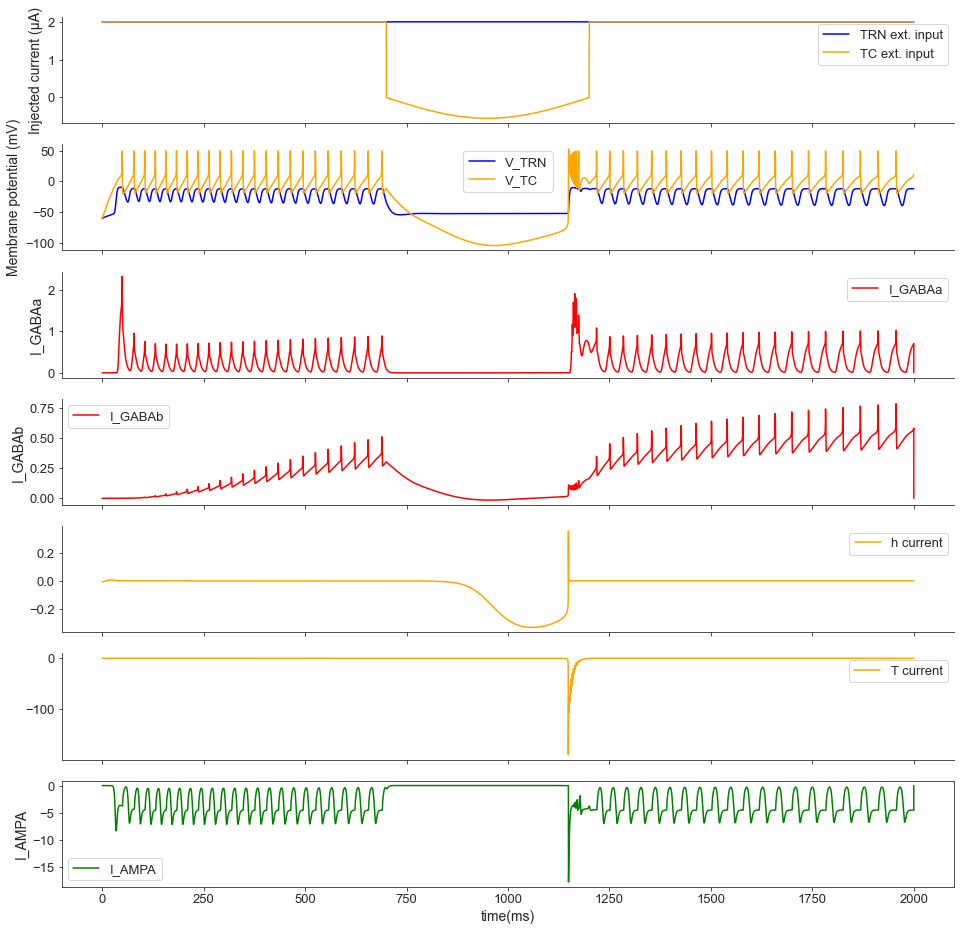

In [17]:
import seaborn as sns
V_TC= TC_variables_SO['Membrane potential (mV)']
V_trn= TRN_variables_SO['Membrane potential (mV)']
I_GABAa= TC_variables_SO['I_GABAa'] 
I_GABAb= TC_variables_SO['I_GABAb'] 
I_AMPA= TRN_variables_SO['I_AMPAmethod1']
I_h=TC_variables_SO['I_h (nA)']
I_T=TC_variables_SO['I_T (nA)']
# slow_h= TC_variables['S_H_TC']
# fast_h=TC_variables['F_H_TC']
sns.set_style('ticks') # darkgrid, white grid, dark, white and ticks
sns.despine()  #does not seem to work
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('font', size=12)          # controls default text sizes
sns.color_palette('deep')[0]


plt.subplots(7,1, figsize=(16,16))
plt.subplot(7,1,1)
plt.plot(T, I_TRNinput, label= 'TRN ext. input',c='blue')
plt.legend()
# plt.xlim(0,800)
plt.plot(T, bgcurrentIII, label= 'TC ext. input',c='orange' )
plt.legend()
# plt.xlim(0,800)
plt.ylabel('Injected current (μA)')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xticks(color='w')
# plt.title(' timely revival of bursts to mimic sppindles - input 155ms for 20 ms and 6s for 20 ms ')
plt.subplot(7,1,2)

plt.plot(T,V_trn, label= 'V_TRN', c='blue')
plt.plot(T, V_TC, label= 'V_TC', c='orange')

plt.ylabel('Membrane potential (mV)')
plt.legend()
# plt.xlim(0,800)
plt.legend()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xticks(color='w')

plt.subplot(7,1,3)
plt.plot(T,I_GABAa, label= 'I_GABAa', c='red')

plt.ylabel('I_GABAa')
plt.legend()
# plt.xlim(0,800)
# plt.ylim(-0.5,0.5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xticks(color='w')

plt.subplot(7,1,4)
plt.plot(T,I_GABAb, label= 'I_GABAb', c='red')
plt.legend()
plt.ylabel('I_GABAb')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xticks(color='w')

plt.subplot(7,1,5)
plt.plot(T,I_h,label='h current', c='orange')
plt.legend()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xticks(color='w')

plt.subplot(7,1,6)
plt.plot(T,I_T,label='T current', c='orange')
plt.legend()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xticks(color='w')


plt.subplot(7,1,7)
plt.plot(T,I_AMPA, label= 'I_AMPA', c='green')
plt.legend()
plt.ylabel('I_AMPA')
plt.xlabel('time(ms)')

plt.savefig('SO downstate in TRN-TC connected without noise + neuromod 2 in both.pdf', bbox_inches = 'tight')

#### WHEN THE EXTERNAL TRIGGER IS GIVEN TO trn: I_TRNinput[15000:17000]=1.5

In [114]:
TRN_variables_TCgT50, TC_variables_gT50 = connect_TRN_TC(I_TCinput, I_TRN= I_TRNinput, T=T, C_m=1, dt=0.01)

In [9]:
TRN_variables_TCgT75, TC_variables_gT75 = connect_TRN_TC(I_TCinput, I_TRN= I_TRNinput, T=T, C_m=1, dt=0.01)

In [12]:
TRN_variables_TCgT1375, TC_variables_gT1375 = connect_TRN_TC(I_TCinput, I_TRN= I_TRNinput, T=T, C_m=1, dt=0.01)

KeyboardInterrupt: 

In [120]:
TRN_variables_TCgT1, TC_variables_gT1 = connect_TRN_TC(I_TCinput, I_TRN= I_TRNinput, T=T, C_m=1, dt=0.01)

In [343]:
TRN_variables_TCgT150, TC_variables_gT150 = connect_TRN_TC(I_TCinput, I_TRN= I_TRNinput, T=T, C_m=1, dt=0.01)

In [340]:
TRN_variables_TCgT2, TC_variables_gT2 = connect_TRN_TC(I_TCinput, I_TRN= I_TRNinput, T=T, C_m=1, dt=0.01)

#### WHEN THE EXTERNAL TRIGGER IS GIVEN TO TC: I_TCinput[15000:17000]=-1.5

In [ ]:
tcTRN_variables_TCgT50, tcTC_variables_gT50 = connect_TRN_TC(I_TCinput, I_TRN= I_TRNinput, T=T, C_m=1, dt=0.01)

In [37]:
tcTRN_variables_TCgT75, tcTC_variables_gT75 = connect_TRN_TC(I_TCinput, I_TRN= I_TRNinput, T=T, C_m=1, dt=0.01)

In [14]:
tcTRN_variables_TCgT1375, tcTC_variables_gT1375 = connect_TRN_TC(I_TCinput, I_TRN= I_TRNinput, T=T, C_m=1, dt=0.01)

In [43]:
tcTRN_variables_TCgT1, tcTC_variables_gT1 = connect_TRN_TC(I_TCinput, I_TRN= I_TRNinput, T=T, C_m=1, dt=0.01)

In [358]:
tcTRN_variables_TCgT150, tcTC_variables_gT150 = connect_TRN_TC(I_TCinput, I_TRN= I_TRNinput, T=T, C_m=1, dt=0.01)

In [300]:
tcTRN_variables_TCgT2=TRN_variables_TCgT2 
tcTC_variables_gT2 =TC_variables_gT2

In [361]:
tcTRN_variables_TCgT2, tcTC_variables_gT2 = connect_TRN_TC(I_TCinput, I_TRN= I_TRNinput, T=T, C_m=1, dt=0.01)

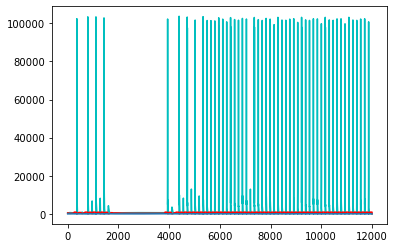

In [64]:
V_TC= TC_variables['Membrane potential (mV)']
tau_h_slow= np.zeros(len(T))
tau_h_fast= np.zeros(len(T))
for i in range(len(T)-1):

    tau_h_slow[i]=tau_H_S(V_TC[i])
    tau_h_fast[i]=tau_H_F(V_TC[i])
plt.plot(T,tau_h_slow, color= 'c')
plt.plot(T,tau_h_fast, color= 'r')
plt.plot(T, V_TC)

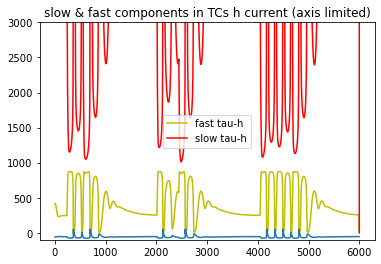

In [33]:
plt.title('slow & fast components in TCs h current (axis limited)')
plt.plot(T,tau_h_fast,color='y', label='fast tau-h')
plt.legend()
plt.plot(T,tau_h_slow, color= 'r', label='slow tau-h')
plt.legend()
plt.ylim(-100,3000)
plt.plot(T, V_TC)

C:\Users\mahal\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


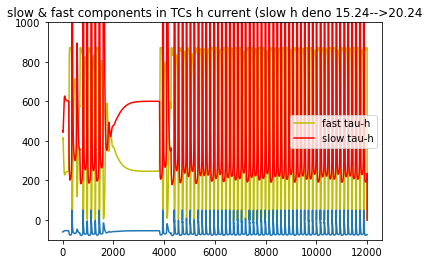

In [67]:
plt.title('slow & fast components in TCs h current (slow h deno 15.24-->20.24')
plt.plot(T,tau_h_fast,color='y', label='fast tau-h')
plt.legend()
plt.plot(T,tau_h_slow, color= 'r', label='slow tau-h')
plt.legend()
plt.ylim(-100,1000)
plt.plot(T, V_TC)

In [106]:
V_TC_with_I_TC= TC_variables['Membrane potential (mV)']
print(V_TC_with_I_TC)

I_GABAA_with_I_TC= TC_variables['I_GABAa'] 
print(I_GABAA_with_I_TC)

I_GABAB_with_I_TC= TC_variables['I_GABAb'] 
print(I_GABAB_with_I_TC)

GABA_sum= I_GABAB_with_I_TC + I_GABAA_with_I_TC
print(np.mean(GABA_sum))

[-60.         -59.99999603 -59.99999205 ...   6.06934862   6.07238931
   6.07543008]
[0.         0.         0.         ... 0.00067135 0.00067194 0.        ]
[0.         0.         0.         ... 0.08722746 0.08723003 0.        ]
0.5530233895463119


In [107]:
'''' Compare GABAa and b values in TC when simulated with and without (wo) external pulse, 
GABAARel gives the relative change value for GABAa'''



V_TC_wo_I_TC= TC_variables_noI['Membrane potential (mV)']
print(V_TC_wo_I_TC)

I_GABAA_wo_I_TC= TC_variables_noI['I_GABAa'] 
print(I_GABAA_wo_I_TC)

I_GABAB_wo_I_TC= TC_variables_noI['I_GABAb'] 
print(I_GABAB_wo_I_TC)

GABAARel=np.mean(I_GABAA_with_I_TC)/np.mean(I_GABAA_wo_I_TC)
print(GABAARel)

GABA_sum_noI= I_GABAB_wo_I_TC + I_GABAA_wo_I_TC
print(np.mean(GABA_sum_noI))


[-60.         -59.99999603 -59.99999205 ... -44.14017212 -44.1401721
 -44.14017209]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
inf
0.0


<ipython-input-107-27e92b2216c6>:15: RuntimeWarning: divide by zero encountered in double_scalars
  GABAARel=np.mean(I_GABAA_with_I_TC)/np.mean(I_GABAA_wo_I_TC)


In [103]:
''' note: calculate this relative value for r in GABAb'''

r_GABAb_with_I_TC= TC_variables['state_variable_GABAb'] 
print(r_GABAb_with_I_TC)

r_GABAb_wo_I_TC= TC_variables_noI['state_variable_GABAb'] 
print(r_GABAb_wo_I_TC)

r_GABAbRel=np.mean(r_GABAb_with_I_TC)/np.mean(r_GABAb_wo_I_TC)
inverse= np.mean(r_GABAb_wo_I_TC)/np.mean(r_GABAb_with_I_TC) 
print(inverse)

[0.         0.         0.         ... 0.91785925 0.91785815 0.91785705]
[0. 0. 0. ... 0. 0. 0.]
0.0


<ipython-input-103-3bf0037d3f1e>:7: RuntimeWarning: divide by zero encountered in double_scalars
  r_GABAbRel=np.mean(r_GABAb_with_I_TC)/np.mean(r_GABAb_wo_I_TC)


<ipython-input-49-b7e00fbb1df7>:12: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(' a- synaptic current GABAb and state variables with V_TC.pdf')
<ipython-input-49-b7e00fbb1df7>:12: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(' a- synaptic current GABAb and state variables with V_TC.pdf')
C:\Users\mahal\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


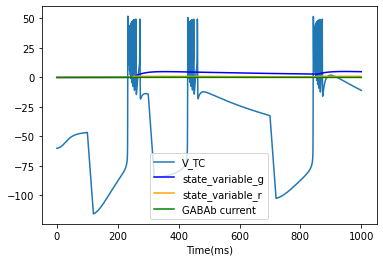

In [49]:

I_GABAb= TC_variables['I_GABAb']
g= TC_variables['varaiable_GABAb']
r= TC_variables['state_variable_GABAb']
# plt.subplot(2,1,2)
plt.plot(T,V_TC, label= 'V_TC')
plt.plot(T,g, label= 'state_variable_g', c='blue')
plt.plot(T,r, label= 'state_variable_r', c= 'orange')
plt.plot(T,I_GABAb, label= 'GABAb current', c= 'green')
plt.legend()
plt.xlabel('Time(ms)')
plt.savefig(' a- synaptic current GABAb and state variables with V_TC.pdf')


<Figure size 432x288 with 0 Axes>

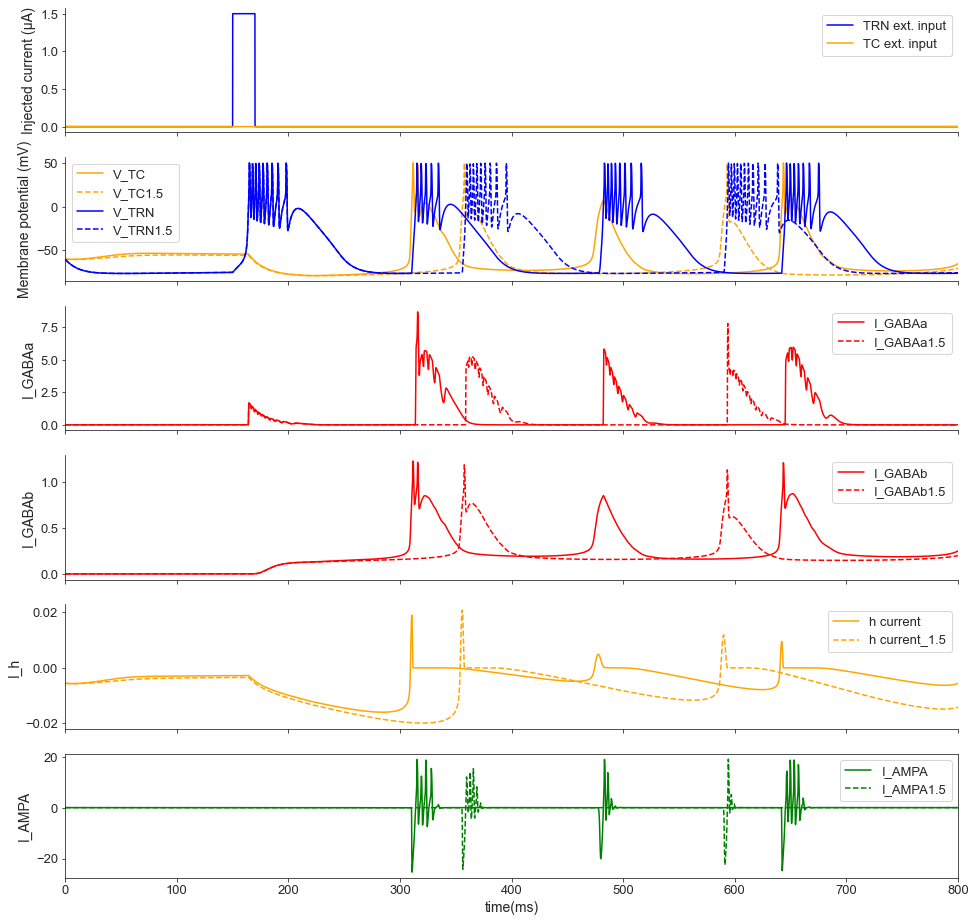

In [132]:
import seaborn as sns

V_TC_150= TC_variables_gT150['Membrane potential (mV)']
V_trn_150= TRN_variables_TCgT150['Membrane potential (mV)']
I_GABAa_150= TC_variables_gT150['I_GABAa'] 
I_GABAb_150= TC_variables_gT150['I_GABAb'] 
I_AMPA_150= TRN_variables_TCgT150['I_AMPAmethod1']
I_h_150=TC_variables_gT150['I_h (nA)']

V_TC= TC_variables_gT2['Membrane potential (mV)']
V_trn= TRN_variables_TCgT2['Membrane potential (mV)']
I_GABAa= TC_variables_gT2['I_GABAa'] 
I_GABAb= TC_variables_gT2['I_GABAb'] 
I_AMPA= TRN_variables_TCgT2['I_AMPAmethod1']
I_h=TC_variables_gT2['I_h (nA)']
# slow_h= TC_variables['S_H_TC']
# fast_h=TC_variables['F_H_TC']
sns.set_style('ticks') # darkgrid, white grid, dark, white and ticks
sns.despine()  #does not seem to work
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('font', size=12)          # controls default text sizes
sns.color_palette('deep')[0]


plt.subplots(6,1, figsize=(16,16))
plt.subplot(6,1,1)
plt.plot(T, I_TRNinput, label= 'TRN ext. input',c='blue')
plt.legend()
plt.xlim(0,800)
plt.plot(T, I_TCinput, label= 'TC ext. input',c='orange' )
plt.legend()
plt.xlim(0,800)
plt.ylabel('Injected current (μA)')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xticks(color='w')
# plt.title(' timely revival of bursts to mimic sppindles - input 155ms for 20 ms and 6s for 20 ms ')
plt.subplot(6,1,2)
plt.plot(T,V_TC, label= 'V_TC', c='orange')
plt.plot(T,V_TC_150, label= 'V_TC1.5', c='orange' , linestyle='dashed')
plt.ylabel('Membrane potential (mV)')
plt.legend()
plt.xlim(0,800)
plt.plot(T,V_trn, label= 'V_TRN', c='blue')
plt.plot(T,V_trn_150, label= 'V_TRN1.5', c='blue', linestyle='dashed')
plt.legend()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xticks(color='w')

plt.subplot(6,1,3)
plt.plot(T,I_GABAa, label= 'I_GABAa', c='red')
plt.plot(T,I_GABAa_150, label= 'I_GABAa1.5', c='red' , linestyle='dashed')
plt.ylabel('I_GABAa')
plt.legend()
plt.xlim(0,800)
# plt.ylim(-0.5,0.5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xticks(color='w')

plt.subplot(6,1,4)
plt.plot(T,I_GABAb, label= 'I_GABAb', c='red')
plt.plot(T,I_GABAb_150, label= 'I_GABAb1.5', c='red', linestyle='dashed')
plt.legend()
plt.xlim(0,800)
# plt.ylim(-0.5,0.5)
plt.ylabel('I_GABAb')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xticks(color='w')

plt.subplot(6,1,5)
plt.plot(T,I_h,label='h current', c='orange')
plt.plot(T,I_h_150,label='h current_1.5', c='orange', linestyle='dashed')
plt.legend()
plt.xlim(0,800)
plt.ylabel('I_h')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xticks(color='w')
# plt.plot(T,slow_h,label='slow component h current', c='orange')
# plt.legend()
# plt.ylabel('slow_h')
# plt.subplot(7,1,6)
# plt.plot(T,fast_h,label='fast component h current', c='orange')
# plt.legend()
# plt.ylabel('fast_h')
plt.subplot(6,1,6)
plt.plot(T,I_AMPA, label= 'I_AMPA', c='green')
plt.plot(T,I_AMPA_150, label= 'I_AMPA1.5', c='green', linestyle='dashed')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend()
plt.xlim(0,800)
# plt.ylim(-0.5,0.5)
plt.ylabel('I_AMPA')
plt.xlabel('time(ms)')

plt.savefig(' ext input TC- Regime 1 TRN - Tc conencted gLmax =0.1, gGABAb=0.01, AMPA=0.4 and GABAa=0.069, gT of TC 2 and 1.5 resp .pdf')


<ipython-input-336-4c970137350b>:142: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(' ext input TC- Regime 1 TRN - Tc conencted gLmax =0.1, gGABAb=0.01, AMPA=0.4 and GABAa=0.069, gT TC - 1.5 and 2.pdf')
<ipython-input-336-4c970137350b>:142: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(' ext input TC- Regime 1 TRN - Tc conencted gLmax =0.1, gGABAb=0.01, AMPA=0.4 and GABAa=0.069, gT TC - 1.5 and 2.pdf')


<Figure size 432x288 with 0 Axes>

c:\Users\mahal\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


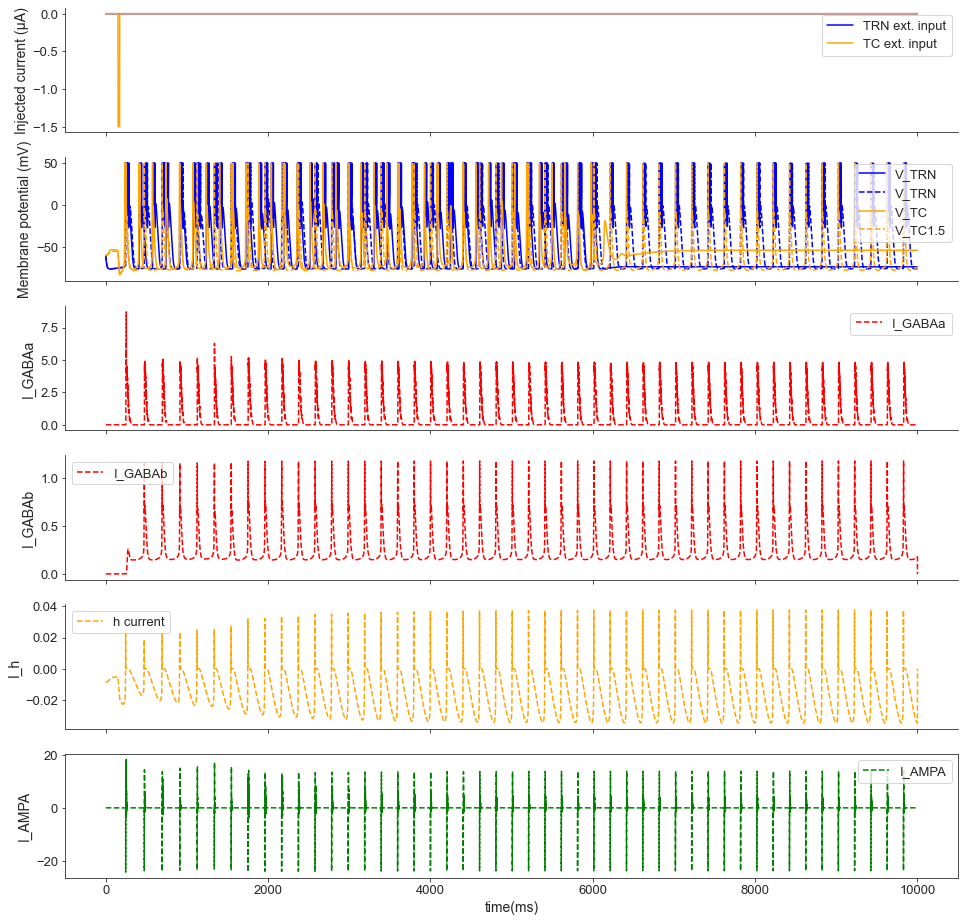

In [336]:
import seaborn as sns


# tcV_TC_150= tcTC_variables_gT150['Membrane potential (mV)']
# tcV_trn_150= tcTRN_variables_TCgT150['Membrane potential (mV)']
# tcI_GABAa_150= tcTC_variables_gT150['I_GABAa'] 
# tcI_GABAb_150= tcTC_variables_gT150['I_GABAb'] 
# tcI_AMPA_150= tcTRN_variables_TCgT150['I_AMPAmethod1']
# tcI_h_150=tcTC_variables_gT150['I_h (nA)']


# tcV_TC_75= tcTC_variables_gT75['Membrane potential (mV)']
# tcV_trn_75= tcTRN_variables_TCgT75['Membrane potential (mV)']
# tcI_GABAa_75= tcTC_variables_gT75['I_GABAa'] 
# tcI_GABAb_75= tcTC_variables_gT75['I_GABAb'] 
# tcI_AMPA_75= tcTRN_variables_TCgT75['I_AMPAmethod1']
# tcI_h_75=tcTC_variables_gT75['I_h (nA)']



# tcV_TC_1= tcTC_variables_gT1['Membrane potential (mV)']
# tcV_trn_1= tcTRN_variables_TCgT1['Membrane potential (mV)']
# tcI_GABAa_1= tcTC_variables_gT1['I_GABAa'] 
# tcI_GABAb_1= tcTC_variables_gT1['I_GABAb'] 
# tcI_AMPA_1= tcTRN_variables_TCgT1['I_AMPAmethod1']
# tcI_h_1=tcTC_variables_gT1['I_h (nA)']

# tcV_TC_1375= tcTC_variables_gT1375['Membrane potential (mV)']
# tcV_trn_1375= tcTRN_variables_TCgT1375['Membrane potential (mV)']
# tcI_GABAa_1375= tcTC_variables_gT1375['I_GABAa'] 
# tcI_GABAb_1375= tcTC_variables_gT1375['I_GABAb'] 
# tcI_AMPA_1375= tcTRN_variables_TCgT1375['I_AMPAmethod1']
# tcI_h_1375=tcTC_variables_gT1375['I_h (nA)']

tcV_TC_150= tcTC_variables_gT150['Membrane potential (mV)']
tcV_trn_150= tcTRN_variables_TCgT150['Membrane potential (mV)']
tcI_GABAa_150= tcTC_variables_gT150['I_GABAa'] 
tcI_GABAb_150= tcTC_variables_gT150['I_GABAb'] 
tcI_AMPA_150= tcTRN_variables_TCgT150['I_AMPAmethod1']
tcI_h_150=tcTC_variables_gT150['I_h (nA)']

tcV_TC= tcTC_variables_gT2['Membrane potential (mV)']
tcV_trn= tcTRN_variables_TCgT2['Membrane potential (mV)']
tcI_GABAa= tcTC_variables_gT2['I_GABAa'] 
tcI_GABAb= tcTC_variables_gT2['I_GABAb'] 
tcI_AMPA= tcTRN_variables_TCgT2['I_AMPAmethod1']
tcI_h=tcTC_variables_gT2['I_h (nA)']
# slow_h= TC_variables['S_H_TC']
# fast_h=TC_variables['F_H_TC']
sns.set_style('ticks') # darkgrid, white grid, dark, white and ticks
sns.despine()  #does not seem to work
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('font', size=12)          # controls default text sizes
sns.color_palette('deep')[0]


plt.subplots(6,1, figsize=(16,16))
plt.subplot(6,1,1)
plt.plot(T, I_TRNinput, label= 'TRN ext. input',c='blue')
plt.legend()
# plt.xlim(0,800)
plt.plot(T, I_TCinput, label= 'TC ext. input',c='orange' )
plt.legend()
# plt.xlim(0,800)
plt.ylabel('Injected current (μA)')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xticks(color='w')
# plt.title(' timely revival of bursts to mimic sppindles - input 155ms for 20 ms and 6s for 20 ms ')
plt.subplot(6,1,2)

plt.plot(T,tcV_trn, label= 'V_TRN', c='blue')
plt.plot(T,tcV_trn_150, label= 'V_TRN', c='blue', linestyle='dashed')
# plt.plot(T,tcV_trn_1, label= 'V_TRN', c='blue', linestyle='-.')
plt.plot(T, tcV_TC, label= 'V_TC', c='orange')
plt.plot(T,tcV_TC_150, label= 'V_TC1.5', c='orange' , linestyle='dashed')
# plt.plot(T,tcV_TC_1, label= 'V_TC1', c='orange' , linestyle='-.')
# plt.plot(T,tcV_TC_150, label= 'V_TC1.5', c='orange' , linestyle='dashed')
plt.ylabel('Membrane potential (mV)')
plt.legend()
# plt.xlim(0,800)
plt.legend()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xticks(color='w')

plt.subplot(6,1,3)
# plt.plot(T,tcI_GABAa, label= 'I_GABAa', c='red')
plt.plot(T,tcI_GABAa_150, label= 'I_GABAa', c='red' , linestyle='dashed')
# plt.plot(T,tcI_GABAa_1, label= 'I_GABAa0.75', c='red' , linestyle='-.')
plt.ylabel('I_GABAa')
plt.legend()
# plt.xlim(0,800)
# plt.ylim(-0.5,0.5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xticks(color='w')

plt.subplot(6,1,4)
# plt.plot(T,tcI_GABAb, label= 'I_GABAb', c='red')
plt.plot(T,tcI_GABAb_150, label= 'I_GABAb', c='red', linestyle='dashed')
# plt.plot(T,tcI_GABAb_1, label= 'I_GABAb0.75', c='red', linestyle='-.')
plt.legend()
# plt.xlim(0,800)
# plt.ylim(-0.5,0.5)
plt.ylabel('I_GABAb')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xticks(color='w')

plt.subplot(6,1,5)
# plt.plot(T,tcI_h,label='h current', c='orange')
plt.plot(T,tcI_h_150,label='h current', c='orange', linestyle='dashed')
# plt.plot(T,tcI_h_1,label='h current_0.75', c='orange',linestyle='-.')
plt.legend()
# plt.xlim(0,800)
plt.ylabel('I_h')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xticks(color='w')
# plt.plot(T,slow_h,label='slow component h current', c='orange')
# plt.legend()
# plt.ylabel('slow_h')
# plt.subplot(7,1,6)
# plt.plot(T,fast_h,label='fast component h current', c='orange')
# plt.legend()
# plt.ylabel('fast_h')
plt.subplot(6,1,6)
# plt.plot(T,tcI_AMPA, label= 'I_AMPA', c='green')
plt.plot(T,tcI_AMPA_150, label= 'I_AMPA', c='green', linestyle='dashed')
# plt.plot(T,tcI_AMPA_1, label= 'I_AMPA0.75', c='green', linestyle='-.')
plt.legend()
# plt.xlim(0,800)
# plt.ylim(-0.5,0.5)
plt.ylabel('I_AMPA')
plt.xlabel('time(ms)')

# plt.savefig(' ext input TC- Regime 1 TRN - Tc conencted gLmax =0.1, gGABAb=0.01, AMPA=0.4 and GABAa=0.069, gT TC - 1.5 and 2.pdf')


##### LFP- how can we calculate or plot LFP using spikes or membrane potential dynamics? - one of the many ideas- plot the sum of all currents 

In [362]:
I_total_TC_wsyn150= tcTC_variables_gT150['I_tot_TC_wsyn'] 
I_syn_TC150= tcTC_variables_gT150['I_syn_TC'] 

I_total_TRN_wsyn150= tcTRN_variables_TCgT150['I_tot_TRN_wsyn'] 
I_syn_TRN150= tcTRN_variables_TCgT150['I_syn_TRN'] 

tcV_TC150= tcTC_variables_gT150['Membrane potential (mV)']
tcV_trn150= tcTRN_variables_TCgT150['Membrane potential (mV)']


I_syn_TC_TRN150=I_syn_TRN150+I_syn_TC150

Text(0.5, 0, 'Time (ms)')

<Figure size 432x288 with 0 Axes>

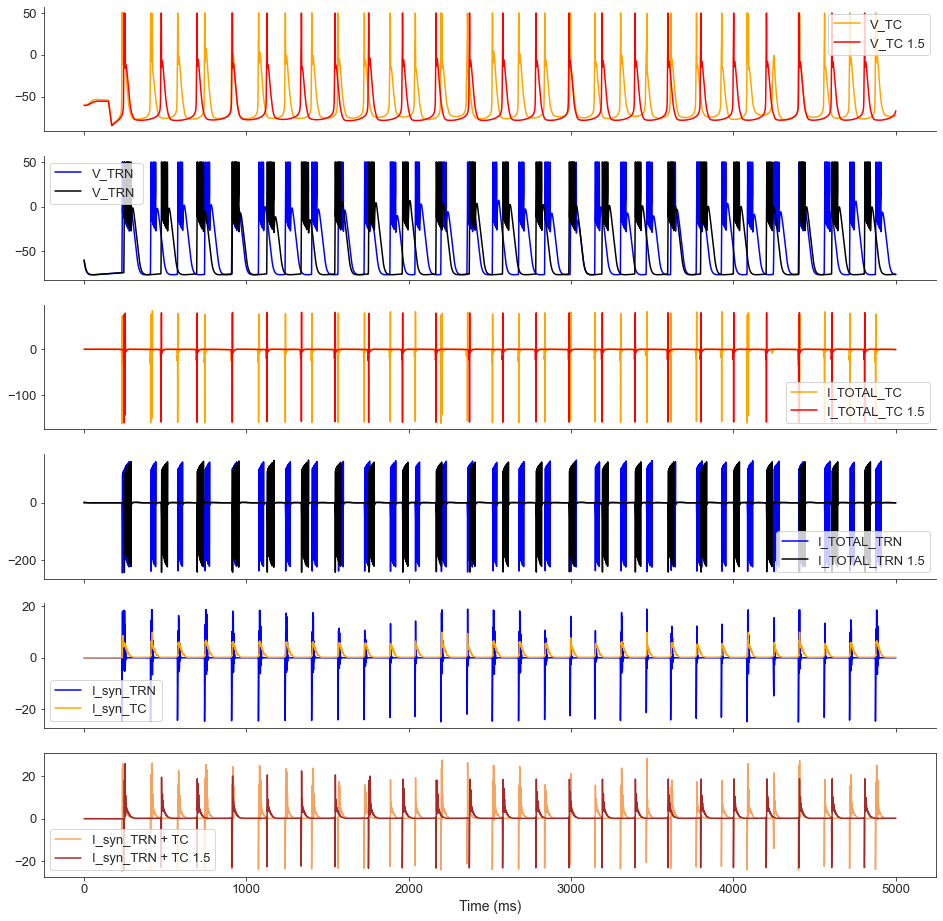

In [363]:
import seaborn as sns

I_total_TC_wsyn= tcTC_variables_gT2['I_tot_TC_wsyn'] 
I_syn_TC= tcTC_variables_gT2['I_syn_TC'] 

I_total_TRN_wsyn= tcTRN_variables_TCgT2['I_tot_TRN_wsyn'] 
I_syn_TRN= tcTRN_variables_TCgT2['I_syn_TRN'] 

tcV_TC= tcTC_variables_gT2['Membrane potential (mV)']
tcV_trn= tcTRN_variables_TCgT2['Membrane potential (mV)']


I_syn_TC_TRN=I_syn_TRN+I_syn_TC

sns.set_style('ticks') # darkgrid, white grid, dark, white and ticks
sns.despine()  #does not seem to work
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('font', size=12)          # controls default text sizes
sns.color_palette('deep')[0]
plt.subplots(6,1, figsize=(16,16))
plt.subplot(6,1,1)
plt.plot(T, tcV_TC, label= 'V_TC', c='orange')
plt.plot(T, tcV_TC150, label= 'V_TC 1.5', c='red')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xticks(color='w')
# plt.xlim(0,5000)
plt.legend()

plt.subplot(6,1,2)
plt.plot(T,tcV_trn, label= 'V_TRN', c='blue')
plt.plot(T,tcV_trn150, label= 'V_TRN ', c='black')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xticks(color='w')
# plt.xlim(0,5000)
plt.legend()

plt.subplot(6,1,3)
plt.plot(T, I_total_TC_wsyn, label= 'I_TOTAL_TC', c='orange')
plt.plot(T, I_total_TC_wsyn150, label= 'I_TOTAL_TC 1.5', c='red')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xticks(color='w')
# plt.xlim(0,5000)
plt.legend()

plt.subplot(6,1,4)
plt.plot(T, I_total_TRN_wsyn, label= 'I_TOTAL_TRN', c='blue')
plt.plot(T, I_total_TRN_wsyn150, label= 'I_TOTAL_TRN 1.5', c='black')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xticks(color='w')
# plt.xlim(0,5000)
plt.legend()

plt.subplot(6,1,5)

plt.plot(T, I_syn_TRN, label= 'I_syn_TRN', c='blue')
plt.plot(T, I_syn_TC, label= 'I_syn_TC', c='orange')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xticks(color='w')
# plt.xlim(0,5000)
plt.legend()


plt.subplot(6,1,6)
plt.plot(T, I_syn_TC_TRN, label= 'I_syn_TRN + TC', c='#F4A460')
plt.plot(T, I_syn_TC_TRN150, label= 'I_syn_TRN + TC 1.5', c='brown')
# plt.xlim(0,5000)
plt.legend()

plt.xlabel('Time (ms)')
# plt.savefig(' 5. 10s long sum of all currents gT TC2 .pdf')

In [481]:
spike_train0, spike_time0= generatespikes(V_pre= tcV_trn, V_th=25, T =T, dt=0.01)

spike_train1, spike_time1= generatespikes(V_pre=tcV_TC, V_th=25, T =T, dt=0.01)

spike_train2, spike_time2= generatespikes(V_pre=tcV_trn150, V_th=25, T =T, dt=0.01)

spike_train3, spike_time3= generatespikes(V_pre=tcV_TC150, V_th=25, T =T, dt=0.01)


# latency to first burst

lat_to_spike0= spike_time0[0]
lat_to_spike1= spike_time1[0]
lat_to_spike2= spike_time2[0]
lat_to_spike3= spike_time3[0]


print(lat_to_spike0,lat_to_spike1,lat_to_spike2,lat_to_spike3)

lat_to_burst=[]
lat_to_burst=np.append(lat_to_spike0, lat_to_spike1)
lat_to_burst=np.append(lat_to_burst, lat_to_spike2)
lat_to_burst=np.append(lat_to_burst, lat_to_spike3)

latency_burst_gT= {'Latency to burst (ms)':lat_to_burst, '': tagsk }

data_lat_burst_gT= pd.DataFrame(latency_burst_gT, columns= ['Latency to burst (ms)', '']) 
print(data_lat_burst_gT)

isi_0=[]
isi_1=[]
isi_2=[]
isi_3=[]
# isi_4=[]


isi_0 = np.diff(spike_time0)
isi_1 = np.diff(spike_time1)
isi_2 = np.diff(spike_time2)
isi_3 = np.diff(spike_time3)




# isi_4 = np.diff(spike_time4)
idx0 = np.where(isi_0>100)
ibi_0 = isi_0[idx0]
print(idx0)
id0=np.where(isi_0<100)
isi_0=isi_0[id0]

idx1 = np.where(isi_1>100)
ibi_1 = isi_1[idx1]
print(idx1)
id1=np.where(isi_1<100)
isi_1=isi_1[id1]

idx2 = np.where(isi_2>100)
ibi_2 = isi_2[idx2]
print(idx2)
id2=np.where(isi_2<100)
isi_2=isi_2[id2]

idx3 = np.where(isi_3>100)
ibi_3 = isi_3[idx3]
print(idx3)
id3=np.where(isi_3<100)
isi_3=isi_3[id3]
# idx3 = np.where(isi_3>250)
# ibi_3 = isi_3[idx3]
# idx4 = np.where(isi_4>250)
# ibi_4 = isi_4[idx4]
# id4=np.where(isi_4<250)
# isi_4=isi_4[id4]
print(ibi_0)
print(ibi_1)
print(ibi_2)
print(ibi_3)
# print(ibi_4)

[]
[]
[]
[]
235.59 233.23000000000002 247.55 245.45000000000002
   Latency to burst (ms)             
0                 235.59  TRN-control
1                 233.23   TC-control
2                 247.55     TRN-test
3                 245.45      TC-test
(array([ 11,  18,  25,  32,  39,  46,  53,  60,  67,  74,  81,  87,  94,
       101, 107, 114, 121, 128, 134, 141, 148, 154, 161, 167, 174, 181,
       187, 194, 200], dtype=int64),)
(array([ 1,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 28, 30, 31, 32], dtype=int64),)
(array([ 11,  21,  31,  41,  51,  61,  70,  79,  88,  97, 106, 115, 124,
       133, 142, 151, 160, 169, 178, 187, 196, 205], dtype=int64),)
(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22], dtype=int64),)
[135.74 138.78 140.62 140.37 138.97 137.63 136.1  134.59 132.69 130.06
 123.7  136.55 132.46 126.93 139.47 133.07 127.94 118.45 134.21 129.71
 119.81 132.72 125

In [4]:
import pandas as pd
lat_to_burst=[]
lat_to_burst=np.append(235.59-170, 233.23-170)
lat_to_burst=np.append(lat_to_burst, 247.55-170)
lat_to_burst=np.append(lat_to_burst, 245.45-170)

tagsk=[]
tag1=['TRN-control']
tag2=['TC-control']
tag3=['TRN-test']
tag4=['TC-test']

tagsk=np.append(tag1, tag2)
tagsk=np.append(tagsk, tag3)
tagsk=np.append(tagsk, tag4)



latency_burst_gT= {'Latency to burst (ms)':lat_to_burst, '': tagsk }

data_lat_burst_gT= pd.DataFrame(latency_burst_gT, columns= ['Latency to burst (ms)', '']) 
print(data_lat_burst_gT)

   Latency to burst (ms)             
0                  65.59  TRN-control
1                  63.23   TC-control
2                  77.55     TRN-test
3                  75.45      TC-test


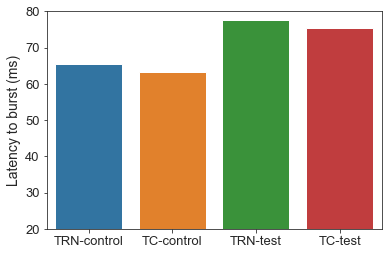

In [7]:
## plot latency to burst

sns.barplot( x = '', y = 'Latency to burst (ms)',
              data = data_lat_burst_gT)
              
sns.set_style('ticks') # darkgrid, white grid, dark, white and ticks
# sns.despine()  #does not seem to work
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels

plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('font', size=12)          # controls default text sizes
sns.color_palette('deep')[0]
plt.ylim(20,80)

plt.savefig('3. effect of gT-TC values on laetncy of first per burst in TRN and TC.pdf')

In [450]:
## number of spikes per burst

nspk_burst0=[]

nspk_burst1=[]

nspk_burst2=[]

nspk_burst3=[]


nspk_burst0= np.diff(idx0)

nspk_burst1= np.diff(idx1)

nspk_burst2= np.diff(idx2)

nspk_burst3= np.diff(idx3)

print(type(nspk_burst0))

print(np.size(nspk_burst0))
print(nspk_burst1)
print(nspk_burst2)
print(nspk_burst3)

<class 'numpy.ndarray'>
28
[[2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1]]
[[10 10 10 10 10  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9]]
[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]]


In [455]:
nspk_values=[]

nspk_values=np.append(nspk_burst0, nspk_burst1)
nspk_values=np.append(nspk_values, nspk_burst2)
nspk_values=np.append(nspk_values, nspk_burst3)



nspk_tags=[]
tagsk=[]
tag1=['TRN-control']
tag2=['TC-control']
tag3=['TRN-test']
tag4=['TC-test']

tagsk=np.append(tag1, tag2)
tagsk=np.append(tagsk, tag3)
tagsk=np.append(tagsk, tag4)

l5= [np.size(nspk_burst0), np.size(nspk_burst1), np.size(nspk_burst2), np.size(nspk_burst3)]
print(l5)

j=0
i=0

for j in range(len(tagsk)):
        for i in range(l5[j]):
                nspk_tags+= [tagsk[j]]
        
print(len(nspk_tags))
nspk_burst_gT= {'Number of spikes per burst':nspk_values, 'gTmax TC (mS/cm2)': nspk_tags }
print(nspk_burst_gT)

data_nspk_gT= pd.DataFrame(nspk_burst_gT, columns= ['Number of spikes per burst', 'gTmax TC (mS/cm2)']) 
data_nspk_gT

[28, 27, 21, 21]
97
{'Number of spikes per burst': array([ 7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  6,  7,  7,  6,  7,  7,  7,
        6,  7,  7,  6,  7,  6,  7,  7,  6,  7,  6,  2,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        2,  2,  1,  1, 10, 10, 10, 10, 10,  9,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1], dtype=int64), 'gTmax TC (mS/cm2)': ['TRN-control', 'TRN-control', 'TRN-control', 'TRN-control', 'TRN-control', 'TRN-control', 'TRN-control', 'TRN-control', 'TRN-control', 'TRN-control', 'TRN-control', 'TRN-control', 'TRN-control', 'TRN-control', 'TRN-control', 'TRN-control', 'TRN-control', 'TRN-control', 'TRN-control', 'TRN-control', 'TRN-control', 'TRN-control', 'TRN-control', 'TRN-control', 'TRN-control', 'TRN-control', 'TRN-control', 'TRN-control', 'TC-control', 'TC-control', 'TC-control', 'TC-control', 'TC-co

,Number of spikes per burst,gTmax TC (mS/cm2)
0,7,TRN-control
1,7,TRN-control
2,7,TRN-control
3,7,TRN-control
4,7,TRN-control
...,...,...
92,1,TC-test
93,1,TC-test
94,1,TC-test
95,1,TC-test


[6.75       1.14814815 9.23809524 1.        ]
   Average spikes per burst             
0                  6.750000  TRN-control
1                  1.148148   TC-control
2                  9.238095     TRN-test
3                  1.000000      TC-test


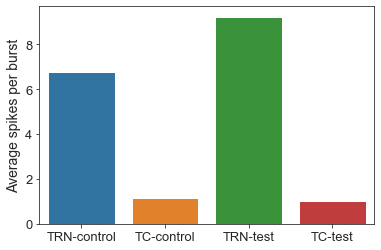

In [479]:
mean_nspk_burst0= np.mean(nspk_burst0)
mean_nspk_burst1= np.mean(nspk_burst1)
mean_nspk_burst2= np.mean(nspk_burst2)
mean_nspk_burst3= np.mean(nspk_burst3)

avg_nspk_values=[]
avg_nspk_values=np.append(mean_nspk_burst0, mean_nspk_burst1)
avg_nspk_values=np.append(avg_nspk_values, mean_nspk_burst2)
avg_nspk_values=np.append(avg_nspk_values, mean_nspk_burst3)

print(avg_nspk_values)

mean_nspk_burst_gT= {'Average spikes per burst':avg_nspk_values, '': tagsk }

data_avg_nspk_gT= pd.DataFrame(mean_nspk_burst_gT, columns= ['Average spikes per burst', '']) 
print(data_avg_nspk_gT)

sns.barplot( x = '', y = 'Average spikes per burst',
              data = data_avg_nspk_gT)
              
sns.set_style('ticks') # darkgrid, white grid, dark, white and ticks
# sns.despine()  #does not seem to work
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels

plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('font', size=12)          # controls default text sizes
sns.color_palette('deep')[0]

plt.savefig(' effect of gT-TC values on number of spikes per burst in TRN and TC.pdf')

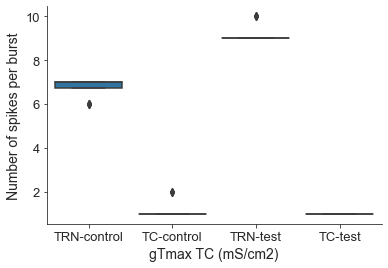

In [460]:
sns.boxplot( x = 'gTmax TC (mS/cm2)', y = 'Number of spikes per burst',
              data = data_nspk_gT)

sns.despine()

In [371]:
# inter synaptic total interval / 'LFP'

gTtestibi=[]
gTcontrolibi=[]

gTtestibi= (ibi_2 + ibi_3)/2

gTcontrolibi= (ibi_0[0:28] +ibi_1)/2

In [372]:
gTtestibi


array([205.755, 202.22 , 199.26 , 194.925, 191.57 , 187.035, 191.515,
       192.945, 191.24 , 190.62 , 189.325, 188.75 , 187.98 , 187.505,
       186.995, 186.64 , 186.275, 186.005, 185.75 , 185.545, 185.36 ,
       185.21 ])

In [373]:
gTcontrolibi

array([153.83 , 147.585, 153.62 , 153.485, 152.12 , 151.08 , 149.695,
       148.515, 146.815, 144.845, 139.085, 147.375, 144.575, 140.47 ,
       150.6  , 147.015, 143.11 , 134.555, 145.98 , 145.47 , 134.1  ,
       145.325, 140.22 , 146.275, 221.495, 139.215, 145.325, 143.18 ])

In [429]:
isyni_values=[]
isyni_values= np.append(gTcontrolibi, gTtestibi)
print(len(isyni_values))

isyni_tags=[]
tags_=[]
tag1=['2.0']
tag2=['1.5']

tags_=np.append(tag1, tag2)

l3= [len(gTcontrolibi), len(gTtestibi)]

for j in range(len(tags_)):
        for i in range(l3[j]):
                isyni_tags+= [tags_[j]]
        
print(isyni_tags)
inter_syn_interval_gT= {'Inter syn interval (ms)':isyni_values, 'gTmax TC (mS/cm2)': isyni_tags }
# print(inter_syn_interval_gT)

data_isyni= pd.DataFrame(inter_syn_interval_gT, columns= ['gTmax TC (mS/cm2)', 'Inter syn interval (ms)']) 
data_isyni
data_isyni = data_isyni.drop(24)

50
['2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '1.5', '1.5', '1.5', '1.5', '1.5', '1.5', '1.5', '1.5', '1.5', '1.5', '1.5', '1.5', '1.5', '1.5', '1.5', '1.5', '1.5', '1.5', '1.5', '1.5', '1.5', '1.5']


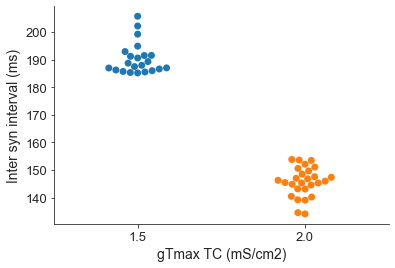

In [435]:
sns.swarmplot( x = 'gTmax TC (mS/cm2)', y = 'Inter syn interval (ms)',
              data = data_isyni, size=7)

sns.despine()

plt.savefig(' 2.effect of gT-TC values on inter synaptic current interval .pdf')

In [424]:
import pandas as pd
## EFFICIENT method

isi_values= np.append(isi_0, isi_1)
isi_values=np.append(isi_values, isi_2)
isi_values=np.append(isi_values, isi_3)
isi_values

ibi_values= np.append(ibi_0, ibi_1)
ibi_values=np.append(ibi_values, ibi_2)
ibi_values=np.append(ibi_values, ibi_3)
ibi_values

tag1=['2']
tag2=['2']
tag3=['1.5']
tag4=['1.5']

isi_tags=[]
q=""
tags=[]
tags=np.append(tag1,tag2)
tags=np.append(tags, tag3)
tags=np.append(tags, tag4)
tags

l1=[len(isi_0), len(isi_1), len(isi_2),len(isi_3)]
# print(len(isi_0))
for j in range(len(tags)):
        for i in range(l1[j]):
                isi_tags+= [tags[j]]
        
isi_tags
i=0
j=0
ibi_tags=[]
l2=[len(ibi_0), len(ibi_1), len(ibi_2), len(ibi_3)]
# print(len(isi_0))
for j in range(len(tags)):
        for i in range(l2[j]):
                ibi_tags+= [tags[j]]
ibi_tags

# inter_spike_interval_gT= {'Inter spike interval (ms)':isi_values, 'gTmax TC (mS/cm2)': isi_tags }
inter_burst_interval_gT={'Inter burst interval (ms)':ibi_values, 'gTmax TC (mS/cm2)': ibi_tags }

inter_burst_interval_gT
# ## save this data


# data_isi= pd.DataFrame(inter_spike_interval_gT, columns= ['Inter spike interval (ms)', 'gTmax TC (mS/cm2)']) 
# data_isi

data_ibi= pd.DataFrame(inter_burst_interval_gT, columns= ['Inter burst interval (ms)', 'gTmax TC (mS/cm2)']) 
data_ibi


,Inter burst interval (ms),gTmax TC (mS/cm2)
0,135.74,2
1,138.78,2
2,140.62,2
3,140.37,2
4,138.97,2
...,...,...
96,202.16,1.5
97,201.94,1.5
98,201.76,1.5
99,201.60,1.5


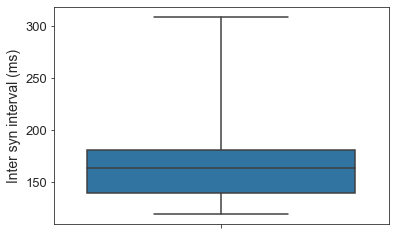

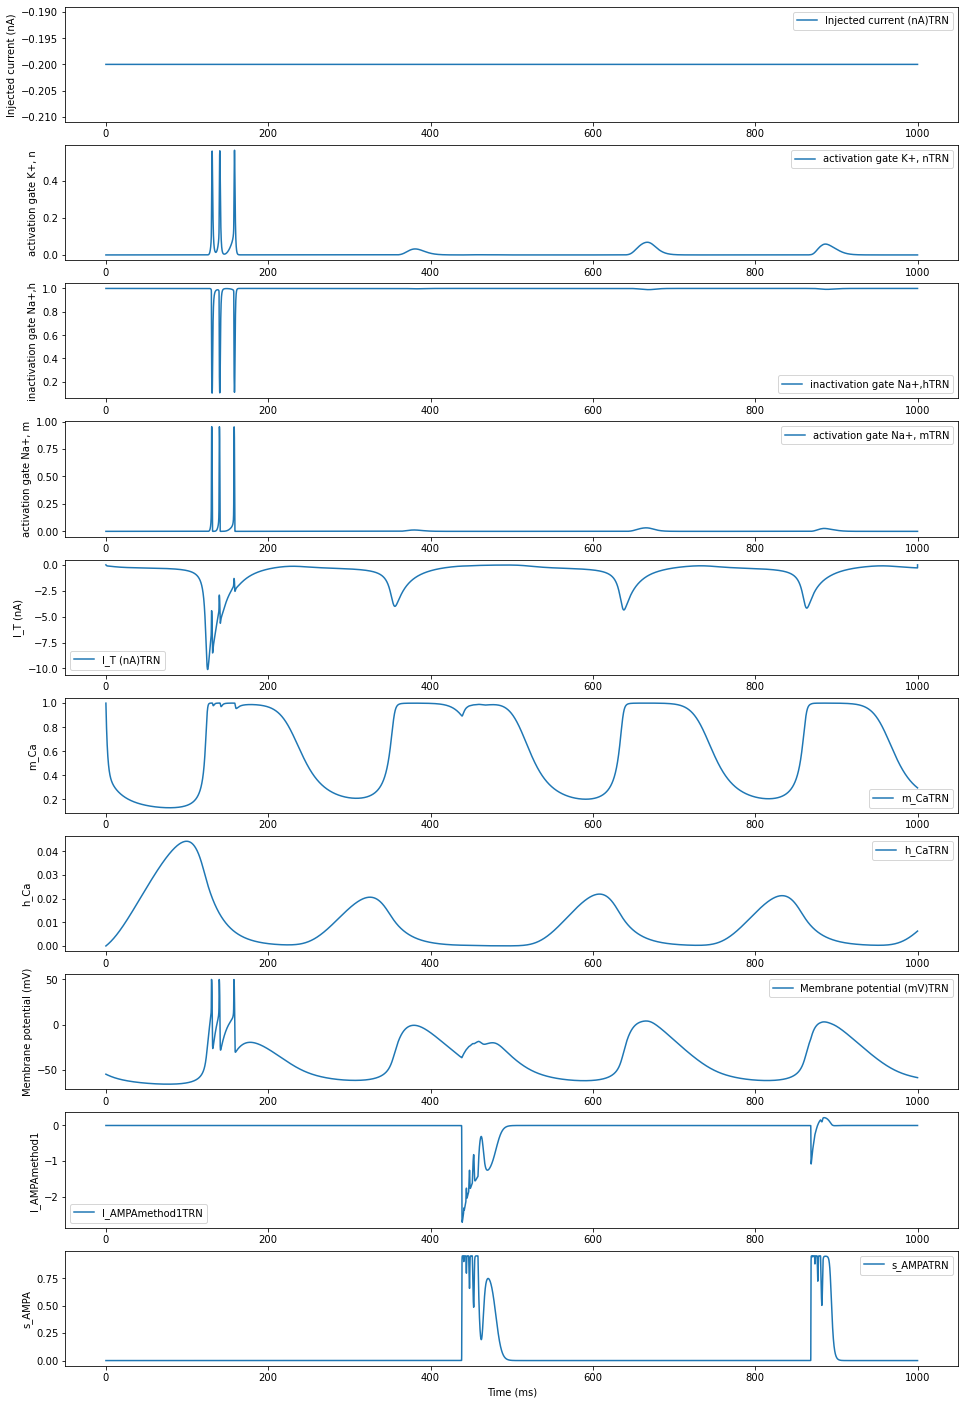

In [48]:
fig, ax = plt.subplots(10,1,figsize = (16,25))



for index, ax in enumerate(ax):
        
    
        ax.plot(T, TRN_variables[list (TRN_variables)[index]], label=list (TRN_variables)[index] + 'TRN')
        ax.legend()
#         ax.set_xlim(0,100)
        ax.set_ylabel(list (TRN_variables)[index])
ax.set_xlabel('Time (ms)')
fig.savefig('1-(-0.2microA)- burtsing in TRN gLmaxTRN=0.015,V_Lis -77 gHTC=0.025 (both reduced).png', bbox_inches = 'tight')  



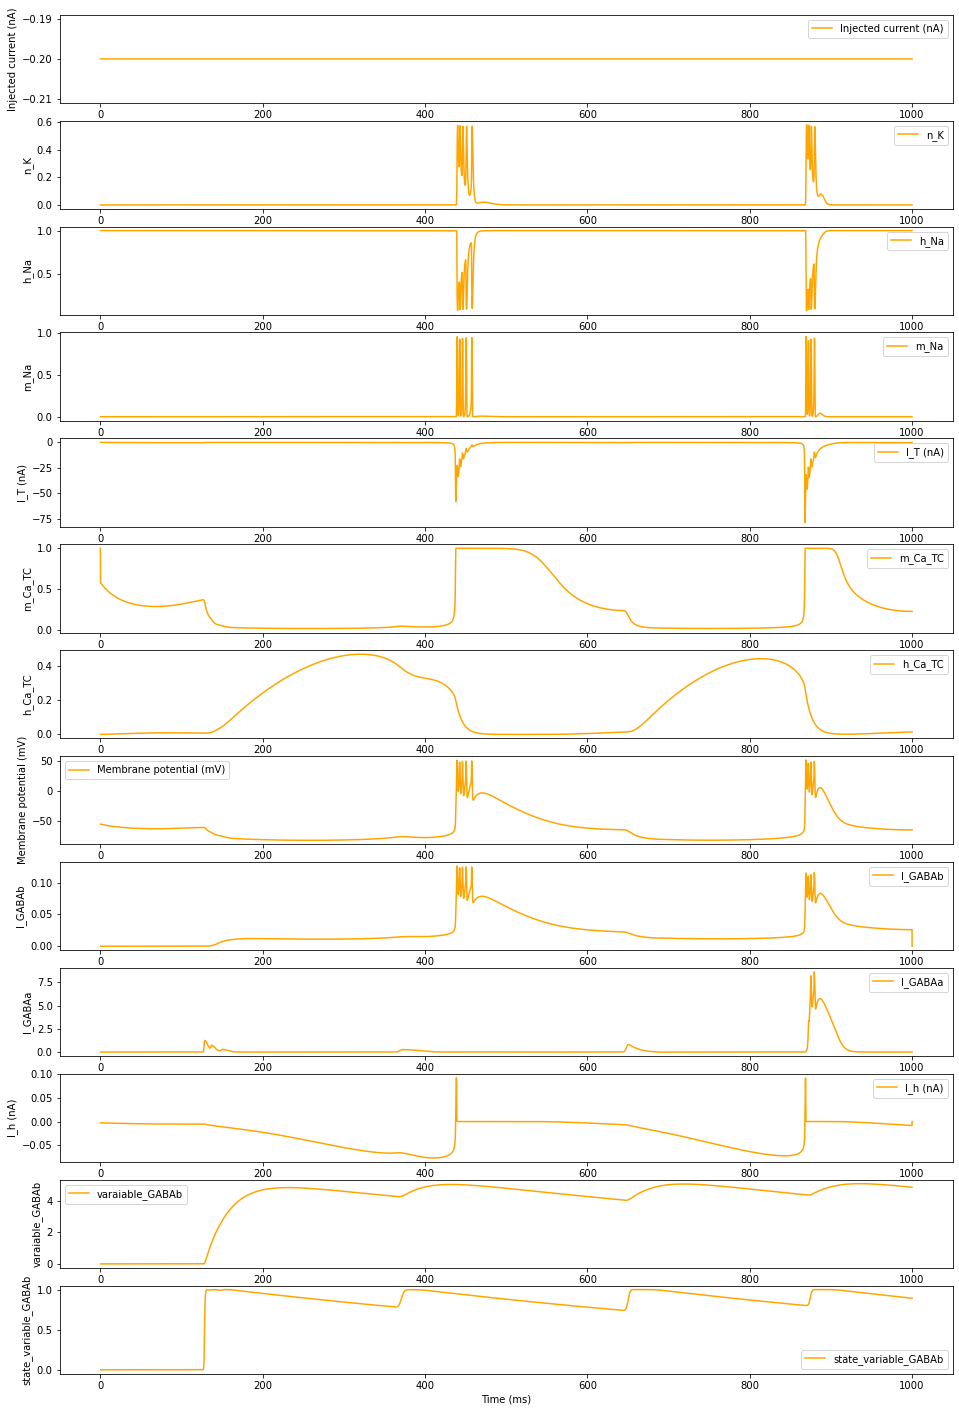

In [49]:
figure, ay =plt.subplots(13,1,figsize=(16,25))
for idx, ay in enumerate(ay):
        
        ay.plot(T, TC_variables[list (TC_variables)[idx]], label =list (TC_variables)[idx], c= 'orange')
        ay.legend()
#         ax.set_xlim(0,100)
        ay.set_ylabel(list (TC_variables)[idx])
ay.set_xlabel('Time (ms)')
figure.savefig('2-(-0.2microA)burtsing in TC gLmaxTRN=0.015,V_L is -77 gHTC=0.025 (both reduced).png', bbox_inches = 'tight')   


In [16]:
def connect_TRN_TRN(I_TRN, T, C_m, dt,n):

    
    ### TRN defining and initialising values:

    g_Na_TRN=200   # Na+ channels (200- destexhe93- 100)
    g_K_TRN=20  # K+ channels ( 15,20,25)
    g_L_TRN= 0.01 #0.3   # leaky channels (destexhe93- 0.05)
    g_T_TRN=3 # the T type calcium channel (destexhe93- 1.75)
    
    g_CAN= 0.25 #mS/cm^2
    V_CAN=-20 #mV
    
    g_K_Ca= 10 #mS/cm^2
    V_K_Ca=-95 #mV

    Ca_conc=np.zeros((len(T),n))
    Ca_conc[0,:]=0.002 #mM of calcium   ---> CHECK THIS INITIAL CONC.

    
    # Initiatlise ionic reversal potential (in mV)
    V_Na_TRN=50 # Na+ channels
    V_K_TRN=-100 # K+ channels
    V_L_TRN=-77  # leaky channels, implementing Bazhenov 2002 value =-77 from -90 on 8/3/2022 (destexhe93: -80)
    V_T_TRN=120
    
    V_TRN=np.zeros((len(T),n))
    V_TRN[0,:]=-60
    

    # current contributed by ion channels in each time point 
    I_K_TRN=np.zeros((len(T),n)) # Potassium
    I_Na_TRN=np.zeros((len(T),n)) # Sodium
    I_L_TRN=np.zeros((len(T),n)) # Leaky channels
    I_T_TRN=np.zeros((len(T),n))
    I_K_Ca=np.zeros((len(T),n))
    I_CAN=np.zeros((len(T),n))
    I_AMPA=np.zeros((len(T),n))
    I_GABAaTRN=np.zeros((len(T),n))
    
    
    n_TRN=np.zeros((len(T),n))
    m_TRN=np.zeros((len(T),n))
    h_TRN=np.zeros((len(T),n))

    #initial rate values for K and Na rate equations
    n_TRN[0,:]=alpha_n_TRN(V_TRN[0,:])/(alpha_n_TRN(V_TRN[0,:])+beta_n_TRN(V_TRN[0,:]))
    m_TRN[0,:]=alpha_m_TRN(V_TRN[0,:])/(alpha_m_TRN(V_TRN[0,:])+beta_m_TRN(V_TRN[0,:]))
    h_TRN[0,:]=alpha_h_TRN(V_TRN[0,:])/(alpha_h_TRN(V_TRN[0,:])+beta_h_TRN(V_TRN[0,:]))

    #initial rate values for 
    m_Ca=np.zeros((len(T),n))
    h_Ca=np.zeros((len(T),n))
    m_Ca[0,:]=m_Ca_inf(0)
    h_Ca[0,:]=h_Ca_inf(0)
    
    m_CAN=np.zeros((len(T),n))
    m_K_Ca=np.zeros((len(T),n))
    m_K_Ca[0,:]=m_K_Ca_inf(0,2)
    m_CAN[0,:]=m_CAN_inf(0,2)
    
    # State variable for synaptic currents 
    g_AMPA=0.08 #mS/cm^2  ((destexhe93- 0.02, or 1nS)
    V_AMPA=0 #mV, reveral potential of AMPA
    tau_AMPA=2 #ms

    g_GABAa=0.069 #mS/cm^2 (from 0.069)
    V_GABAa=-80 #mV, reveral potential of AMPA
    tau_GABAa=5 #ms

    #Current from TC to TRN --> AMPA
    # synaptic currents in TRN --> recurrent GABA_A
    s_AMPA=np.zeros((len(T),n))
    s_GABAaTRN=np.zeros((len(T),n))
    s_AMPA[0,:]=0 #find out the initial value, assuming that this denotes the initial concentration of NT, this can be taken as 0
    s_GABAaTRN[0,:]=0
    
    k=np.zeros((len(T),n))


    #### loop connecting TC and TRN

    for i in range(len(T)-1):

        for j in range(n-1):

            #### TRN values

            I_K_TRN[i,j]= g_K_TRN*np.power(n_TRN[i,j],4)*(V_TRN[i,j]-V_K_TRN)/C_m    ### use I_K_TRN[:,i] for simulating multiple TRN cells and use a mtrix for injecting currents as well (31.03.2022) 

            I_Na_TRN[i,j]=g_Na_TRN*np.power(m_TRN[i,j],3)*h_TRN[i,j]*(V_TRN[i,j]-V_Na_TRN)/C_m

            I_L_TRN[i,j]=g_L_TRN*(V_TRN[i,j]-V_L_TRN)/C_m

            

            I_T_TRN[i,j]=g_T_TRN*np.power(m_Ca[i,j],2)*h_Ca[i,j]*(V_TRN[i,j]-V_T_TRN)/C_m

            I_CAN[i,j]=g_CAN*np.power(m_CAN[i,j],2)*(V_TRN[i,j]-V_CAN)/C_m

            I_K_Ca[i,j]=g_K_Ca*np.power(m_K_Ca[i,j],2)*(V_TRN[i,j]-V_K_Ca)/C_m
            
            # I_AMPA[i,j]=g_AMPA*s_AMPA[i,j]*(V_TRN[i,j]-V_AMPA)/C_m

            I_GABAaTRN[i,j]= g_GABAa*s_GABAaTRN[i,j]*(V_TRN[i,j]-V_GABAa)/C_m


        # this is the problem --> 1st cell gets input from the second and the second cell from the first, cant write that in the same equation!, what if you do this outside the loop?
            if j==0:
                V_TRN[i+1,j]=(I_TRN[i,j]/C_m-I_L_TRN[i,j]-I_Na_TRN[i,j]-I_K_TRN[i,j]-I_T_TRN[i,j]-I_GABAaTRN[i,j+1])*dt+V_TRN[i,j]
            
            if j==1:
                V_TRN[i+1,j]=(I_TRN[i,j]/C_m-I_L_TRN[i,j]-I_Na_TRN[i,j]-I_K_TRN[i,j]-I_T_TRN[i,j]-I_GABAaTRN[i,j-1])*dt+V_TRN[i,j]


            # s_AMPA[i+1,j]= ((5*(1+math.tanh(V_TC[i,j]/4))*(1-s_AMPA[i,j]) - s_AMPA[i,j]/tau_AMPA)) * dt + s_AMPA[i,j]
    
            s_GABAaTRN[i+1,j]= ((5*(1+math.tanh(V_TRN[i,j]/4))*(1-s_GABAaTRN[i,j]) - s_GABAaTRN[i,j]/tau_GABAa)) * dt + s_GABAaTRN[i,j]


            
            n_TRN[i+1,j]=-(n_TRN[i,j]-n_inf(V_TRN[i,j]))*dt/tau_n(V_TRN[i,j]) +n_TRN[i,j]

            m_TRN[i+1,j]=-(m_TRN[i,j]-m_inf(V_TRN[i,j]))*dt/tau_m(V_TRN[i,j]) +m_TRN[i,j]

            h_TRN[i+1,j]=-(h_TRN[i,j]-h_inf(V_TRN[i,j]))*dt/tau_h(V_TRN[i,j]) +h_TRN[i,j]

            m_Ca[i+1,j]=-(m_Ca[i,j]-m_Ca_inf(V_TRN[i,j]))*dt/tau_m_Ca(V_TRN[i,j]) +m_Ca[i,j]

            h_Ca[i+1,j]=-(h_Ca[i,j]-h_Ca_inf(V_TRN[i,j]))*dt/tau_h_Ca(V_TRN[i,j]) +h_Ca[i,j]


            
            

            # m_K_Ca[i+1]=-(m_K_Ca[i]-m_K_Ca_inf(Ca_conc[i],2))*dt/tau_m_K_Ca(Ca_conc[i],2) +m_K_Ca[i]
            # m_CAN[i+1]=-(m_CAN[i]-m_CAN_inf(Ca_conc[i],2))*dt/tau_m_CAN(Ca_conc[i],2) +m_CAN[i]
        

            # Ca_conc[i+1,j]=(max(-10*I_T_TRN[i,j]/2.96489, 0) + (0.00024-Ca_conc[i,j])/5)*dt + Ca_conc[i,j]
    # for i in range(len(T)-1):

    #             V_TRN[i+1,0]=(I_TRN[i]/C_m-I_L_TRN[i,0]-I_Na_TRN[i,0]-I_K_TRN[i,0]-I_T_TRN[i,0]-I_GABAaTRN[i,1])*dt+V_TRN[i,0]
            
    #             V_TRN[i+1,1]=(I_TRN[i]/C_m-I_L_TRN[i,1]-I_Na_TRN[i,1]-I_K_TRN[i,1]-I_T_TRN[i,1]-I_GABAaTRN[i,0])*dt+V_TRN[i,1]
            
            
                

    allvariables_TRNxTRN = {'Injected current (nA)': I_TRN, 'activation gate K+, n':n_TRN, 'inactivation gate Na+,h':h_TRN, 'activation gate Na+, m':m_TRN, 'I_T (nA)':I_T_TRN, 'm_Ca': m_Ca, 'h_Ca':h_Ca, 'Membrane potential (mV)':V_TRN, 'I_GABAa':I_GABAaTRN, 's_GABAaTRN':s_GABAaTRN} 
   
   
         
    return allvariables_TRNxTRN


    



In [17]:
T= duration_of_sim(0,4000,0.01)
n=2
I_TRNinput= 0*np.ones((len(T),n))

I_TRNinput[20000:22000,1]=-2.5
# I_TRNinput[98000:100000]=-1.7
# I_TRNinput[900000:92000]=-3.5

TRN_variables = connect_TRN_TRN(I_TRN=I_TRNinput, T=T, C_m=1, dt=0.01, n=n)


KeyboardInterrupt: 

In [9]:
I_GABAaTRN= TRN_variables['I_GABAa'] 

NameError: name 'TRN_variables' is not defined

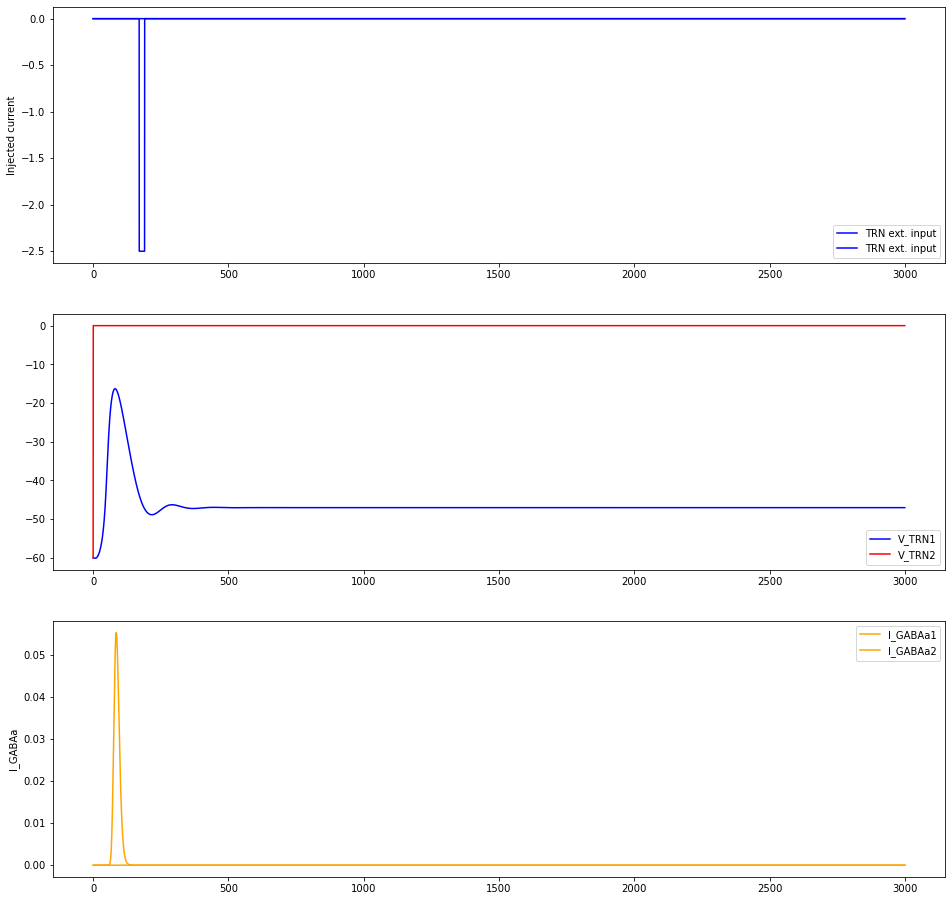

In [25]:
V_trn= TRN_variables['Membrane potential (mV)']
I_GABAaTRN= TRN_variables['I_GABAa'] 
# slow_h= TC_variables['S_H_TC']
# fast_h=TC_variables['F_H_TC']

plt.subplots(3,1, figsize=(16,16))
plt.subplot(3,1,1)
plt.plot(T, I_TRNinput, label= 'TRN ext. input',c='blue')
plt.legend()
plt.ylabel('Injected current')
plt.subplot(3,1,2)
plt.plot(T,V_trn[:,0], label= 'V_TRN1', c='blue')
plt.legend()
plt.plot(T,V_trn[:,1], label= 'V_TRN2', c='red')
plt.legend()
plt.subplot(3,1,3)
plt.plot(T,I_GABAaTRN[:,0], label= 'I_GABAa1', c='orange')
plt.ylabel('I_GABAa')
plt.legend()
plt.plot(T,I_GABAaTRN[:,1], label= 'I_GABAa2', c='orange')
plt.legend()

# plt.plot(T,slow_h,label='slow component h current', c='orange')
# plt.legend()
# plt.ylabel('slow_h')
# plt.subplot(7,1,6)
# plt.plot(T,fast_h,label='fast component h current', c='orange')
# plt.legend()
# plt.ylabel('fast_h')


In [29]:
def connect_nTRN_nTC(I_TC, I_TRN, T, C_m, dt,n):
### TC defining and initialising values

    g_Na_TC=90  #90, destexhe93--> 30
    g_K_TC=10
    g_T_TC=2 #destexhe93--> 1.75
    g_H=0.015#use 0 to remove influence of Ih current,otherwise use 0.015 # DEPENDS??? changed from 0.025 on 8/3/2022 (switch between 0.001 and 0.015) (destexhe93 --> 0.12)
    g_L_TC=0.01 # 0.01 leads to overflow/ changed from 0.001 to 0.01 on 8 March 2022 (Destexhe93-- 0.05)
    # g_KL_TC= 0.0172 #(for a maximal conductance of 5 nS)
    g_KL_TC= 0



    V_Na_TC=50
    V_K_TC=-100
    V_H=-43 #mV
    V_L_TC=-70 #Destxhe93 = -86
    V_T_TC = 120 # used this instead of using the dynamic equation in Austin Sopalata 2017
    V_KL_TC= -100


    # membrane potential at each time point
    V_TC=np.zeros((len(T),n))
    V_TC[0,:]=-60   # changed from -60 to -55 on 8/3/2022 as the steady state value in isolated TRN is around -54
    

    # current contributed by ion channels in each time point 
    I_K_TC=np.zeros((len(T),n)) # Potassium
    I_Na_TC=np.zeros((len(T),n)) # Sodium
    I_L_TC=np.zeros((len(T),n))  # Leaky channels
    I_H_TC=np.zeros((len(T),n))
    I_T_TC=np.zeros((len(T),n))
    I_KL_TC= np.zeros((len(T),n))
    I_GABAb= np.zeros((len(T),n))
    I_GABAa=np.zeros((len(T),n))

    # open probabilities of each channel gates at each time point
    n_TC=np.zeros((len(T),n))
    m_TC=np.zeros((len(T),n))
    h_TC=np.zeros((len(T),n))
    S_H_TC=np.zeros((len(T),n))
    F_H_TC=np.zeros((len(T),n))
    
    tau_TC=np.zeros((len(T),n))
       
    
    # state variables for synaptic current from TRN to TC
    g_GABAb=np.zeros((n))  # 25-05-22
    g_GABAb[0]= 0.01 
    g_GABAb[1]= 0.008# 80% of above           #  0.001 mS/cm^2 ---.  ''' increase GABAb to see if that allows bursting in TC without an external pulse ''' (Destexhe93 - 4 nS, or 0.013 mS/cm2)
    V_GABAb= -95 #mV

    g=np.zeros((len(T),n))
    r=np.zeros((len(T),n))

    g[0,:]=0
    r[0,:]=0

    
    #state varaible equation (r,g)
    k1= 0.5 #(mM^-1 ms^-1)
    k2=0.0012 #(ms^-1)
    k3=0.18 #(ms^-1)
    k4= 0.034 #(ms^-1)
    
    
    #TRN cells Note: TRN and TC cells have the same Na and K channel kinetics according to Austin Soplata 2017 /................

    #initial rate values for K and Na rate equations
    n_TC[0,:]=alpha_n_TRN(V_TC[0,:])/(alpha_n_TRN(V_TC[0,:])+beta_n_TRN(V_TC[0,:]))
    m_TC[0,:]=alpha_m_TRN(V_TC[0,:])/(alpha_m_TRN(V_TC[0,:])+beta_m_TRN(V_TC[0,:]))
    h_TC[0,:]=alpha_h_TRN(V_TC[0,:])/(alpha_h_TRN(V_TC[0,:])+beta_h_TRN(V_TC[0,:]))
    alpha_S_TC_0= H_TC_inf(V_TC[0,:])/tau_H_S(V_TC[0,:])
    beta_S_TC_0= (1-H_TC_inf(V_TC[0,:]))/tau_H_S(V_TC[0,:])
    S_H_TC[0,:]= alpha_S_TC_0/(alpha_S_TC_0 + beta_S_TC_0)

    alpha_F_TC_0= H_TC_inf(V_TC[0,:])/tau_H_F(V_TC[0,:])
    beta_F_TC_0= (1-H_TC_inf(V_TC[0,:]))/tau_H_F(V_TC[0,:])
    F_H_TC[0,:]= alpha_F_TC_0/(alpha_F_TC_0 + beta_F_TC_0)
    

    #initial rate values for 
    m_Ca_TC=np.zeros((len(T),n))
    h_Ca_TC=np.zeros((len(T),n))

    m_Ca_TC[0,:]=m_Ca_TC_inf(0)
    h_Ca_TC[0,:]=h_Ca_TC_inf(0)

    
    ### TRN defining and initialising values:

    g_Na_TRN=200   # Na+ channels (200- destexhe93- 100)
    g_K_TRN=20  # K+ channels ( 15,20,25)
    g_L_TRN= 0.09 #0.3   # leaky channels (destexhe93- 0.05)
    g_T_TRN=3 # the T type calcium channel (destexhe93- 1.75)
    
    g_CAN= 0.25 #mS/cm^2
    V_CAN=-20 #mV
    
    g_K_Ca= 10 #mS/cm^2
    V_K_Ca=-95 #mV

    Ca_conc=np.zeros((len(T),n))
    Ca_conc[0,:]=0.002 #mM of calcium   ---> CHECK THIS INITIAL CONC.

    
    # Initiatlise ionic reversal potential (in mV)
    V_Na_TRN=50 # Na+ channels
    V_K_TRN=-100 # K+ channels
    V_L_TRN=-77  # leaky channels, implementing Bazhenov 2002 value =-77 from -90 on 8/3/2022 (destexhe93: -80)
    V_T_TRN=120
    
    V_TRN=np.zeros((len(T),n))
    V_TRN[0,:]=-60
    

    # current contributed by ion channels in each time point 
    I_K_TRN=np.zeros((len(T),n)) # Potassium
    I_Na_TRN=np.zeros((len(T),n)) # Sodium
    I_L_TRN=np.zeros((len(T),n)) # Leaky channels
    I_T_TRN=np.zeros((len(T),n))
    I_K_Ca=np.zeros((len(T),n))
    I_CAN=np.zeros((len(T),n))
    I_AMPA=np.zeros((len(T),n))
    I_GABAaTRN=np.zeros((len(T),n))
    
    
    n_TRN=np.zeros((len(T),n))
    m_TRN=np.zeros((len(T),n))
    h_TRN=np.zeros((len(T),n))

    #initial rate values for K and Na rate equations
    n_TRN[0,:]=alpha_n_TRN(V_TRN[0,:])/(alpha_n_TRN(V_TRN[0,:])+beta_n_TRN(V_TRN[0,:]))
    m_TRN[0,:]=alpha_m_TRN(V_TRN[0,:])/(alpha_m_TRN(V_TRN[0,:])+beta_m_TRN(V_TRN[0,:]))
    h_TRN[0,:]=alpha_h_TRN(V_TRN[0,:])/(alpha_h_TRN(V_TRN[0,:])+beta_h_TRN(V_TRN[0,:]))

    #initial rate values for 
    m_Ca=np.zeros((len(T),n))
    h_Ca=np.zeros((len(T),n))
    m_Ca[0,:]=m_Ca_inf(0)
    h_Ca[0,:]=h_Ca_inf(0)
    
    m_CAN=np.zeros((len(T),n))
    m_K_Ca=np.zeros((len(T),n))
    m_K_Ca[0,:]=m_K_Ca_inf(0,2)
    m_CAN[0,:]=m_CAN_inf(0,2)
    
    # State variable for synaptic currents 
    g_AMPA=np.zeros((n)) 
    g_AMPA[0]=0.4 #mS/cm^2  ((destexhe93- 0.02, or 1nS)
    g_AMPA[1]=0.4
    V_AMPA=0 #mV, reveral potential of AMPA
    tau_AMPA=2 #ms

    g_GABAa=np.zeros((n))  # 25-05-22
    g_GABAa[0]= 0.069
    g_GABAa[1]= 0.069       #0.0552
    # g_GABAa=0.069 #mS/cm^2 (from 0.069)
    V_GABAa=-80 #mV, reveral potential of AMPA
    tau_GABAa=5 #ms

    #Current from TC to TRN --> AMPA, TRN to TC -->GABAa
    # synaptic currents in TRN --> recurrent GABAaTRN
    s_AMPA=np.zeros((len(T),n))
    s_GABAa=np.zeros((len(T),n))
    s_GABAaTRN=np.zeros((len(T),n))
    s_AMPA[0,:]=0 #find out the initial value, assuming that this denotes the initial concentration of NT, this can be taken as 0
    s_GABAaTRN[0,:]=0
    s_GABAa[0,:]=0

    k=np.zeros((len(T),n))


    #### loop connecting TC and TRN

    for i in range(len(T)-1):

        for j in range(n):
            # print(j)

            #### TRN intrinsic currents 

            I_K_TRN[i,j]= g_K_TRN*np.power(n_TRN[i,j],4)*(V_TRN[i,j]-V_K_TRN)/C_m    ### use I_K_TRN[:,i] for simulating multiple TRN cells and use a mtrix for injecting currents as well (31.03.2022) 

            I_Na_TRN[i,j]=g_Na_TRN*np.power(m_TRN[i,j],3)*h_TRN[i,j]*(V_TRN[i,j]-V_Na_TRN)/C_m

            I_L_TRN[i,j]=g_L_TRN*(V_TRN[i,j]-V_L_TRN)/C_m

            I_T_TRN[i,j]=g_T_TRN*np.power(m_Ca[i,j],2)*h_Ca[i,j]*(V_TRN[i,j]-V_T_TRN)/C_m
            
            I_AMPA[i,j]=g_AMPA[j]*s_AMPA[i,j]*(V_TRN[i,0]-V_AMPA)/C_m

            # I_GABAaTRN[i,j]= g_GABAa*s_GABAaTRN[i,j]*(V_TRN[i,j]-V_GABAa)/C_m

            #### TC intrinsic currents 

            I_K_TC[i,j]= g_K_TC*np.power(n_TC[i,j],4)*(V_TC[i,j]-V_K_TC)/C_m

            I_Na_TC[i,j]=g_Na_TC*np.power(m_TC[i,j],3)*h_TC[i,j]*(V_TC[i,j]-V_Na_TC)/C_m

            I_L_TC[i,j]=g_L_TC*(V_TC[i,j]-V_L_TC)/C_m

            I_KL_TC[i,j]=g_KL_TC*(V_TC[i,j]-V_KL_TC)/C_m

            I_T_TC[i,j]=g_T_TC*np.power(m_Ca_TC[i,j],2)*h_Ca_TC[i,j]*(V_TC[i,j]-V_T_TC)/C_m

            I_H_TC[i,j]=g_H*S_H_TC[i,j]*F_H_TC[i,j]*(V_TC[i,j]-V_H)/C_m

            I_GABAb[i,j]= g_GABAb[j]*(np.power(g[i,0],4))*(V_TC[i,j]-V_GABAb)/(np.power(g[i,0],4)+100)/C_m

            #I_GABAb[i,1]= g_GABAb*(np.power(g[i,0],4))*(V_TC[i,1]-V_GABAb)/(np.power(g[i,0],4)+100)/C_m

            I_GABAa[i,j]= g_GABAa[j]*s_GABAa[i,0]*(V_TC[i,j]-V_GABAa)/C_m

            # I_GABAa[i,1]= g_GABAa*s_GABAa[i,0]*(V_TC[i,1]-V_GABAa)/C_m
            
            # I_GABAb[i,j]= g_GABAb*(np.power(g[i,j],4))*(V_TC[i,j]-V_GABAb)/(np.power(g[i,j],4)+100)/C_m

            # I_GABAa[i,j]= g_GABAa*s_GABAa[i,j]*(V_TC[i,j]-V_GABAa)/C_m


        # # this is the problem --> 1st cell gets input from the second and the second cell from the first, cant write that in the same equation!, what if you do this outside the loop?
            # if j==0: ## this is needed as without fixing the value j+1 will not make sense 
            V_TRN[i+1,0]=(I_TRN[i,0]/C_m-I_L_TRN[i,0]-I_Na_TRN[i,0]-I_K_TRN[i,0]-I_T_TRN[i,0]-I_AMPA[i,1]-I_AMPA[i,0])*dt+V_TRN[i,0]
            
            V_TC[i+1,j]=(I_TC[i,j]/C_m-I_K_TC[i,j]-I_Na_TC[i,j]-I_L_TC[i,j]-I_T_TC[i,j]-I_H_TC[i,j]-I_GABAb[i,j] - I_GABAa[i,j] )*dt+V_TC[i,j]  

            
            # if j==1:
                # print(j)
            #     # V_TRN[i+1,j]=(I_TRN[i,j]/C_m-I_L_TRN[i,j]-I_Na_TRN[i,j]-I_K_TRN[i,j]-I_T_TRN[i,j]-I_GABAaTRN[i,j-1]-I_AMPA[i,j-1]-I_AMPA[i,j])*dt+V_TRN[i,j]
                # V_TC[i+1,j]=(I_TC[i,j]/C_m-I_K_TC[i,j]-I_Na_TC[i,j]-I_L_TC[i,j]-I_T_TC[i,j]-I_H_TC[i,j]-I_GABAb[i,j] - I_GABAa[i,j])*dt+V_TC[i,j]  

        ### without TRN-TRN connections
            # if j==0:
            # V_TRN[i+1,0]=(I_TRN[i,0]/C_m-I_L_TRN[i,0]-I_Na_TRN[i,0]-I_K_TRN[i,0]-I_T_TRN[i,0]-I_AMPA[i,1]-I_AMPA[i,0])*dt+V_TRN[i,0]
            # V_TC[i+1,0]=(I_TC[i,0]/C_m-I_K_TC[i,0]-I_Na_TC[i,0]-I_L_TC[i,0]-I_T_TC[i,0]-I_H_TC[i,0]-I_GABAb[i,0] - I_GABAa[i,0] )*dt+V_TC[i,0]  
            # V_TC[i+1,1]=(I_TC[i,1]/C_m-I_K_TC[i,1]-I_Na_TC[i,1]-I_L_TC[i,1]-I_T_TC[i,1]-I_H_TC[i,1]-I_GABAb[i,1] - I_GABAa[i,1] )*dt+V_TC[i,1]  

            
            # # if j==1:
            #     # V_TRN[i+1,j]=(I_TRN[i,j]/C_m-I_L_TRN[i,j]-I_Na_TRN[i,j]-I_K_TRN[i,j]-I_T_TRN[i,j]-I_GABAaTRN[i,j-1]-I_AMPA[i,j-1]-I_AMPA[i,j])*dt+V_TRN[i,j]
            # V_TC[i+1,1]=(I_TC[i,1]/C_m-I_K_TC[i,1]-I_Na_TC[i,1]-I_L_TC[i,1]-I_T_TC[i,1]-I_H_TC[i,1]-I_GABAb[i,0] - I_GABAa[i,0])*dt+V_TC[i,1]  

            s_AMPA[i+1,j]= ((5*(1+math.tanh(V_TC[i,j]/4))*(1-s_AMPA[i,j]) - s_AMPA[i,j]/tau_AMPA)) * dt + s_AMPA[i,j]
    
            # s_GABAaTRN[i+1,j]= ((5*(1+math.tanh(V_TRN[i,j]/4))*(1-s_GABAaTRN[i,j]) - s_GABAaTRN[i,j]/tau_GABAa)) * dt + s_GABAaTRN[i,j]


            
            ### TRN gating variables

            n_TRN[i+1,j]=-(n_TRN[i,j]-n_inf(V_TRN[i,j]))*dt/tau_n(V_TRN[i,j]) +n_TRN[i,j]

            m_TRN[i+1,j]=-(m_TRN[i,j]-m_inf(V_TRN[i,j]))*dt/tau_m(V_TRN[i,j]) +m_TRN[i,j]

            h_TRN[i+1,j]=-(h_TRN[i,j]-h_inf(V_TRN[i,j]))*dt/tau_h(V_TRN[i,j]) +h_TRN[i,j]

            m_Ca[i+1,j]=-(m_Ca[i,j]-m_Ca_inf(V_TRN[i,j]))*dt/tau_m_Ca(V_TRN[i,j]) +m_Ca[i,j]

            h_Ca[i+1,j]=-(h_Ca[i,j]-h_Ca_inf(V_TRN[i,j]))*dt/tau_h_Ca(V_TRN[i,j]) +h_Ca[i,j]


            ### TC gating varaiables          
                    
            r[i+1,j]= (k1*2*(1+math.tanh(V_TRN[i,j]/4))*(1-r[i,j])-k2*r[i,j])*dt + r[i,j]  # check how to represent these equations with Jorge
            
            g[i+1,j]= (k3*r[i,j] - k4*g[i,j])*dt +g[i,j]

            s_GABAa[i+1,j]= ((5*(1+math.tanh(V_TRN[i,j]/4))*(1-s_GABAa[i,j]) - s_GABAa[i,j]/tau_GABAa)) * dt + s_GABAa[i,j]
            
            # tau_TC[i]= tau_n(V_TC[i])+tau_m(V_TC[i])+tau_h(V_TC[i])+tau_Ca_TC_h(V_TC[i])
        
            n_TC[i+1,j]=-(n_TC[i,j]-n_inf(V_TC[i,j]))*dt/tau_n(V_TC[i,j]) +n_TC[i,j]

            m_TC[i+1,j]=-(m_TC[i,j]-m_inf(V_TC[i,j]))*dt/tau_m(V_TC[i,j]) +m_TC[i,j]

            h_TC[i+1,j]=-(h_TC[i,j]-h_inf(V_TC[i,j]))*dt/tau_h(V_TC[i,j]) +h_TC[i,j]

            m_Ca_TC[i+1,j]= m_Ca_TC_inf(V_TC[i+1,j])

            h_Ca_TC[i+1,j]=-(h_Ca_TC[i,j]-h_Ca_TC_inf(V_TC[i,j]))*dt/tau_Ca_TC_h(V_TC[i,j]) +h_Ca_TC[i,j]

            S_H_TC[i+1,j]= -(S_H_TC[i,j]-H_TC_inf(V_TC[i,j]))*dt/tau_H_S(V_TC[i,j]) + S_H_TC[i,j]

            F_H_TC[i+1,j]= -(F_H_TC[i,j]-H_TC_inf(V_TC[i,j]))*dt/tau_H_F(V_TC[i,j]) + F_H_TC[i,j]
            


                
        allvariables_nTRN = {'Injected current (nA)': I_TRN, 'activation gate K+, n':n_TRN, 'inactivation gate Na+,h':h_TRN, 'activation gate Na+, m':m_TRN, 'I_T (nA)':I_T_TRN, 'm_Ca': m_Ca, 'h_Ca':h_Ca, 'Membrane potential (mV)':V_TRN, 'I_AMPAmethod1':I_AMPA, 's_AMPA':s_AMPA} 
        allvariables_nTC = {'Injected current (nA)': I_TC, 'n_K':n_TC, 'h_Na':h_TC, 'm_Na':m_TC, 'I_T (nA)':I_T_TC, 'm_Ca_TC': m_Ca_TC, 'h_Ca_TC':h_Ca_TC, 'Membrane potential (mV)':V_TC, 'I_GABAb': I_GABAb, 'I_GABAa':I_GABAa, 'I_h (nA)':I_H_TC, 'varaiable_GABAb': g, 'state_variable_GABAb': r}

    return allvariables_nTRN, allvariables_nTC

### A big note to MEERA:

Divide the three cell GABA inputs between symmetric and asymmetric and write a function to input the weight of gabaergic connections 

### different ways of writing the loop- 1 TRN and 2 TC circuit

In [ ]:
#Method 1

for i in range(len(T)-1):

        for j in range(n-1):

            #### TRN intrinsic currents 

            I_K_TRN[i,j]= g_K_TRN*np.power(n_TRN[i,j],4)*(V_TRN[i,j]-V_K_TRN)/C_m    ### use I_K_TRN[:,i] for simulating multiple TRN cells and use a mtrix for injecting currents as well (31.03.2022) 

            I_Na_TRN[i,j]=g_Na_TRN*np.power(m_TRN[i,j],3)*h_TRN[i,j]*(V_TRN[i,j]-V_Na_TRN)/C_m

            I_L_TRN[i,j]=g_L_TRN*(V_TRN[i,j]-V_L_TRN)/C_m

            I_T_TRN[i,j]=g_T_TRN*np.power(m_Ca[i,j],2)*h_Ca[i,j]*(V_TRN[i,j]-V_T_TRN)/C_m

            
            I_AMPA[i,j]=g_AMPA*s_AMPA[i,j]*(V_TRN[i,0]-V_AMPA)/C_m

            #### TC intrinsic currents 

            I_K_TC[i,j]= g_K_TC*np.power(n_TC[i,j],4)*(V_TC[i,j]-V_K_TC)/C_m

            I_Na_TC[i,j]=g_Na_TC*np.power(m_TC[i,j],3)*h_TC[i,j]*(V_TC[i,j]-V_Na_TC)/C_m

            I_L_TC[i,j]=g_L_TC*(V_TC[i,j]-V_L_TC)/C_m

            I_KL_TC[i,j]=g_KL_TC*(V_TC[i,j]-V_KL_TC)/C_m

            I_T_TC[i,j]=g_T_TC*np.power(m_Ca_TC[i,j],2)*h_Ca_TC[i,j]*(V_TC[i,j]-V_T_TC)/C_m

            I_H_TC[i,j]=g_H*S_H_TC[i,j]*F_H_TC[i,j]*(V_TC[i,j]-V_H)/C_m

            I_GABAb[i,j]= g_GABAb*(np.power(g[i,0],4))*(V_TC[i,j]-V_GABAb)/(np.power(g[i,0],4)+100)/C_m

            I_GABAa[i,j]= g_GABAa*s_GABAa[i,0]*(V_TC[i,j]-V_GABAa)/C_m

            V_TRN[i+1,j]=(I_TRN[i,j]/C_m-I_L_TRN[i,j]-I_Na_TRN[i,j]-I_K_TRN[i,j]-I_T_TRN[i,j]-I_AMPA[i,1]-I_AMPA[i,0])*dt+V_TRN[i,j]
            
            V_TC[i+1,j]=(I_TC[i,j]/C_m-I_K_TC[i,j]-I_Na_TC[i,j]-I_L_TC[i,j]-I_T_TC[i,j]-I_H_TC[i,j]-I_GABAb[i,j] - I_GABAa[i,j] )*dt+V_TC[i,j]  

            s_AMPA[i+1,j]= ((5*(1+math.tanh(V_TC[i,j]/4))*(1-s_AMPA[i,j]) - s_AMPA[i,j]/tau_AMPA)) * dt + s_AMPA[i,j]
    
            
            ### TRN gating variables

            n_TRN[i+1,j]=-(n_TRN[i,j]-n_inf(V_TRN[i,j]))*dt/tau_n(V_TRN[i,j]) +n_TRN[i,j]

            m_TRN[i+1,j]=-(m_TRN[i,j]-m_inf(V_TRN[i,j]))*dt/tau_m(V_TRN[i,j]) +m_TRN[i,j]

            h_TRN[i+1,j]=-(h_TRN[i,j]-h_inf(V_TRN[i,j]))*dt/tau_h(V_TRN[i,j]) +h_TRN[i,j]

            m_Ca[i+1,j]=-(m_Ca[i,j]-m_Ca_inf(V_TRN[i,j]))*dt/tau_m_Ca(V_TRN[i,j]) +m_Ca[i,j]

            h_Ca[i+1,j]=-(h_Ca[i,j]-h_Ca_inf(V_TRN[i,j]))*dt/tau_h_Ca(V_TRN[i,j]) +h_Ca[i,j]


            ### TC gating varaiables          
                    
            r[i+1,j]= (k1*2*(1+math.tanh(V_TRN[i,j]/4))*(1-r[i,j])-k2*r[i,j])*dt + r[i,j]  # check how to represent these equations with Jorge
            
            g[i+1,j]= (k3*r[i,j] - k4*g[i,j])*dt +g[i,j]

            s_GABAa[i+1,j]= ((5*(1+math.tanh(V_TRN[i,j]/4))*(1-s_GABAa[i,j]) - s_GABAa[i,j]/tau_GABAa)) * dt + s_GABAa[i,j]
            
            # tau_TC[i]= tau_n(V_TC[i])+tau_m(V_TC[i])+tau_h(V_TC[i])+tau_Ca_TC_h(V_TC[i])
        
            n_TC[i+1,j]=-(n_TC[i,j]-n_inf(V_TC[i,j]))*dt/tau_n(V_TC[i,j]) +n_TC[i,j]

            m_TC[i+1,j]=-(m_TC[i,j]-m_inf(V_TC[i,j]))*dt/tau_m(V_TC[i,j]) +m_TC[i,j]

            h_TC[i+1,j]=-(h_TC[i,j]-h_inf(V_TC[i,j]))*dt/tau_h(V_TC[i,j]) +h_TC[i,j]

            m_Ca_TC[i+1,j]= m_Ca_TC_inf(V_TC[i+1,j])

            h_Ca_TC[i+1,j]=-(h_Ca_TC[i,j]-h_Ca_TC_inf(V_TC[i,j]))*dt/tau_Ca_TC_h(V_TC[i,j]) +h_Ca_TC[i,j]

            S_H_TC[i+1,j]= -(S_H_TC[i,j]-H_TC_inf(V_TC[i,j]))*dt/tau_H_S(V_TC[i,j]) + S_H_TC[i,j]

            F_H_TC[i+1,j]= -(F_H_TC[i,j]-H_TC_inf(V_TC[i,j]))*dt/tau_H_F(V_TC[i,j]) + F_H_TC[i,j]

In [ ]:
#Method 2- same concept as 1, but instead of using the variable j, use the value directly

for i in range(len(T)-1):

        for j in range(n-1):

            #### TRN intrinsic currents 

            I_K_TRN[i,j]= g_K_TRN*np.power(n_TRN[i,j],4)*(V_TRN[i,j]-V_K_TRN)/C_m    ### use I_K_TRN[:,i] for simulating multiple TRN cells and use a mtrix for injecting currents as well (31.03.2022) 

            I_Na_TRN[i,j]=g_Na_TRN*np.power(m_TRN[i,j],3)*h_TRN[i,j]*(V_TRN[i,j]-V_Na_TRN)/C_m

            I_L_TRN[i,j]=g_L_TRN*(V_TRN[i,j]-V_L_TRN)/C_m

            I_T_TRN[i,j]=g_T_TRN*np.power(m_Ca[i,j],2)*h_Ca[i,j]*(V_TRN[i,j]-V_T_TRN)/C_m
            
            I_AMPA[i,j]=g_AMPA*s_AMPA[i,j]*(V_TRN[i,0]-V_AMPA)/C_m

            #### TC intrinsic currents 

            I_K_TC[i,j]= g_K_TC*np.power(n_TC[i,j],4)*(V_TC[i,j]-V_K_TC)/C_m

            I_Na_TC[i,j]=g_Na_TC*np.power(m_TC[i,j],3)*h_TC[i,j]*(V_TC[i,j]-V_Na_TC)/C_m

            I_L_TC[i,j]=g_L_TC*(V_TC[i,j]-V_L_TC)/C_m

            I_KL_TC[i,j]=g_KL_TC*(V_TC[i,j]-V_KL_TC)/C_m

            I_T_TC[i,j]=g_T_TC*np.power(m_Ca_TC[i,j],2)*h_Ca_TC[i,j]*(V_TC[i,j]-V_T_TC)/C_m

            I_H_TC[i,j]=g_H*S_H_TC[i,j]*F_H_TC[i,j]*(V_TC[i,j]-V_H)/C_m

            I_GABAb[i,j]= g_GABAb*(np.power(g[i,0],4))*(V_TC[i,j]-V_GABAb)/(np.power(g[i,0],4)+100)/C_m

            I_GABAa[i,j]= g_GABAa*s_GABAa[i,0]*(V_TC[i,j]-V_GABAa)/C_m

            V_TRN[i+1,0]=(I_TRN[i,0]/C_m-I_L_TRN[i,0]-I_Na_TRN[i,0]-I_K_TRN[i,0]-I_T_TRN[i,0]-I_AMPA[i,1]-I_AMPA[i,0])*dt+V_TRN[i,0]
            V_TC[i+1,0]=(I_TC[i,0]/C_m-I_K_TC[i,0]-I_Na_TC[i,0]-I_L_TC[i,0]-I_T_TC[i,0]-I_H_TC[i,0]-I_GABAb[i,0] - I_GABAa[i,0] )*dt+V_TC[i,0]  
            V_TC[i+1,1]=(I_TC[i,1]/C_m-I_K_TC[i,1]-I_Na_TC[i,1]-I_L_TC[i,1]-I_T_TC[i,1]-I_H_TC[i,1]-I_GABAb[i,1] - I_GABAa[i,1] )*dt+V_TC[i,1]  

            s_AMPA[i+1,j]= ((5*(1+math.tanh(V_TC[i,j]/4))*(1-s_AMPA[i,j]) - s_AMPA[i,j]/tau_AMPA)) * dt + s_AMPA[i,j]
    
            
            ### TRN gating variables

            n_TRN[i+1,j]=-(n_TRN[i,j]-n_inf(V_TRN[i,j]))*dt/tau_n(V_TRN[i,j]) +n_TRN[i,j]

            m_TRN[i+1,j]=-(m_TRN[i,j]-m_inf(V_TRN[i,j]))*dt/tau_m(V_TRN[i,j]) +m_TRN[i,j]

            h_TRN[i+1,j]=-(h_TRN[i,j]-h_inf(V_TRN[i,j]))*dt/tau_h(V_TRN[i,j]) +h_TRN[i,j]

            m_Ca[i+1,j]=-(m_Ca[i,j]-m_Ca_inf(V_TRN[i,j]))*dt/tau_m_Ca(V_TRN[i,j]) +m_Ca[i,j]

            h_Ca[i+1,j]=-(h_Ca[i,j]-h_Ca_inf(V_TRN[i,j]))*dt/tau_h_Ca(V_TRN[i,j]) +h_Ca[i,j]


            ### TC gating varaiables          
                    
            r[i+1,j]= (k1*2*(1+math.tanh(V_TRN[i,j]/4))*(1-r[i,j])-k2*r[i,j])*dt + r[i,j]  # check how to represent these equations with Jorge
            
            g[i+1,j]= (k3*r[i,j] - k4*g[i,j])*dt +g[i,j]

            s_GABAa[i+1,j]= ((5*(1+math.tanh(V_TRN[i,j]/4))*(1-s_GABAa[i,j]) - s_GABAa[i,j]/tau_GABAa)) * dt + s_GABAa[i,j]
            
            # tau_TC[i]= tau_n(V_TC[i])+tau_m(V_TC[i])+tau_h(V_TC[i])+tau_Ca_TC_h(V_TC[i])
        
            n_TC[i+1,j]=-(n_TC[i,j]-n_inf(V_TC[i,j]))*dt/tau_n(V_TC[i,j]) +n_TC[i,j]

            m_TC[i+1,j]=-(m_TC[i,j]-m_inf(V_TC[i,j]))*dt/tau_m(V_TC[i,j]) +m_TC[i,j]

            h_TC[i+1,j]=-(h_TC[i,j]-h_inf(V_TC[i,j]))*dt/tau_h(V_TC[i,j]) +h_TC[i,j]

            m_Ca_TC[i+1,j]= m_Ca_TC_inf(V_TC[i+1,j])

            h_Ca_TC[i+1,j]=-(h_Ca_TC[i,j]-h_Ca_TC_inf(V_TC[i,j]))*dt/tau_Ca_TC_h(V_TC[i,j]) +h_Ca_TC[i,j]

            S_H_TC[i+1,j]= -(S_H_TC[i,j]-H_TC_inf(V_TC[i,j]))*dt/tau_H_S(V_TC[i,j]) + S_H_TC[i,j]

            F_H_TC[i+1,j]= -(F_H_TC[i,j]-H_TC_inf(V_TC[i,j]))*dt/tau_H_F(V_TC[i,j]) + F_H_TC[i,j]

In [ ]:
#Method 3 - Writing the membrane potential eqn outside the loop, NOTE: this method is WRONG as it does not update the memrbrane potential value in each loop

for i in range(len(T)-1):

        for j in range(n-1):

            #### TRN intrinsic currents 

            I_K_TRN[i,j]= g_K_TRN*np.power(n_TRN[i,j],4)*(V_TRN[i,j]-V_K_TRN)/C_m    ### use I_K_TRN[:,i] for simulating multiple TRN cells and use a mtrix for injecting currents as well (31.03.2022) 

            I_Na_TRN[i,j]=g_Na_TRN*np.power(m_TRN[i,j],3)*h_TRN[i,j]*(V_TRN[i,j]-V_Na_TRN)/C_m

            I_L_TRN[i,j]=g_L_TRN*(V_TRN[i,j]-V_L_TRN)/C_m

            I_T_TRN[i,j]=g_T_TRN*np.power(m_Ca[i,j],2)*h_Ca[i,j]*(V_TRN[i,j]-V_T_TRN)/C_m
            
            I_AMPA[i,j]=g_AMPA*s_AMPA[i,j]*(V_TRN[i,0]-V_AMPA)/C_m

            #### TC intrinsic currents 

            I_K_TC[i,j]= g_K_TC*np.power(n_TC[i,j],4)*(V_TC[i,j]-V_K_TC)/C_m

            I_Na_TC[i,j]=g_Na_TC*np.power(m_TC[i,j],3)*h_TC[i,j]*(V_TC[i,j]-V_Na_TC)/C_m

            I_L_TC[i,j]=g_L_TC*(V_TC[i,j]-V_L_TC)/C_m

            I_KL_TC[i,j]=g_KL_TC*(V_TC[i,j]-V_KL_TC)/C_m

            I_T_TC[i,j]=g_T_TC*np.power(m_Ca_TC[i,j],2)*h_Ca_TC[i,j]*(V_TC[i,j]-V_T_TC)/C_m

            I_H_TC[i,j]=g_H*S_H_TC[i,j]*F_H_TC[i,j]*(V_TC[i,j]-V_H)/C_m

            I_GABAb[i,j]= g_GABAb*(np.power(g[i,0],4))*(V_TC[i,j]-V_GABAb)/(np.power(g[i,0],4)+100)/C_m

            I_GABAa[i,j]= g_GABAa*s_GABAa[i,0]*(V_TC[i,j]-V_GABAa)/C_m

            s_AMPA[i+1,j]= ((5*(1+math.tanh(V_TC[i,j]/4))*(1-s_AMPA[i,j]) - s_AMPA[i,j]/tau_AMPA)) * dt + s_AMPA[i,j]
    
            
            ### TRN gating variables

            n_TRN[i+1,j]=-(n_TRN[i,j]-n_inf(V_TRN[i,j]))*dt/tau_n(V_TRN[i,j]) +n_TRN[i,j]

            m_TRN[i+1,j]=-(m_TRN[i,j]-m_inf(V_TRN[i,j]))*dt/tau_m(V_TRN[i,j]) +m_TRN[i,j]

            h_TRN[i+1,j]=-(h_TRN[i,j]-h_inf(V_TRN[i,j]))*dt/tau_h(V_TRN[i,j]) +h_TRN[i,j]

            m_Ca[i+1,j]=-(m_Ca[i,j]-m_Ca_inf(V_TRN[i,j]))*dt/tau_m_Ca(V_TRN[i,j]) +m_Ca[i,j]

            h_Ca[i+1,j]=-(h_Ca[i,j]-h_Ca_inf(V_TRN[i,j]))*dt/tau_h_Ca(V_TRN[i,j]) +h_Ca[i,j]


            ### TC gating varaiables          
                    
            r[i+1,j]= (k1*2*(1+math.tanh(V_TRN[i,j]/4))*(1-r[i,j])-k2*r[i,j])*dt + r[i,j]  # check how to represent these equations with Jorge
            
            g[i+1,j]= (k3*r[i,j] - k4*g[i,j])*dt +g[i,j]

            s_GABAa[i+1,j]= ((5*(1+math.tanh(V_TRN[i,j]/4))*(1-s_GABAa[i,j]) - s_GABAa[i,j]/tau_GABAa)) * dt + s_GABAa[i,j]
            
            # tau_TC[i]= tau_n(V_TC[i])+tau_m(V_TC[i])+tau_h(V_TC[i])+tau_Ca_TC_h(V_TC[i])
        
            n_TC[i+1,j]=-(n_TC[i,j]-n_inf(V_TC[i,j]))*dt/tau_n(V_TC[i,j]) +n_TC[i,j]

            m_TC[i+1,j]=-(m_TC[i,j]-m_inf(V_TC[i,j]))*dt/tau_m(V_TC[i,j]) +m_TC[i,j]

            h_TC[i+1,j]=-(h_TC[i,j]-h_inf(V_TC[i,j]))*dt/tau_h(V_TC[i,j]) +h_TC[i,j]

            m_Ca_TC[i+1,j]= m_Ca_TC_inf(V_TC[i+1,j])

            h_Ca_TC[i+1,j]=-(h_Ca_TC[i,j]-h_Ca_TC_inf(V_TC[i,j]))*dt/tau_Ca_TC_h(V_TC[i,j]) +h_Ca_TC[i,j]

            S_H_TC[i+1,j]= -(S_H_TC[i,j]-H_TC_inf(V_TC[i,j]))*dt/tau_H_S(V_TC[i,j]) + S_H_TC[i,j]

            F_H_TC[i+1,j]= -(F_H_TC[i,j]-H_TC_inf(V_TC[i,j]))*dt/tau_H_F(V_TC[i,j]) + F_H_TC[i,j]

        V_TRN[i+1,0]=(I_TRN[i,0]/C_m-I_L_TRN[i,0]-I_Na_TRN[i,0]-I_K_TRN[i,0]-I_T_TRN[i,0]-I_AMPA[i,1]-I_AMPA[i,0])*dt+V_TRN[i,0]
        V_TC[i+1,0]=(I_TC[i,0]/C_m-I_K_TC[i,0]-I_Na_TC[i,0]-I_L_TC[i,0]-I_T_TC[i,0]-I_H_TC[i,0]-I_GABAb[i,0] - I_GABAa[i,0] )*dt+V_TC[i,0]  
        V_TC[i+1,1]=(I_TC[i,1]/C_m-I_K_TC[i,1]-I_Na_TC[i,1]-I_L_TC[i,1]-I_T_TC[i,1]-I_H_TC[i,1]-I_GABAb[i,1] - I_GABAa[i,1] )*dt+V_TC[i,1]  

In [41]:
### note, only one TRN, but two TC

#GABAb
I_GABAb[i,0]= g_GABAb*(np.power(g[i,0],4))*(V_TC[i,0]-V_GABAb)/(np.power(g[i,0],4)+100)/C_m

I_GABAb[i,1]= g_GABAb*(np.power(g[i,0],4))*(V_TC[i,1]-V_GABAb)/(np.power(g[i,0],4)+100)/C_m

r[i+1,0]= (k1*2*(1+math.tanh(V_TRN[i,0]/4))*(1-r[i,0])-k2*r[i,0])*dt + r[i,0]  
            
g[i+1,0]= (k3*r[i,0] - k4*g[i,0])*dt +g[i,0]


#GABAb
I_GABAa[i,0]= g_GABAa*s_GABAa[i,0]*(V_TC[i,0]-V_GABAa)/C_m

I_GABAa[i,1]= g_GABAa*s_GABAa[i,0]*(V_TC[i,1]-V_GABAa)/C_m

s_GABAa[i+1,0]= ((5*(1+math.tanh(V_TRN[i,0]/4))*(1-s_GABAa[i,0]) - s_GABAa[i,0]/tau_GABAa)) * dt + s_GABAa[i,0]



#AMPA
I_AMPA[i,j]=g_AMPA*s_AMPA[i,j]*(V_TRN[i,0]-V_AMPA)/C_m

s_AMPA[i+1,j]= ((5*(1+math.tanh(V_TC[i,j]/4))*(1-s_AMPA[i,j]) - s_AMPA[i,j]/tau_AMPA)) * dt + s_AMPA[i,j]





NameError: name 'g_GABAb' is not defined

In [30]:
T= duration_of_sim(0,4000,0.01)
n=2
I_TRNinput= 0*np.ones((len(T),n))
I_TCinput= 0*np.ones((len(T),n))

I_TRNinput[:,0]= 0.2
# I_TCinput[15000:17000,1]= -1.5
# I_TRNinput[98000:100000]=-1.7
# I_TRNinput[900000:92000]=-3.5

nTRN_variables, nTC_variables = connect_nTRN_nTC(I_TC= I_TCinput, I_TRN=I_TRNinput, T=T, C_m=1, dt=0.01, n=n)


[0.00000000e+00 1.29150769e-14 2.57188858e-14 ... 1.33714656e-05
 1.33429649e-05 0.00000000e+00]
[0.00000000e+00 0.00000000e+00 3.60824933e-73 ... 2.72262815e-01
 2.72239325e-01 0.00000000e+00]


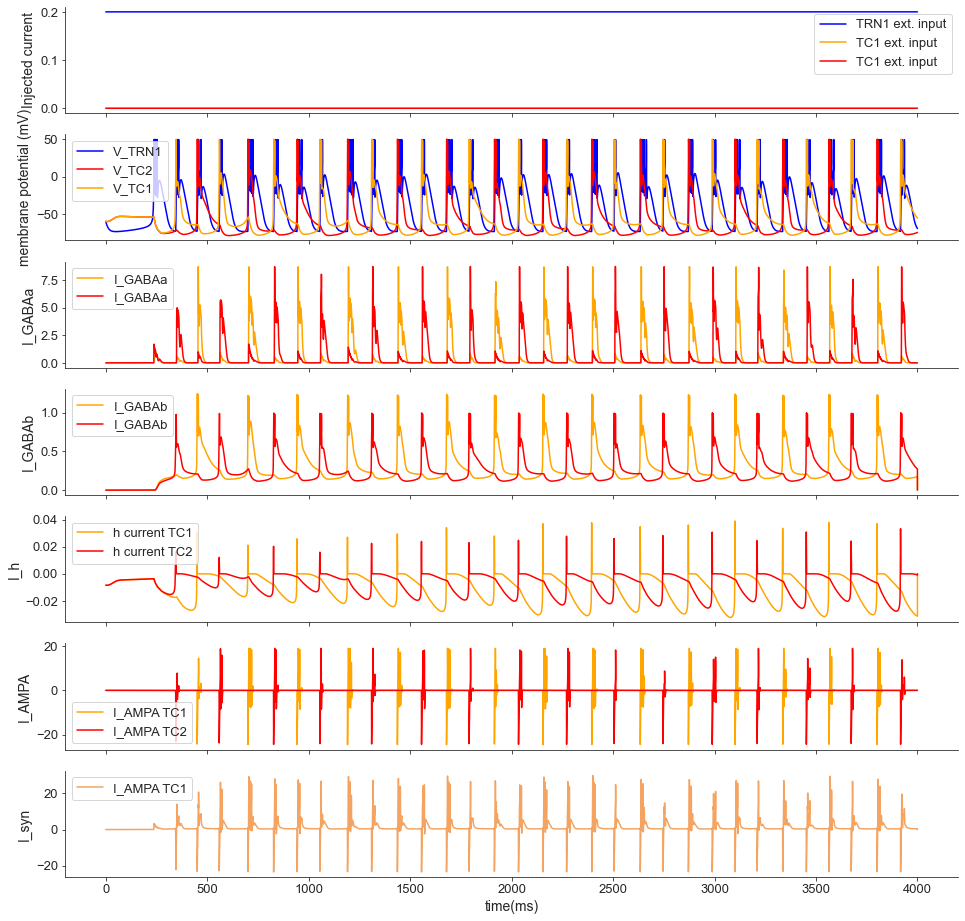

In [31]:
V_TC= nTC_variables['Membrane potential (mV)']
V_trn= nTRN_variables['Membrane potential (mV)']
I_GABAa= nTC_variables['I_GABAa'] 
print(I_GABAa[:,1])
I_GABAb= nTC_variables['I_GABAb'] 
print(I_GABAb[:,1])
I_AMPA= nTRN_variables['I_AMPAmethod1']
I_h=nTC_variables['I_h (nA)']
# slow_h= TC_variables['S_H_TC']
# fast_h=TC_variables['F_H_TC']

plt.subplots(7,1, figsize=(16,16))
plt.subplot(7,1,1)
plt.plot(T, I_TRNinput[:,0], label= 'TRN1 ext. input',c='blue')
plt.legend()
# plt.plot(T, I_TRNinput[:,1], label= 'TRN2 ext. input',c='cyan')
# plt.legend()
plt.plot(T, I_TCinput[:,0], label= 'TC1 ext. input',c='orange' )
plt.legend()
plt.plot(T, I_TCinput[:,1], label= 'TC1 ext. input',c='red' )
plt.legend()
plt.ylabel('Injected current')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xticks(color='w')

plt.subplot(7,1,2)
plt.plot(T,V_trn[:,0], label= 'V_TRN1', c='blue')
plt.legend()
plt.plot(T,V_TC[:,0], label= 'V_TC2', c='red')
plt.ylabel('membrane potential (mV)')
plt.legend()
plt.plot(T,V_TC[:,1], label= 'V_TC1', c='orange')
plt.ylabel('membrane potential (mV)')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xticks(color='w')
plt.legend()

# plt.plot(T,V_trn[:,1], label= 'V_TRN2', c='cyan')
# plt.legend()
plt.subplot(7,1,3)
plt.plot(T,I_GABAa[:,0], label= 'I_GABAa', c='orange')
plt.plot(T,I_GABAa[:,1], label= 'I_GABAa', c='red')
plt.ylabel('I_GABAa')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xticks(color='w')
plt.legend()

plt.subplot(7,1,4)
plt.plot(T,I_GABAb[:,0], label= 'I_GABAb', c='orange')
plt.plot(T,I_GABAb[:,1], label= 'I_GABAb', c='red')
plt.legend()
plt.ylabel('I_GABAb')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xticks(color='w')

plt.subplot(7,1,5)
plt.plot(T,I_h[:,0],label='h current TC1', c='orange')
plt.legend()
plt.plot(T,I_h[:,1],label='h current TC2', c='red')
plt.legend()
plt.ylabel('I_h')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xticks(color='w')
# plt.plot(T,slow_h,label='slow component h current', c='orange')
# plt.legend()
# plt.ylabel('slow_h')
# plt.subplot(7,1,6)
# plt.plot(T,fast_h,label='fast component h current', c='orange')
# plt.legend()
# plt.ylabel('fast_h')
plt.subplot(7,1,6)
plt.plot(T,I_AMPA[:,0], label= 'I_AMPA TC1', c='orange')
plt.legend()
plt.plot(T,I_AMPA[:,1], label= 'I_AMPA TC2', c='red')
plt.legend()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xticks(color='w')
plt.ylabel('I_AMPA')
plt.xlabel('time(ms)')

plt.subplot(7,1,7)
plt.plot(T,I_AMPA[:,0]+ I_AMPA[:,1] + I_GABAb[:,0]+I_GABAb[:,1]+I_GABAa[:,0] +I_GABAa[:,1], label= 'I_AMPA TC1', c='#F4A460')
plt.legend()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.ylabel('I_syn')
plt.xlabel('time(ms)')

plt.savefig(' 3 cell - 2 TC and TRN- test 4seconds .pdf')

In [35]:
from scipy.fftpack import fftfreq
from numpy.fft import fft, ifft

from scipy import fftpack


##for control
# I_tot_synaptic_3_control=I_AMPA[:,0]+ I_AMPA[:,1] + I_GABAb[:,0]+I_GABAb[:,1]+I_GABAa[:,0] +I_GABAa[:,1]

# ## characterise spindle (synaptic activity) using FFT 
# trace2= I_tot_synaptic_3_control

# f_s=10**5
# x2= I_tot_synaptic_3_control
# x2 =x2-np.mean(x2)
# X2 = fftpack.fft(x2)
# freqs_3_control = fftpack.fftfreq(len(x2)) * f_s



##for test
I_tot_synaptic_3_test=I_AMPA[:,0]+ I_AMPA[:,1] + I_GABAb[:,0]+I_GABAb[:,1]+I_GABAa[:,0] +I_GABAa[:,1]

## characterise spindle (synaptic activity) using FFT 
trace3= I_tot_synaptic_3_test

f_s=10**5
x3= I_tot_synaptic_3_test
x3 =x3-np.mean(x3)
X3 = fftpack.fft(x3)
freqs_3_test = fftpack.fftfreq(len(x3)) * f_s



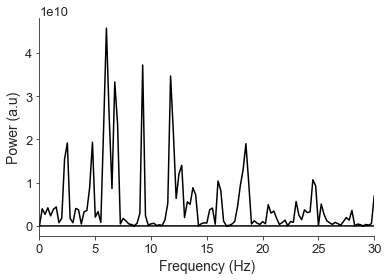

In [28]:


plt.plot(freqs_3_control, np.abs(X2**2), color='black')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power (a.u)')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xlim(0,30)

plt.savefig('TC initiation - control- three cell circuit freq spindle characterisation-FFT.pdf')

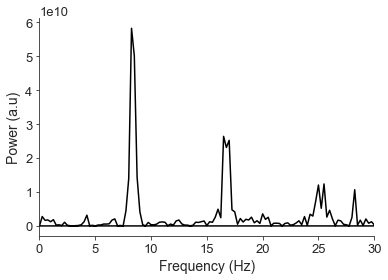

In [36]:
plt.plot(freqs_3_test, np.abs(X3**2), color='black')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power (a.u)')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xlim(0,30)

plt.savefig('TC initiation - test- three cell circuit freq spindle characterisation-FFT.pdf')

In [17]:
def connect_TRN_nTC(I_TC, I_TRN, T, C_m, dt,n):
### TC defining and initialising values

    g_Na_TC=90  #90, destexhe93--> 30
    g_K_TC=10
    g_T_TC=2 #destexhe93--> 1.75
    g_H=0.015#use 0 to remove influence of Ih current,otherwise use 0.015 # DEPENDS??? changed from 0.025 on 8/3/2022 (switch between 0.001 and 0.015) (destexhe93 --> 0.12)
    g_L_TC=0.01 # 0.01 leads to overflow/ changed from 0.001 to 0.01 on 8 March 2022 (Destexhe93-- 0.05)
    # g_KL_TC= 0.0172 #(for a maximal conductance of 5 nS)
    g_KL_TC= 0



    V_Na_TC=50
    V_K_TC=-100
    V_H=-43 #mV
    V_L_TC=-70 #Destxhe93 = -86
    V_T_TC = 120 # used this instead of using the dynamic equation in Austin Sopalata 2017
    V_KL_TC= -100


    # membrane potential at each time point
    V_TC=np.zeros((len(T),n))
    V_TC[0,:]=-60   # changed from -60 to -55 on 8/3/2022 as the steady state value in isolated TRN is around -54
    

    # current contributed by ion channels in each time point 
    I_K_TC=np.zeros((len(T),n)) # Potassium
    I_Na_TC=np.zeros((len(T),n)) # Sodium
    I_L_TC=np.zeros((len(T),n))  # Leaky channels
    I_H_TC=np.zeros((len(T),n))
    I_T_TC=np.zeros((len(T),n))
    I_KL_TC= np.zeros((len(T),n))
    I_GABAb= np.zeros((len(T),n))
    I_GABAa=np.zeros((len(T),n))

    # open probabilities of each channel gates at each time point
    n_TC=np.zeros((len(T),n))
    m_TC=np.zeros((len(T),n))
    h_TC=np.zeros((len(T),n))
    S_H_TC=np.zeros((len(T),n))
    F_H_TC=np.zeros((len(T),n))
    
    tau_TC=np.zeros((len(T),n))
       
    
    # state variables for synaptic current from TRN to TC
    g_GABAb= 0.009            #  0.001 mS/cm^2 ---.  ''' increase GABAb to see if that allows bursting in TC without an external pulse ''' (Destexhe93 - 4 nS, or 0.013 mS/cm2)
    V_GABAb= -95 #mV

    g=np.zeros((len(T),n))
    r=np.zeros((len(T),n))

    g[0,:]=0
    r[0,:]=0

    
    #state varaible equation (r,g)
    k1= 0.5 #(mM^-1 ms^-1)
    k2=0.0012 #(ms^-1)
    k3=0.18 #(ms^-1)
    k4= 0.034 #(ms^-1)
    
    
    #TRN cells Note: TRN and TC cells have the same Na and K channel kinetics according to Austin Soplata 2017 /................

    #initial rate values for K and Na rate equations
    n_TC[0,:]=alpha_n_TRN(V_TC[0,:])/(alpha_n_TRN(V_TC[0,:])+beta_n_TRN(V_TC[0,:]))
    m_TC[0,:]=alpha_m_TRN(V_TC[0,:])/(alpha_m_TRN(V_TC[0,:])+beta_m_TRN(V_TC[0,:]))
    h_TC[0,:]=alpha_h_TRN(V_TC[0,:])/(alpha_h_TRN(V_TC[0,:])+beta_h_TRN(V_TC[0,:]))
    alpha_S_TC_0= H_TC_inf(V_TC[0,:])/tau_H_S(V_TC[0,:])
    beta_S_TC_0= (1-H_TC_inf(V_TC[0,:]))/tau_H_S(V_TC[0,:])
    S_H_TC[0,:]= alpha_S_TC_0/(alpha_S_TC_0 + beta_S_TC_0)

    alpha_F_TC_0= H_TC_inf(V_TC[0,:])/tau_H_F(V_TC[0,:])
    beta_F_TC_0= (1-H_TC_inf(V_TC[0,:]))/tau_H_F(V_TC[0,:])
    F_H_TC[0,:]= alpha_F_TC_0/(alpha_F_TC_0 + beta_F_TC_0)
    

    #initial rate values for 
    m_Ca_TC=np.zeros((len(T),n))
    h_Ca_TC=np.zeros((len(T),n))

    m_Ca_TC[0,:]=m_Ca_TC_inf(0)
    h_Ca_TC[0,:]=h_Ca_TC_inf(0)

    
    ### TRN defining and initialising values:

    g_Na_TRN=200   # Na+ channels (200- destexhe93- 100)
    g_K_TRN=20  # K+ channels ( 15,20,25)
    g_L_TRN= 0.09 #0.3   # leaky channels (destexhe93- 0.05)
    g_T_TRN=3 # the T type calcium channel (destexhe93- 1.75)
    
    g_CAN= 0.25 #mS/cm^2
    V_CAN=-20 #mV
    
    g_K_Ca= 10 #mS/cm^2
    V_K_Ca=-95 #mV

    Ca_conc=np.zeros((len(T),n))
    Ca_conc[0,:]=0.002 #mM of calcium   ---> CHECK THIS INITIAL CONC.

    
    # Initiatlise ionic reversal potential (in mV)
    V_Na_TRN=50 # Na+ channels
    V_K_TRN=-100 # K+ channels
    V_L_TRN=-77  # leaky channels, implementing Bazhenov 2002 value =-77 from -90 on 8/3/2022 (destexhe93: -80)
    V_T_TRN=120
    
    V_TRN=np.zeros(len(T))
    V_TRN[0]=-60
    

    # current contributed by ion channels in each time point 
    I_K_TRN=np.zeros(len(T))# Potassium
    I_Na_TRN=np.zeros(len(T)) # Sodium
    I_L_TRN=np.zeros(len(T)) # Leaky channels
    I_T_TRN=np.zeros(len(T))
    I_K_Ca=np.zeros(len(T))
    I_CAN=np.zeros(len(T))
    I_AMPA=np.zeros((len(T),n))
    I_GABAaTRN=np.zeros(len(T))
    
    
    n_TRN=np.zeros(len(T))
    m_TRN=np.zeros(len(T))
    h_TRN=np.zeros(len(T))

    #initial rate values for K and Na rate equations
    n_TRN[0]=alpha_n_TRN(V_TRN[0])/(alpha_n_TRN(V_TRN[0])+beta_n_TRN(V_TRN[0]))
    m_TRN[0]=alpha_m_TRN(V_TRN[0])/(alpha_m_TRN(V_TRN[0])+beta_m_TRN(V_TRN[0]))
    h_TRN[0]=alpha_h_TRN(V_TRN[0])/(alpha_h_TRN(V_TRN[0])+beta_h_TRN(V_TRN[0]))

    #initial rate values for 
    m_Ca=np.zeros(len(T))
    h_Ca=np.zeros(len(T))
    m_Ca[0]=m_Ca_inf(0)
    h_Ca[0]=h_Ca_inf(0)
    
    m_CAN=np.zeros((len(T),n))
    m_K_Ca=np.zeros((len(T),n))
    m_K_Ca[0,:]=m_K_Ca_inf(0,2)
    m_CAN[0,:]=m_CAN_inf(0,2)
    
    # State variable for synaptic currents 
    g_AMPA=0.4 #mS/cm^2  ((destexhe93- 0.02, or 1nS)
    V_AMPA=0 #mV, reveral potential of AMPA
    tau_AMPA=2 #ms

    g_GABAa=0.069 #mS/cm^2 (from 0.069)
    V_GABAa=-80 #mV, reveral potential of AMPA
    tau_GABAa=5 #ms

    #Current from TC to TRN --> AMPA, TRN to TC -->GABAa
    # synaptic currents in TRN --> recurrent GABAaTRN
    s_AMPA=np.zeros((len(T),n))
    s_GABAa=np.zeros((len(T),n))
    s_GABAaTRN=np.zeros((len(T),n))
    s_AMPA[0,:]=0 #find out the initial value, assuming that this denotes the initial concentration of NT, this can be taken as 0
    s_GABAaTRN[0,:]=0
    s_GABAa[0,:]=0

    k=np.zeros((len(T),n))


    #### loop connecting TC and TRN

    for i in range(len(T)-1):

        for j in range(n-1):

            #### TRN intrinsic currents 

            I_K_TRN[i]= g_K_TRN*np.power(n_TRN[i],4)*(V_TRN[i]-V_K_TRN)/C_m    ### use I_K_TRN[:,i] for simulating multiple TRN cells and use a mtrix for injecting currents as well (31.03.2022) 

            I_Na_TRN[i]=g_Na_TRN*np.power(m_TRN[i],3)*h_TRN[i]*(V_TRN[i]-V_Na_TRN)/C_m

            I_L_TRN[i]=g_L_TRN*(V_TRN[i]-V_L_TRN)/C_m

            I_T_TRN[i]=g_T_TRN*np.power(m_Ca[i],2)*h_Ca[i]*(V_TRN[i]-V_T_TRN)/C_m

            # I_CAN[i]=g_CAN*np.power(m_CAN[i],2)*(V_TRN[i]-V_CAN)/C_m

            # I_K_Ca[i,j]=g_K_Ca*np.power(m_K_Ca[i,j],2)*(V_TRN[i,j]-V_K_Ca)/C_m
            
            I_AMPA[i,j]=g_AMPA*s_AMPA[i,j]*(V_TRN[i]-V_AMPA)/C_m

            # I_GABAaTRN[i,j]= g_GABAa*s_GABAaTRN[i,j]*(V_TRN[i,j]-V_GABAa)/C_m

            #### TC intrinsic currents 

            I_K_TC[i,j]= g_K_TC*np.power(n_TC[i,j],4)*(V_TC[i,j]-V_K_TC)/C_m

            I_Na_TC[i,j]=g_Na_TC*np.power(m_TC[i,j],3)*h_TC[i,j]*(V_TC[i,j]-V_Na_TC)/C_m

            I_L_TC[i,j]=g_L_TC*(V_TC[i,j]-V_L_TC)/C_m

            I_KL_TC[i,j]=g_KL_TC*(V_TC[i,j]-V_KL_TC)/C_m

            I_T_TC[i,j]=g_T_TC*np.power(m_Ca_TC[i,j],2)*h_Ca_TC[i,j]*(V_TC[i,j]-V_T_TC)/C_m

            I_H_TC[i,j]=g_H*S_H_TC[i,j]*F_H_TC[i,j]*(V_TC[i,j]-V_H)/C_m
            
            I_GABAb[i,j]= g_GABAb*(np.power(g[i,j],4))*(V_TC[i,j]-V_GABAb)/(np.power(g[i,j],4)+100)/C_m

            I_GABAa[i,j]= g_GABAa*s_GABAa[i]*(V_TC[i,j]-V_GABAa)/C_m


        # # this is the problem --> 1st cell gets input from the second and the second cell from the first, cant write that in the same equation!, what if you do this outside the loop?
            if j==0:
                V_TRN[i+1]=(I_TRN[i]/C_m-I_L_TRN[i]-I_Na_TRN[i]-I_K_TRN[i]-I_T_TRN[i]-I_AMPA[i,j+1]-I_AMPA[i,j])*dt+V_TRN[i,j]
                V_TC[i+1,j]=(I_TC[i,j]/C_m-I_K_TC[i,j]-I_Na_TC[i,j]-I_L_TC[i,j]-I_T_TC[i,j]-I_H_TC[i,j]-I_GABAb[i,j] - I_GABAa[i,j] )*dt+V_TC[i,j]  

            
            if j==1:
                V_TC[i+1,j]=(I_TC[i,j]/C_m-I_K_TC[i,j]-I_Na_TC[i,j]-I_L_TC[i,j]-I_T_TC[i,j]-I_H_TC[i,j]-I_GABAb[i,j-1] - I_GABAa[i,j-1]-I_GABAb[i,j] - I_GABAa[i,j])*dt+V_TC[i,j]  

        ### without TRN-TRN connections
            # if j==0:
            # V_TRN[i+1,0]=(I_TRN[i,0]/C_m-I_L_TRN[i,0]-I_Na_TRN[i,0]-I_K_TRN[i,0]-I_T_TRN[i,0]-I_AMPA[i,1]-I_AMPA[i,0])*dt+V_TRN[i,0]
            # V_TC[i+1,0]=(I_TC[i,0]/C_m-I_K_TC[i,0]-I_Na_TC[i,0]-I_L_TC[i,0]-I_T_TC[i,0]-I_H_TC[i,0]-I_GABAb[i,0] - I_GABAa[i,0] )*dt+V_TC[i,0]  

            
            # # if j==1:
            #     # V_TRN[i+1,j]=(I_TRN[i,j]/C_m-I_L_TRN[i,j]-I_Na_TRN[i,j]-I_K_TRN[i,j]-I_T_TRN[i,j]-I_GABAaTRN[i,j-1]-I_AMPA[i,j-1]-I_AMPA[i,j])*dt+V_TRN[i,j]
            # V_TC[i+1,1]=(I_TC[i,1]/C_m-I_K_TC[i,1]-I_Na_TC[i,1]-I_L_TC[i,1]-I_T_TC[i,1]-I_H_TC[i,1]-I_GABAb[i,0] - I_GABAa[i,0])*dt+V_TC[i,1]  

            s_AMPA[i+1,j]= ((5*(1+math.tanh(V_TC[i,j]/4))*(1-s_AMPA[i,j]) - s_AMPA[i,j]/tau_AMPA)) * dt + s_AMPA[i,j]
    
            # s_GABAaTRN[i+1,j]= ((5*(1+math.tanh(V_TRN[i,j]/4))*(1-s_GABAaTRN[i,j]) - s_GABAaTRN[i,j]/tau_GABAa)) * dt + s_GABAaTRN[i,j]


            
            ### TRN gating variables

            n_TRN[i+1]=-(n_TRN[i]-n_inf(V_TRN[i]))*dt/tau_n(V_TRN[i]) +n_TRN[i]

            m_TRN[i+1]=-(m_TRN[i]-m_inf(V_TRN[i]))*dt/tau_m(V_TRN[i]) +m_TRN[i]

            h_TRN[i+1]=-(h_TRN[i]-h_inf(V_TRN[i]))*dt/tau_h(V_TRN[i]) +h_TRN[i]

            m_Ca[i+1]=-(m_Ca[i]-m_Ca_inf(V_TRN[i]))*dt/tau_m_Ca(V_TRN[i]) +m_Ca[i]

            h_Ca[i+1]=-(h_Ca[i]-h_Ca_inf(V_TRN[i]))*dt/tau_h_Ca(V_TRN[i]) +h_Ca[i]


            ### TC gating varaiables          
                    
            r[i+1]= (k1*2*(1+math.tanh(V_TRN[i]/4))*(1-r[i])-k2*r[i])*dt + r[i]  # check how to represent these equations with Jorge
            
            g[i+1]= (k3*r[i] - k4*g[i])*dt +g[i]

            s_GABAa[i+1]= ((5*(1+math.tanh(V_TRN[i]/4))*(1-s_GABAa[i]) - s_GABAa[i]/tau_GABAa)) * dt + s_GABAa[i]
            
            # tau_TC[i]= tau_n(V_TC[i])+tau_m(V_TC[i])+tau_h(V_TC[i])+tau_Ca_TC_h(V_TC[i])
        
            n_TC[i+1,j]=-(n_TC[i,j]-n_inf(V_TC[i,j]))*dt/tau_n(V_TC[i,j]) +n_TC[i,j]

            m_TC[i+1,j]=-(m_TC[i,j]-m_inf(V_TC[i,j]))*dt/tau_m(V_TC[i,j]) +m_TC[i,j]

            h_TC[i+1,j]=-(h_TC[i,j]-h_inf(V_TC[i,j]))*dt/tau_h(V_TC[i,j]) +h_TC[i,j]

            m_Ca_TC[i+1,j]= m_Ca_TC_inf(V_TC[i+1,j])

            h_Ca_TC[i+1,j]=-(h_Ca_TC[i,j]-h_Ca_TC_inf(V_TC[i,j]))*dt/tau_Ca_TC_h(V_TC[i,j]) +h_Ca_TC[i,j]

            S_H_TC[i+1,j]= -(S_H_TC[i,j]-H_TC_inf(V_TC[i,j]))*dt/tau_H_S(V_TC[i,j]) + S_H_TC[i,j]

            F_H_TC[i+1,j]= -(F_H_TC[i,j]-H_TC_inf(V_TC[i,j]))*dt/tau_H_F(V_TC[i,j]) + F_H_TC[i,j]


                
        allvariables_TRN = {'Injected current (nA)': I_TRN, 'activation gate K+, n':n_TRN, 'inactivation gate Na+,h':h_TRN, 'activation gate Na+, m':m_TRN, 'I_T (nA)':I_T_TRN, 'm_Ca': m_Ca, 'h_Ca':h_Ca, 'Membrane potential (mV)':V_TRN, 'I_AMPAmethod1':I_AMPA, 's_AMPA':s_AMPA} 
        allvariables_nTC = {'Injected current (nA)': I_TC, 'n_K':n_TC, 'h_Na':h_TC, 'm_Na':m_TC, 'I_T (nA)':I_T_TC, 'm_Ca_TC': m_Ca_TC, 'h_Ca_TC':h_Ca_TC, 'Membrane potential (mV)':V_TC, 'I_GABAb': I_GABAb, 'I_GABAa':I_GABAa, 'I_h (nA)':I_H_TC, 'varaiable_GABAb': g, 'state_variable_GABAb': r}

    return allvariables_TRN, allvariables_nTC

In [19]:
T= duration_of_sim(0,3000,0.01)
n=2
I_TRNinput= 0.2*np.ones(len(T))
I_TCinput= 0*np.ones((len(T),n))


# I_TRNinput[98000:100000]=-1.7
# I_TRNinput[900000:92000]=-3.5

TRN_variables, nTC_variables = connect_TRN_nTC(I_TC= I_TCinput, I_TRN=I_TRNinput, T=T, C_m=1, dt=0.01, n=n)

ValueError: setting an array element with a sequence.

### Extra exercise:
Make the following changes to observe the change in burst activity in TRN and TC respectively

1) Alter the conductance value of each ion channel in both TRN and TC neurons and observe  how they affect the burst activity.

2) alter the initial value of membrane potential and observe

3) study the importance of K+ and Na+ currents in burst generation in TRN and TC

4) study the importance of T channel in burst generation by altering the minimum potential required to open the activation gate of calcium. 
